# Informe  

In [1]:
import pandas as pd
import geopandas
import numpy as np
from math import pi
from matplotlib import pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import common.common_pandas_lib as common

In [2]:
%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
plt.rcParams['figure.figsize'] = (18, 12)

sns.set(style="whitegrid", font_scale = 2) # seteando tipo de grid en seaborn
                                           # seteando tamanio de ticks label
sns.set_palette('Blues')
pd.options.display.float_format = '{:20,.8f}'.format # suprimimos la notacion cientifica en los outputs

In [3]:
zona_prop = common.cargar_train_optimizado('train.csv')

## ¿Cual es la cantidad de propiedades por provincia de Mexico? 

In [4]:
zona_prop['provincia'].isnull().sum()

155

In [5]:
zona_provincia = zona_prop.dropna(subset = ['provincia'])
zona_provincia = zona_provincia.copy()
zona_provincia['provincia'].isnull().sum()

0

In [6]:
provincias_cant = zona_provincia['provincia'].value_counts().to_frame()
provincias_cant.columns = ['cantidad_propiedades']
provincias_cant.reset_index(inplace = True)
provincias_cant.columns = ['provincia', 'cantidad_propiedades']
provincias_cant

provincia  cantidad_propiedades
0        Distrito Federal                 58790
1          Edo. de México                 41607
2                 Jalisco                 21238
3               Querétaro                 16988
4              Nuevo León                 15324
5                  Puebla                 10421
6         San luis Potosí                  8447
7                 Yucatán                  7928
8                 Morelos                  7337
9                Veracruz                  5762
10           Quintana Roo                  4756
11              Chihuahua                  4590
12               Coahuila                  3695
13  Baja California Norte                  3220
14                 Sonora                  2988
15             Guanajuato                  2860
16               Guerrero                  2678
17                Hidalgo                  2521
18              Michoacán                  2471
19             Tamaulipas                  2303
20                Durango                  2275
21                Sinaloa                  1806
22         Aguascalientes                  1753
23    Baja California Sur                  1700
24                Nayarit                  1352
25                Chiapas                  1126
26                 Colima                  1008
27                Tabasco                   994
28               Tlaxcala                   839
29                 Oaxaca                   711
30               Campeche                   263
31              Zacatecas                    94

In [107]:
plot_barplot_provincias_cantidad = sns.barplot(
                                        x = 'provincia',
                                        y = 'cantidad_propiedades',
                                        data = provincias_cant,
                                        palette = 'colorblind'
                                    )

plot_barplot_provincias_cantidad.set_xticklabels(
    plot_barplot_provincias_cantidad.get_xticklabels(),
    rotation = 90
)

common.setear_titulos_plot(
    plot_barplot_provincias_cantidad,
    'Cantidad de propiedades, en Mexico, por provincia',
    'Provincias',
    'Cantidad de \npropiedades'
)
plt.tight_layout(pad = 1)
plot_barplot_provincias_cantidad.set_yticks([0, 10000, 20000, 30000, 40000, 50000, 60000])
fig_plot_barplot_provincias_cantidad = plot_barplot_provincias_cantidad.get_figure()
#fig_plot_barplot_provincias_cantidad.savefig('./figs/barplot_provincia_cantidad.png')
plt.show()

### ¿Cuales son las provincias que tienen mas de 10000 propiedades?

In [8]:
provincias_cant_mayor_10_mil = provincias_cant.loc[provincias_cant['cantidad_propiedades'] >= 10000].copy()
provincias_cant_mayor_10_mil['provincia'] = provincias_cant_mayor_10_mil['provincia']
provincias_cant_mayor_10_mil['provincia'].dtype

dtype('O')

In [106]:
plot_barplot_provincias_cant_mayor_10_mil = sns.barplot(
                                                x = 'provincia',
                                                y = 'cantidad_propiedades',
                                                data = provincias_cant_mayor_10_mil,
                                                palette = 'colorblind'
                                            )

common.setear_titulos_plot(
    plot_barplot_provincias_cant_mayor_10_mil,
    'Cantidad de propiedades, en Mexico, por provincias \ncon mas de 10.000 propiedades',
    'Provincias con mas propiedades',
    'Cantidad de propiedades'
)

plot_barplot_provincias_cant_mayor_10_mil.set_xticklabels(
    plot_barplot_provincias_cant_mayor_10_mil.get_xticklabels(),
    rotation = 45
)
plt.tight_layout(pad = 1)
fig_plot_barplot_provincias_cant_mayor_10_mil = plot_barplot_provincias_cant_mayor_10_mil.get_figure()
#fig_plot_barplot_provincias_cant_mayor_10_mil.savefig("./figs/barplot_provincias_MAS_10_mil_cantidad.png")
plt.show()

In [10]:
provincias_cant_mayor_10_mil_merge = provincias_cant_mayor_10_mil.merge(zona_provincia, on = 'provincia', how = 'inner')
provincias_cant_mayor_10_mil_merge.sort_values(by = 'provincia', inplace = True)
provincias_cant_mayor_10_mil_merge

provincia  cantidad_propiedades      id  \
0       Distrito Federal                 58790  254099   
39186   Distrito Federal                 58790   89265   
39187   Distrito Federal                 58790  100048   
39188   Distrito Federal                 58790    9087   
39189   Distrito Federal                 58790   79648   
39190   Distrito Federal                 58790  203516   
39191   Distrito Federal                 58790  175986   
39192   Distrito Federal                 58790  213507   
39193   Distrito Federal                 58790  124655   
39194   Distrito Federal                 58790  107819   
39195   Distrito Federal                 58790   15998   
39196   Distrito Federal                 58790   97704   
39185   Distrito Federal                 58790   36109   
39197   Distrito Federal                 58790  101568   
39199   Distrito Federal                 58790   36193   
39200   Distrito Federal                 58790  166966   
39201   Distrito Federal                 58790   43050   
39202   Distrito Federal                 58790  198304   
39203   Distrito Federal                 58790  184146   
39204   Distrito Federal                 58790  187645   
39205   Distrito Federal                 58790  270802   
39206   Distrito Federal                 58790   72690   
39207   Distrito Federal                 58790   74403   
39208   Distrito Federal                 58790  131058   
39209   Distrito Federal                 58790   13079   
39198   Distrito Federal                 58790  155458   
39184   Distrito Federal                 58790  116395   
39183   Distrito Federal                 58790   48672   
39182   Distrito Federal                 58790  237331   
39157   Distrito Federal                 58790   10009   
...                  ...                   ...     ...   
132978         Querétaro                 16988   18100   
132977         Querétaro                 16988  153726   
132976         Querétaro                 16988    9156   
132975         Querétaro                 16988  186593   
132974         Querétaro                 16988  134441   
132973         Querétaro                 16988  206734   
132972         Querétaro                 16988   60917   
132971         Querétaro                 16988   71224   
132970         Querétaro                 16988  253364   
132969         Querétaro                 16988   89053   
132968         Querétaro                 16988    4676   
132967         Querétaro                 16988  257256   
132916         Querétaro                 16988   24993   
132966         Querétaro                 16988   56402   
132964         Querétaro                 16988   69539   
132963         Querétaro                 16988  245737   
132962         Querétaro                 16988   58280   
132961         Querétaro                 16988   92657   
132960         Querétaro                 16988   72006   
132959         Querétaro                 16988  147740   
132958         Querétaro                 16988   15033   
132957         Querétaro                 16988  144057   
132956         Querétaro                 16988  171077   
132955         Querétaro                 16988  288324   
132954         Querétaro                 16988  184577   
132953         Querétaro                 16988   24451   
132952         Querétaro                 16988  192321   
132951         Querétaro                 16988   21158   
132965         Querétaro                 16988  239461   
121980         Querétaro                 16988  184055   

                                                   titulo  \
0                                       depto. tipo a-402   
39186                            departamento en la roma    
39187                  propiedad en venta para oficinas.    
39188                     departamento en venta - polanco   
39189       casa en venta en agrícola oriental, iztacalco   
39190   jardines en la montaña exclusivo depto.  con

### En las provincias con mayoria de propiedades, ¿Como se distribuye el precio de las mismas? 

In [11]:
provincias_cant_mayor_10_mil_estadist = common.agrupar_calcular_estadisticas_desagrupar(provincias_cant_mayor_10_mil_merge, 'provincia', 'precio')
provincias_cant_mayor_10_mil_estadist.sort_values(by = 'provincia', inplace = True)
for columna in ['precio_cuantil_1', 'precio_median', 'precio_cuantil_3']:
    provincias_cant_mayor_10_mil_estadist[columna + '_millones'] = provincias_cant_mayor_10_mil_estadist[columna].transform(lambda x: x*1e-6)
provincias_cant_mayor_10_mil_estadist

provincia     precio_cuantil_1        precio_median  \
0  Distrito Federal   1,500,000.00000000   2,800,000.00000000   
1    Edo. de México     900,000.00000000   2,000,000.00000000   
2           Jalisco     930,000.00000000   1,750,000.00000000   
3        Nuevo León     900,000.00000000   1,900,000.00000000   
4            Puebla     990,000.00000000   1,870,000.00000000   
5         Querétaro   1,196,875.00000000   1,850,000.00000000   

      precio_cuantil_3  precio_cuantil_1_millones  precio_median_millones  \
0   4,700,000.00000000                 1.50000000              2.80000000   
1   3,950,000.00000000                 0.90000000              2.00000000   
2   3,200,000.00000000                 0.93000000              1.75000000   
3   3,716,475.00000000                 0.90000000              1.90000000   
4   2,950,000.00000000                 0.99000000              1.87000000   
5   2,800,000.00000000                 1.19687500              1.85000000   

   precio_cuantil_3_millones  
0                 4.70000000  
1                 3.95000000  
2                 3.20000000  
3                 3.71647500  
4                 2.95000000  
5                 2.80000000

In [105]:
plot_boxplot_provincias_top_precios = sns.boxplot(
                                            x = 'provincia',
                                            y = 'precio',
                                            data = provincias_cant_mayor_10_mil_merge,
                                            palette = 'colorblind'
                                        )
plot_boxplot_provincias_top_precios.set_yticks([1000000,2000000, 3000000, 4000000, 5000000])

common.setear_titulos_plot(
    plot_boxplot_provincias_top_precios,
    'Distribucion de precios de las propiedades, en Mexico, \nde las provincias con mas de 10 mil propiedades',
    'Provincias con mas propiedades',
    'Precio de las propiedades \n[millones de pesos mexicanos]'
)

common.agregar_serie_plot(
    plot_boxplot_provincias_top_precios,
    provincias_cant_mayor_10_mil_estadist['precio_median_millones'],
    provincias_cant_mayor_10_mil_estadist['precio_median'],
    'w',
    0,50000
)

common.agregar_serie_plot(
    plot_boxplot_provincias_top_precios,
    provincias_cant_mayor_10_mil_estadist['precio_cuantil_1_millones'],
    provincias_cant_mayor_10_mil_estadist['precio_cuantil_1'],
    'w',
    -0.25,50000
)

common.agregar_serie_plot(
    plot_boxplot_provincias_top_precios,
    provincias_cant_mayor_10_mil_estadist['precio_cuantil_3_millones'],
    provincias_cant_mayor_10_mil_estadist['precio_cuantil_3'],
    'w',
    0.25,-250000
)

plot_boxplot_provincias_top_precios.set_xticklabels(
    plot_boxplot_provincias_top_precios.get_xticklabels(),
    rotation = 45
)

plot_boxplot_provincias_top_precios.yaxis.set_major_formatter(
    FuncFormatter(lambda x, pos: "%0.1f" % (x*1e-6))
)

plot_boxplot_provincias_top_precios.set_ylim(0,5500000)

fig_plot_boxplot_provincias_top_precios = plot_boxplot_provincias_top_precios.get_figure()
fig_plot_boxplot_provincias_top_precios.set_size_inches(18,12)
plt.tight_layout(pad = 1)
#fig_plot_boxplot_provincias_top_precios.savefig("./figs/boxplot_provincias_MAS_10_mil_precios.png")
plt.show()

### En las provincias con mayoria de propieades ¿Como se distribuye el precio de las mismas, segun la cantidad de baños? 

In [92]:
top_6_prov = provincias_cant_mayor_10_mil_merge
top_6_prov_banos = top_6_prov.fillna(value = {'banos' : 1}).copy()
top_6_prov_banos['banos'] = top_6_prov_banos['banos'].astype(np.int8)
top_6_prov_banos['banos'].isnull().sum()

0

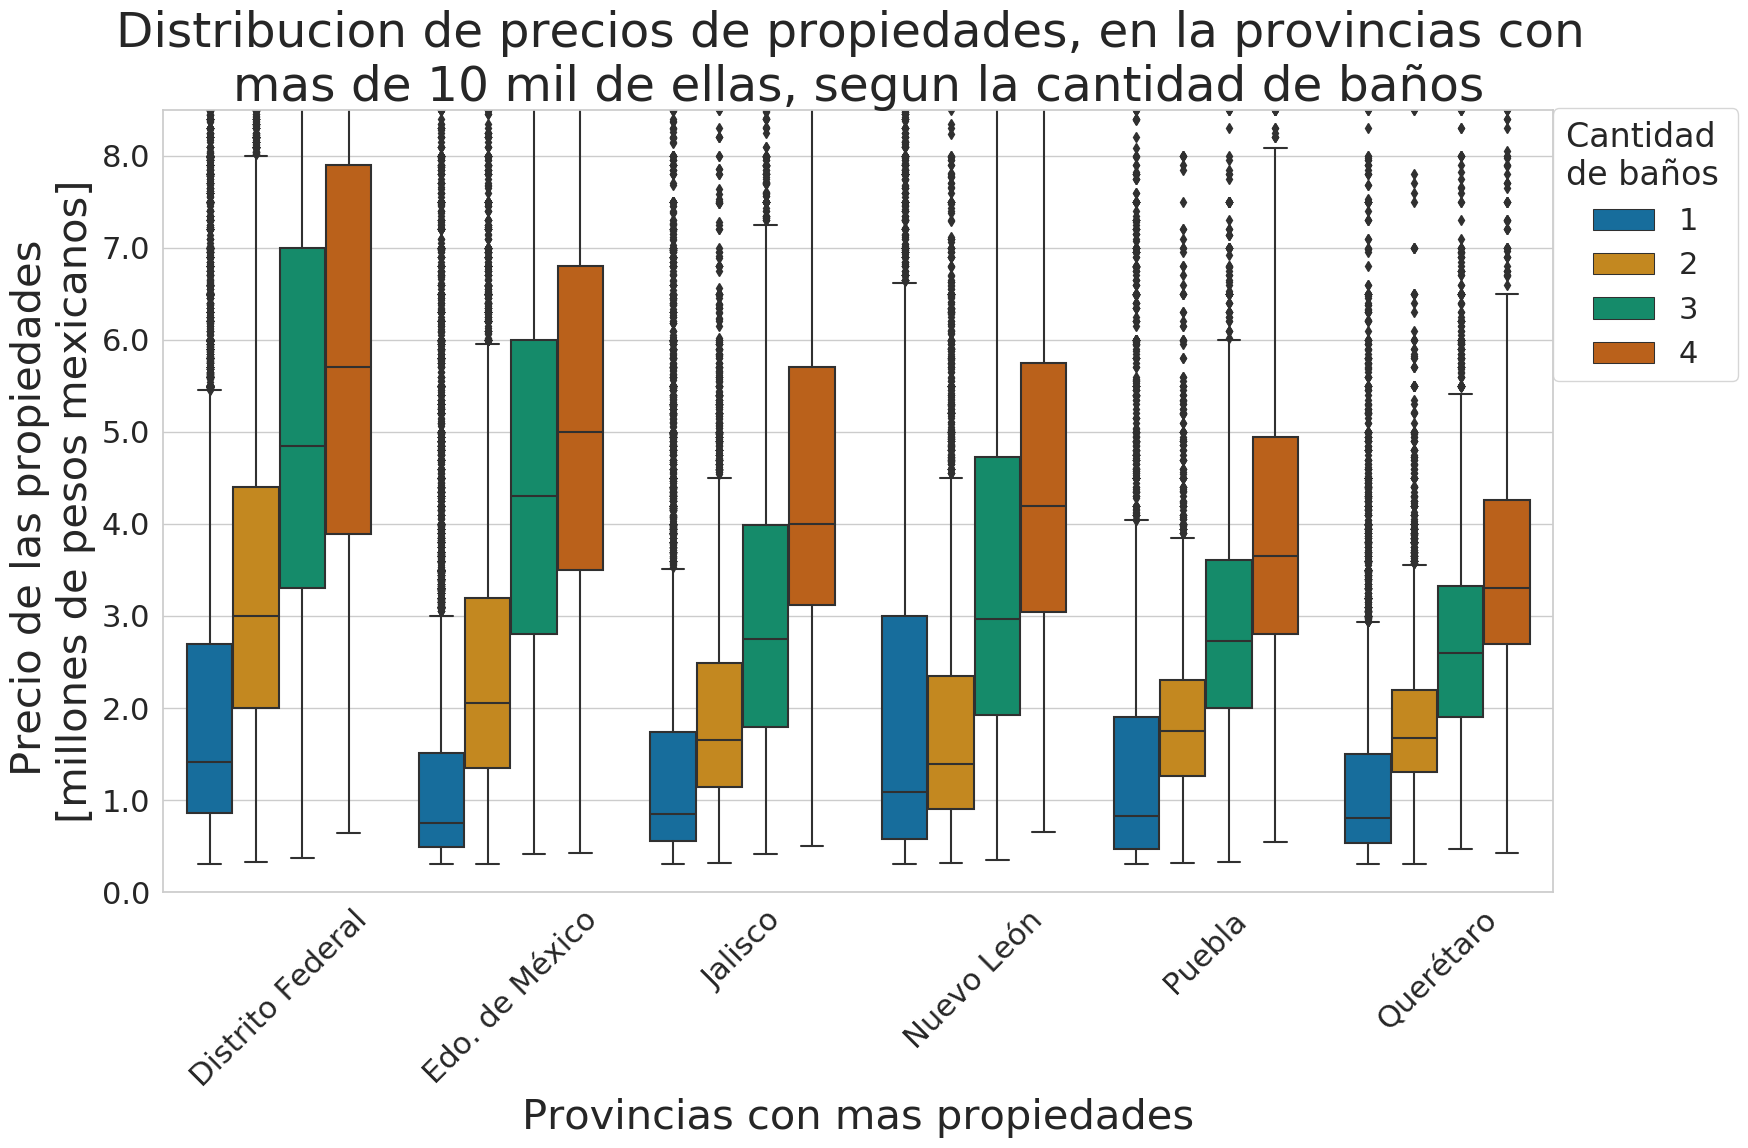

In [104]:
plot_boxplot_top_6_prov_banos_precio = sns.boxplot(
                                            x = 'provincia',
                                            y = 'precio',
                                            hue = 'banos',
                                            data = top_6_prov_banos,
                                            palette = 'colorblind'
                                        )
common.setear_titulos_plot(
    plot_boxplot_top_6_prov_banos_precio,
    'Distribucion de precios de propiedades, en la provincias con \nmas de 10 mil de ellas, segun la cantidad de baños',
    'Provincias con mas propiedades',
    'Precio de las propiedades \n[millones de pesos mexicanos]' 
)

plot_boxplot_top_6_prov_banos_precio.legend(title = 'Cantidad \nde baños', loc = [1, 0.653])

plot_boxplot_top_6_prov_banos_precio.yaxis.set_major_formatter(
    FuncFormatter(lambda x, pos: "%0.1f" % (x*1e-6))
)

plot_boxplot_top_6_prov_banos_precio.set_xticklabels(
    plot_boxplot_top_6_prov_banos_precio.get_xticklabels(),
    rotation = 45
)

plot_boxplot_top_6_prov_banos_precio.set_ylim(0, 8500000)


fig_plot_boxplot_top_6_prov_banos_precio = plot_boxplot_top_6_prov_banos_precio.get_figure()
plt.tight_layout()
#fig_plot_boxplot_top_6_prov_banos_precio.savefig("./figs/boxplot_provincia_MAS_10_mil_precio_banos.png")
plt.show()

### En las provincias con mayoria de propiedades, ¿Como se distribuye el precio segun la cantidad de habitaciones? 

In [15]:
top_6_prov_habitaciones = top_6_prov.fillna(value = {'habitaciones' : 1}).copy()
top_6_prov_habitaciones['habitaciones'] = top_6_prov_habitaciones['habitaciones'].astype(np.int8)
top_6_prov_habitaciones['habitaciones'].dtype

dtype('int8')

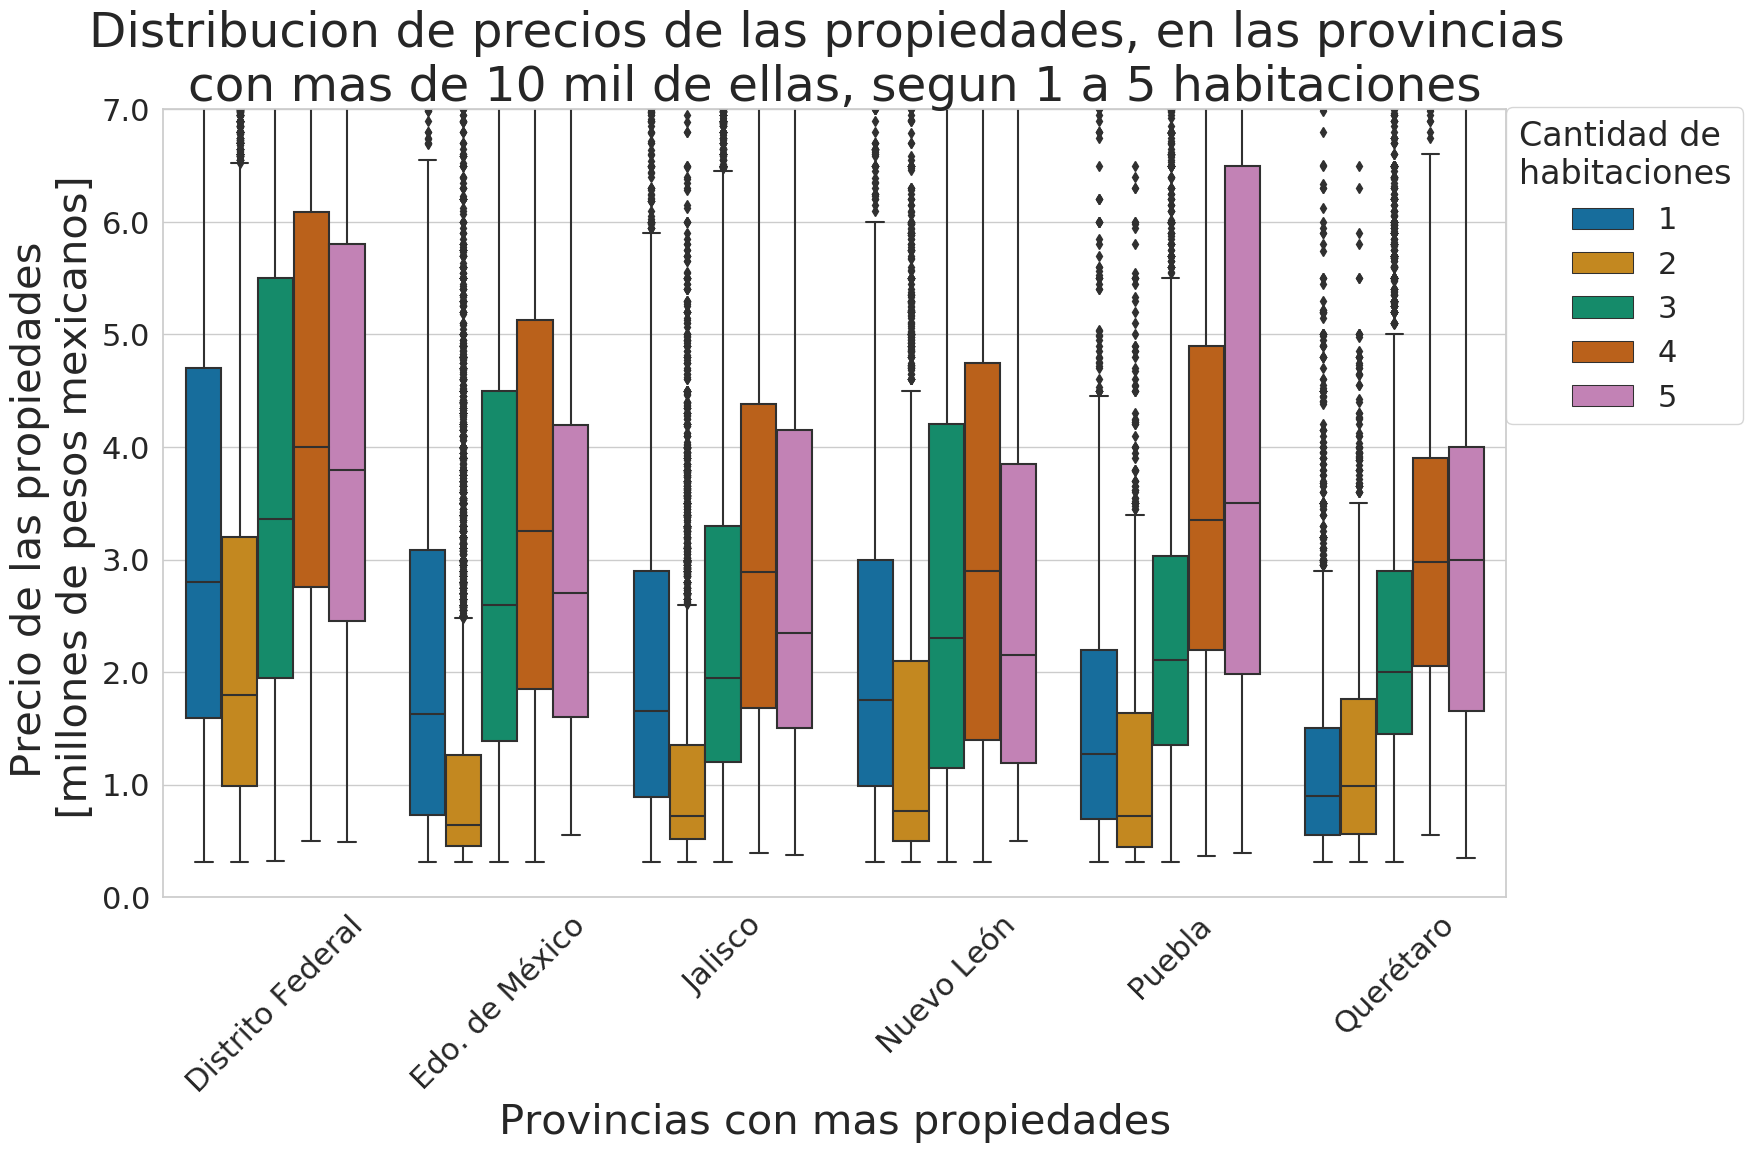

In [103]:
boxplot_top_6_prov_precio_habitaciones_hasta_5 = sns.boxplot(
                                                    x = 'provincia',
                                                    y = 'precio',
                                                    hue = 'habitaciones',
                                                    data = top_6_prov_habitaciones.loc[top_6_prov_habitaciones['habitaciones'] <= 5],
                                                    palette = 'colorblind'                                        
                                                )

boxplot_top_6_prov_precio_habitaciones_hasta_5.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: "%0.1f" % (x*1e-6)))

common.setear_titulos_plot(
    boxplot_top_6_prov_precio_habitaciones_hasta_5,
    'Distribucion de precios de las propiedades, en las provincias \ncon mas de 10 mil de ellas, segun 1 a 5 habitaciones',
    'Provincias con mas propiedades',
    'Precio de las propiedades \n [millones de pesos mexicanos]'
)

plt.legend(title = 'Cantidad de \nhabitaciones', loc = [1,0.6])

boxplot_top_6_prov_precio_habitaciones_hasta_5.set_xticklabels(
    boxplot_top_6_prov_precio_habitaciones_hasta_5.get_xticklabels(),
    rotation = 45
)

boxplot_top_6_prov_precio_habitaciones_hasta_5.set_ylim(0,7*1e6)

fig_boxplot_top_6_prov_precio_habitaciones_hasta_5 =\
    boxplot_top_6_prov_precio_habitaciones_hasta_5.get_figure()

plt.tight_layout(pad = 1)
#fig_boxplot_top_6_prov_precio_habitaciones_hasta_5.savefig("./figs/boxplot_provincias_MAS_10_mil_precio_habitaciones_1_5.png")
plt.show()

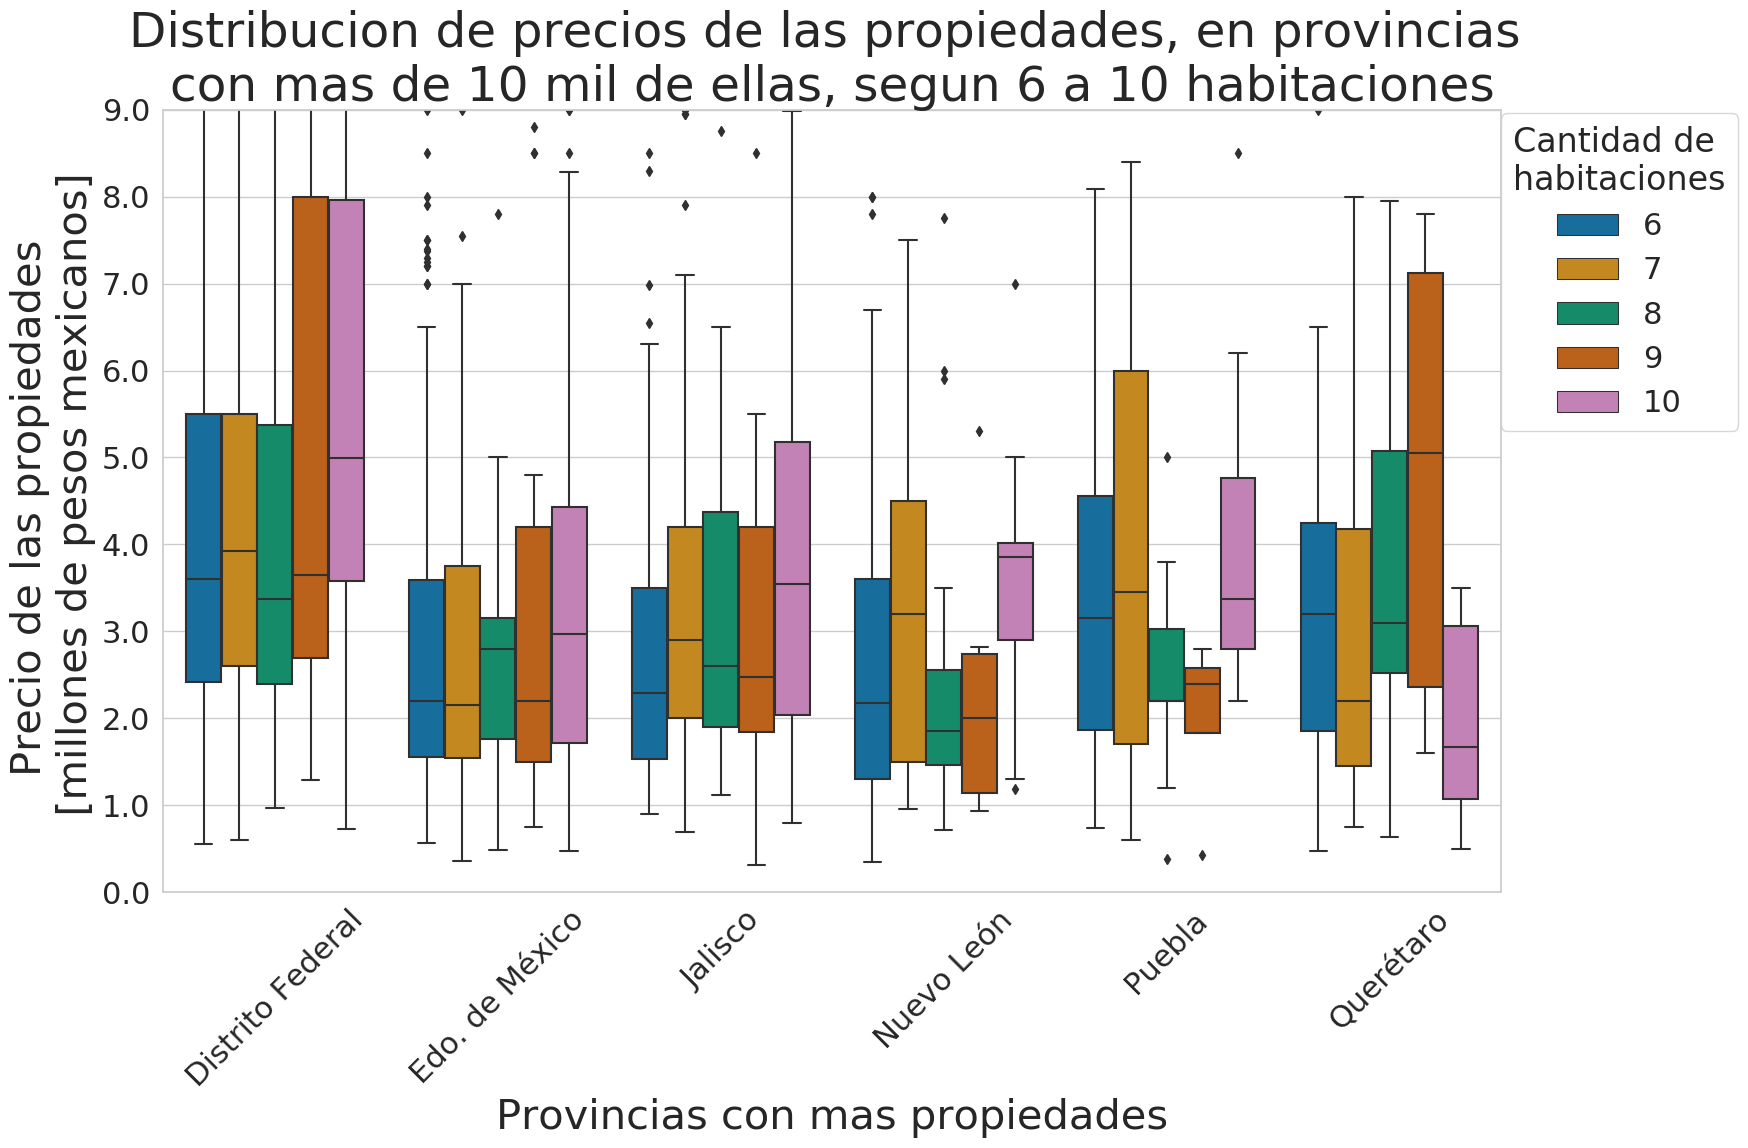

In [102]:
boxplot_top_6_prov_precio_habitaciones_desde_6 = sns.boxplot(
                                            x = 'provincia',
                                            y = 'precio',
                                            hue = 'habitaciones',
                                            data = top_6_prov_habitaciones.loc[top_6_prov_habitaciones['habitaciones'] > 5],
                                            palette = sns.color_palette('colorblind'),
                                        )

common.setear_titulos_plot(
    boxplot_top_6_prov_precio_habitaciones_desde_6,
    'Distribucion de precios de las propiedades, en provincias \ncon mas de 10 mil de ellas, segun 6 a 10 habitaciones',
    'Provincias con mas propiedades',
    'Precio de las propiedades \n [millones de pesos mexicanos]'
)

plt.legend(title = 'Cantidad de \nhabitaciones', loc = [1,0.59])

boxplot_top_6_prov_precio_habitaciones_desde_6.set_xticklabels(
    boxplot_top_6_prov_precio_habitaciones_desde_6.get_xticklabels(),
    rotation = 45
)

boxplot_top_6_prov_precio_habitaciones_desde_6.set_ylim(0,9*1e6)

boxplot_top_6_prov_precio_habitaciones_desde_6.yaxis.set_major_formatter(
    FuncFormatter(lambda x, pos: "%0.1f" % (x*1e-6))
)


fig_boxplot_top_6_prov_precio_habitaciones_desde_6 =\
    boxplot_top_6_prov_precio_habitaciones_desde_6.get_figure()

plt.tight_layout()
#fig_boxplot_top_6_prov_precio_habitaciones_desde_6.savefig("./figs/boxplot_provincia_MAS_10_mil_precio_habitaciones_6_10.png")
plt.show()

In [18]:
top_6_prov_habitaciones_pivot = top_6_prov_habitaciones.pivot_table(index = 'provincia', columns = 'habitaciones', values = 'precio', aggfunc = 'median')
top_6_prov_habitaciones_pivot_millones = top_6_prov_habitaciones_pivot.transform(lambda x: x*1e-6)
top_6_prov_habitaciones_pivot_millones

habitaciones                       1                    2   \
provincia                                                    
Distrito Federal           2.79999995           1.79299998   
Edo. de México             1.62749994           0.63975000   
Jalisco                    1.64999998           0.72500002   
Nuevo León                 1.75000000           0.76249999   
Puebla                     1.26758397           0.71999997   
Querétaro                  0.89999998           0.98699999   

habitaciones                       3                    4   \
provincia                                                    
Distrito Federal           3.35999990           4.00000000   
Edo. de México             2.59999990           3.25000000   
Jalisco                    1.95000005           2.89000010   
Nuevo León                 2.29999995           2.90000010   
Puebla                     2.11154938           3.34999990   
Querétaro                  2.00000000           2.97499990   

habitaciones                       5                    6   \
provincia                                                    
Distrito Federal           3.79999995           3.59999990   
Edo. de México             2.70000005           2.20000005   
Jalisco                    2.34999990           2.29250002   
Nuevo León                 2.15000010           2.18000007   
Puebla                     3.50000000           3.15000010   
Querétaro                  2.99499989           3.20000005   

habitaciones                       7                    8   \
provincia                                                    
Distrito Federal           3.92499995           3.37500000   
Edo. de México             2.15000010           2.79999995   
Jalisco                    2.90000010           2.59999990   
Nuevo León                 3.20000005           1.85000002   
Puebla                     3.45000005           2.20000005   
Querétaro                  2.20000005           3.09999990   

habitaciones                       9                    10  
provincia                                                   
Distrito Federal           3.65000010           4.98999977  
Edo. de México             2.20000005           2.96499991  
Jalisco                    2.47499990           3.54999995  
Nuevo León                 2.00000000           3.84999990  
Puebla                     2.40000010           3.37500000  
Querétaro                  5.05000019           1.67499995

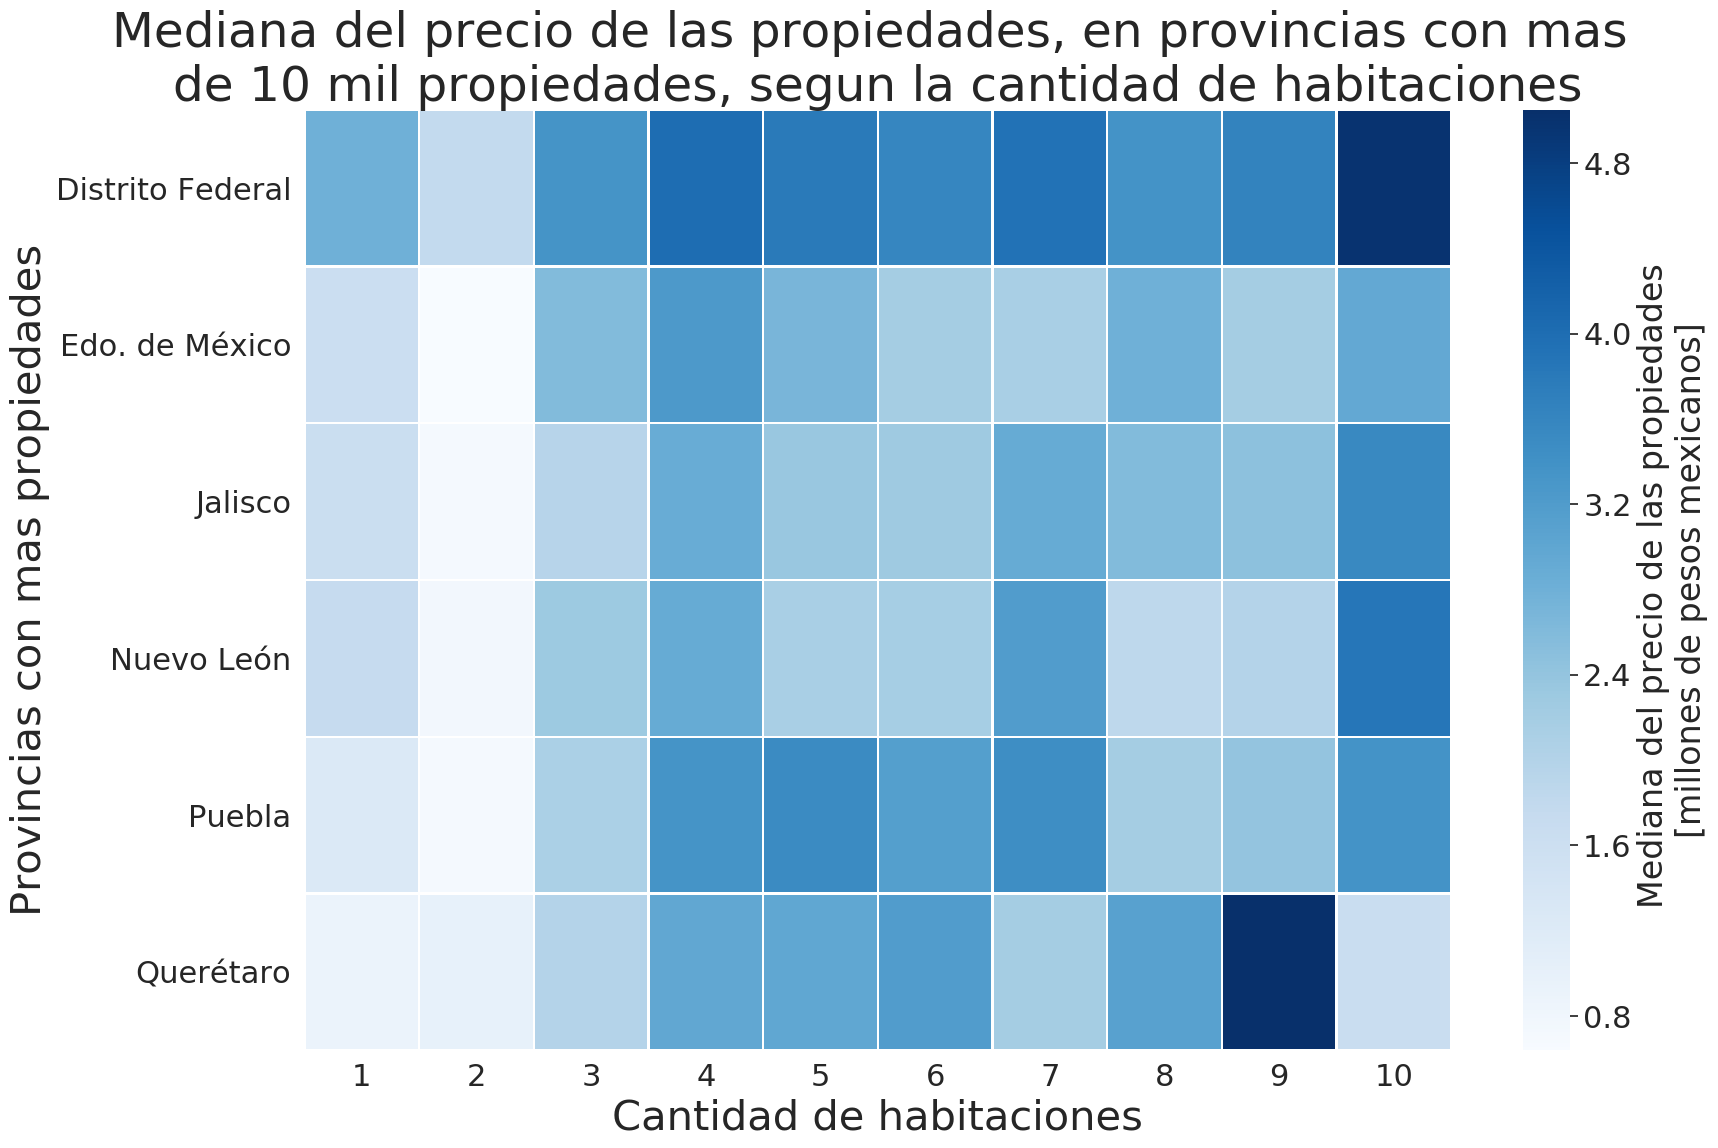

In [101]:
heatmap_top_6_prov_precio_habitaciones = sns.heatmap(
                                                data = top_6_prov_habitaciones_pivot_millones,
                                                cmap = 'Blues',
                                                linewidth = 1,
                                                cbar_kws = {'label' : 'Mediana del precio de las propiedades \n[millones de pesos mexicanos]'}
                                            )

common.setear_titulos_plot(
    heatmap_top_6_prov_precio_habitaciones,
    'Mediana del precio de las propiedades, en provincias con mas \n'+\
    'de 10 mil propiedades, segun la cantidad de habitaciones',
    'Cantidad de habitaciones',
    'Provincias con mas propiedades'
)

fig_heatmap_top_6_prov_precio_habitaciones =\
    heatmap_top_6_prov_precio_habitaciones.get_figure()

plt.tight_layout()
#fig_heatmap_top_6_prov_precio_habitaciones.savefig('./figs/heatmap_provincia_MAS_10_mil_precio_habitaciones.png')
plt.show()

### En las provincias con mayoria de propiedades, ¿como se distribuye el precio de las mismas, segun la cantidad de garages? 

In [20]:
top_6_prov_garages = top_6_prov.fillna(value = {'garages' : 0}).copy()
top_6_prov_garages['garages'] = top_6_prov_garages['garages'].astype(np.int8)
top_6_prov_garages['garages'].dtype

dtype('int8')

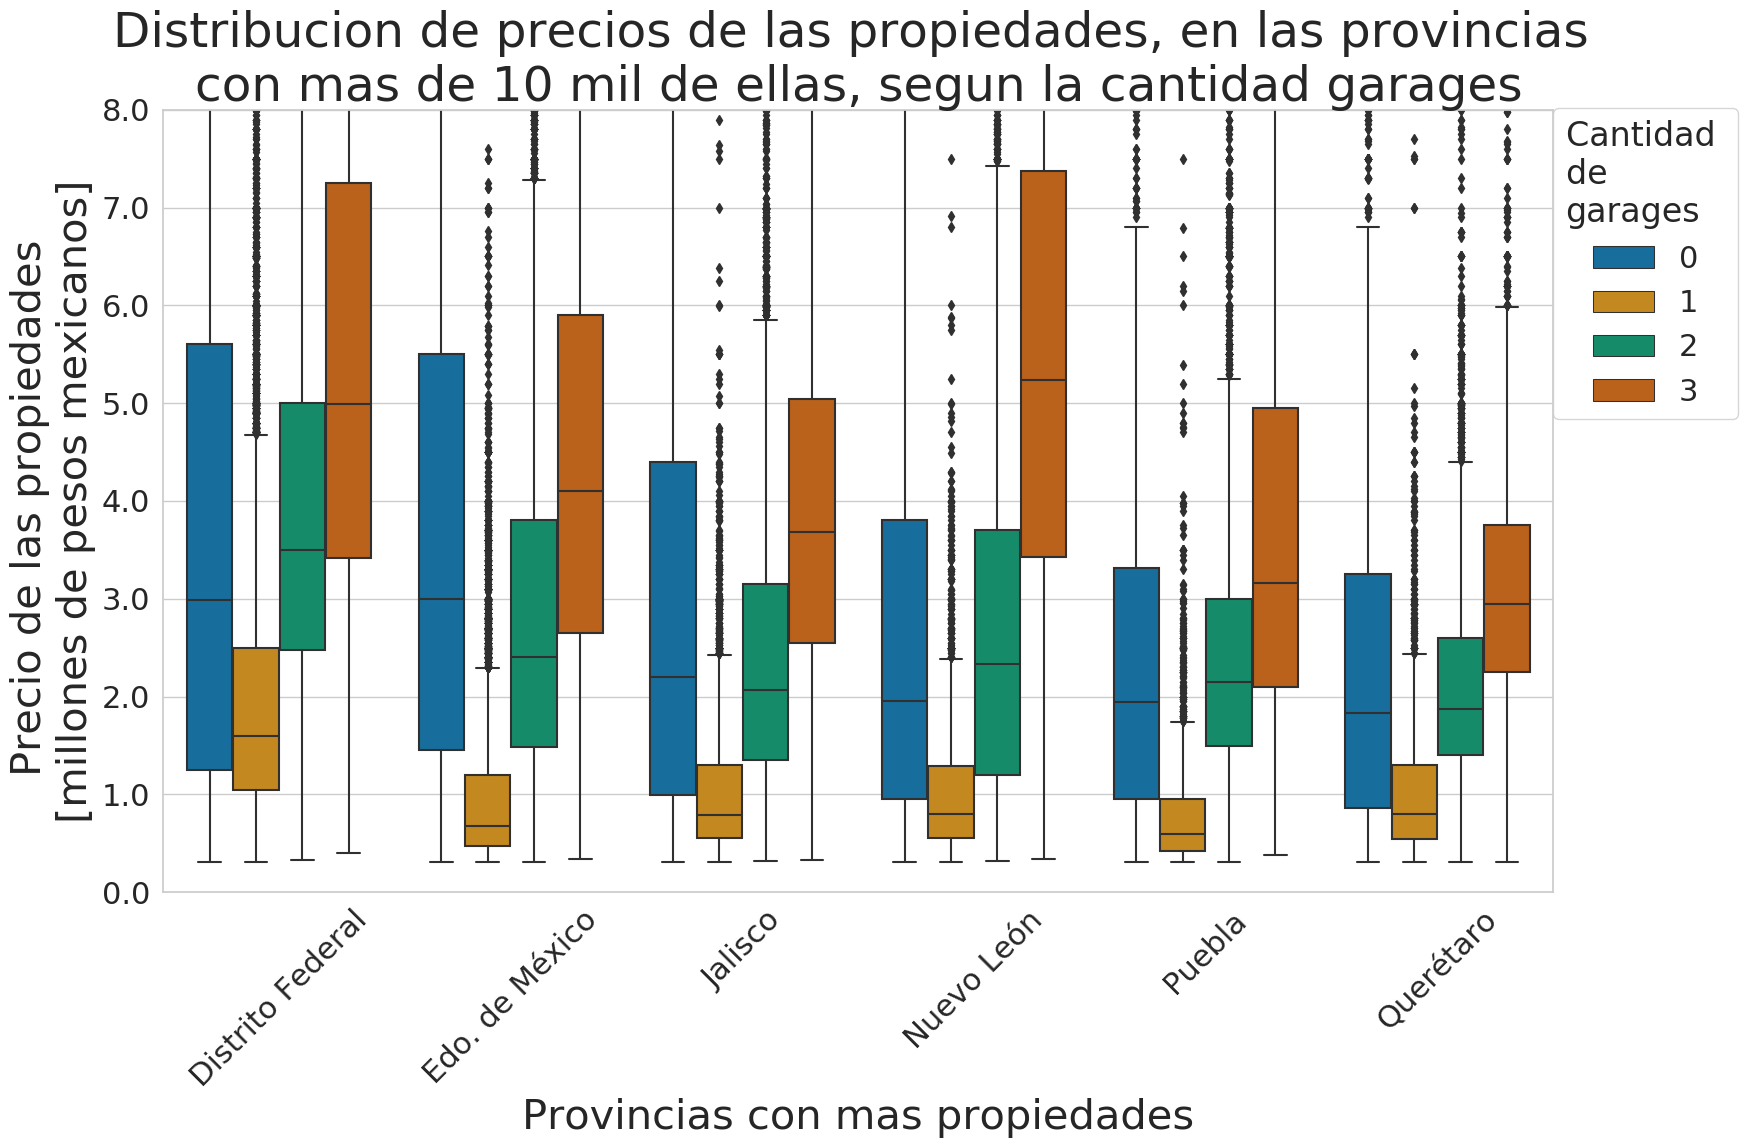

In [100]:
boxplot_top_6_prov_precio_garages = sns.boxplot(
                                        x = 'provincia',
                                        y = 'precio',
                                        hue = 'garages',
                                        data = top_6_prov_garages,
                                        palette = 'colorblind'
                                    )

common.setear_titulos_plot(
    boxplot_top_6_prov_precio_garages,
    'Distribucion de precios de las propiedades, en las provincias \ncon mas de 10 mil de ellas, segun la cantidad garages',
    'Provincias con mas propiedades',
    'Precio de las propiedades \n[millones de pesos mexicanos]'
)

boxplot_top_6_prov_precio_garages.set_xticklabels(
    boxplot_top_6_prov_precio_garages.get_xticklabels(),
    rotation = 45
)

plt.legend(title = 'Cantidad \nde \ngarages', loc = [1,0.605])

boxplot_top_6_prov_precio_garages.yaxis.set_major_formatter(
    FuncFormatter(lambda x, pos: "%0.1f" % (x*1e-6))
)

boxplot_top_6_prov_precio_garages.set_ylim(0,8*1e6)

fig_boxplot_top_6_prov_precio_garages = boxplot_top_6_prov_precio_garages.get_figure()

plt.tight_layout()
#fig_boxplot_top_6_prov_precio_garages.savefig('./figs/boxplot_provincia_MAS_10_mil_precio_garages.png')
plt.show()

### En las provincias con mayoria de propiedades, ¿Como se distribuye el precio en funcion de la presencia de servicios cercanos : escuelas y centros comerciales? 

In [22]:
top_6_prov['escuelascercanas'].isnull().sum()

0

In [23]:
top_6_prov['centroscomercialescercanos'].isnull().sum()

0

In [24]:
def etiquetar_cosas_cercanas(fila):
    if ((fila['escuelascercanas'] == True) and (fila['centroscomercialescercanos'] == True)):
        return 3, 'Escuelas y centros comerciales'
    if (fila['escuelascercanas'] == True):
        return 1, 'Solo escuelas'
    if (fila['centroscomercialescercanos'] == True):
        return 2, 'Solo centros comerciales'
    return 0, 'Ninguno'
top_6_prov_cosas_cercanas = top_6_prov.copy()
top_6_prov_cosas_cercanas_precio = top_6_prov_cosas_cercanas[['provincia', 'escuelascercanas', 'centroscomercialescercanos', 'precio']].copy()
top_6_prov_cosas_cercanas_precio['cosas_cercanas'] = top_6_prov_cosas_cercanas_precio.apply(lambda fila: etiquetar_cosas_cercanas(fila), axis = 1)
top_6_prov_cosas_cercanas_precio['precio']
top_6_prov_cosas_cercanas_precio['orden_cercanos'] =\
    top_6_prov_cosas_cercanas_precio['cosas_cercanas'].transform(lambda valor: valor[0])
top_6_prov_cosas_cercanas_precio['valores_cercanos'] =\
    top_6_prov_cosas_cercanas_precio['cosas_cercanas'].transform(lambda valor: valor[1])
top_6_prov_cosas_cercanas_precio.sort_values(by = ['provincia', 'orden_cercanos'], inplace = True)
top_6_prov_cosas_cercanas_precio

provincia  escuelascercanas  centroscomercialescercanos  \
0       Distrito Federal             False                       False   
39187   Distrito Federal             False                       False   
39191   Distrito Federal             False                       False   
39192   Distrito Federal             False                       False   
39193   Distrito Federal             False                       False   
39203   Distrito Federal             False                       False   
39204   Distrito Federal             False                       False   
39205   Distrito Federal             False                       False   
39206   Distrito Federal             False                       False   
39209   Distrito Federal             False                       False   
39183   Distrito Federal             False                       False   
39182   Distrito Federal             False                       False   
39157   Distrito Federal             False                       False   
39158   Distrito Federal             False                       False   
39159   Distrito Federal             False                       False   
39162   Distrito Federal             False                       False   
39163   Distrito Federal             False                       False   
39167   Distrito Federal             False                       False   
39173   Distrito Federal             False                       False   
39174   Distrito Federal             False                       False   
39175   Distrito Federal             False                       False   
39176   Distrito Federal             False                       False   
39178   Distrito Federal             False                       False   
39179   Distrito Federal             False                       False   
39181   Distrito Federal             False                       False   
39156   Distrito Federal             False                       False   
39213   Distrito Federal             False                       False   
39246   Distrito Federal             False                       False   
39248   Distrito Federal             False                       False   
39249   Distrito Federal             False                       False   
...                  ...               ...                         ...   
132982         Querétaro              True                        True   
132981         Querétaro              True                        True   
132942         Querétaro              True                        True   
132941         Querétaro              True                        True   
132940         Querétaro              True                        True   
132937         Querétaro              True                        True   
132935         Querétaro              True                        True   
132933         Querétaro              True                        True   
132931         Querétaro              True                        True   
132930         Querétaro              True                        True   
132929         Querétaro              True                        True   
132926         Querétaro              True                        True   
132925         Querétaro              True                        True   
132924         Querétaro              True                        True   
132922         Querétaro              True                        True   
132920         Querétaro              True                        True   
132918         Querétaro              True                        True   
132948         Querétaro              True                        True   
132949         Querétaro              True                        True   
132950         Querétaro              True                        True   
132974         Querétaro              True                        True   
132916         Querétaro              True                        True   
132964         Quer

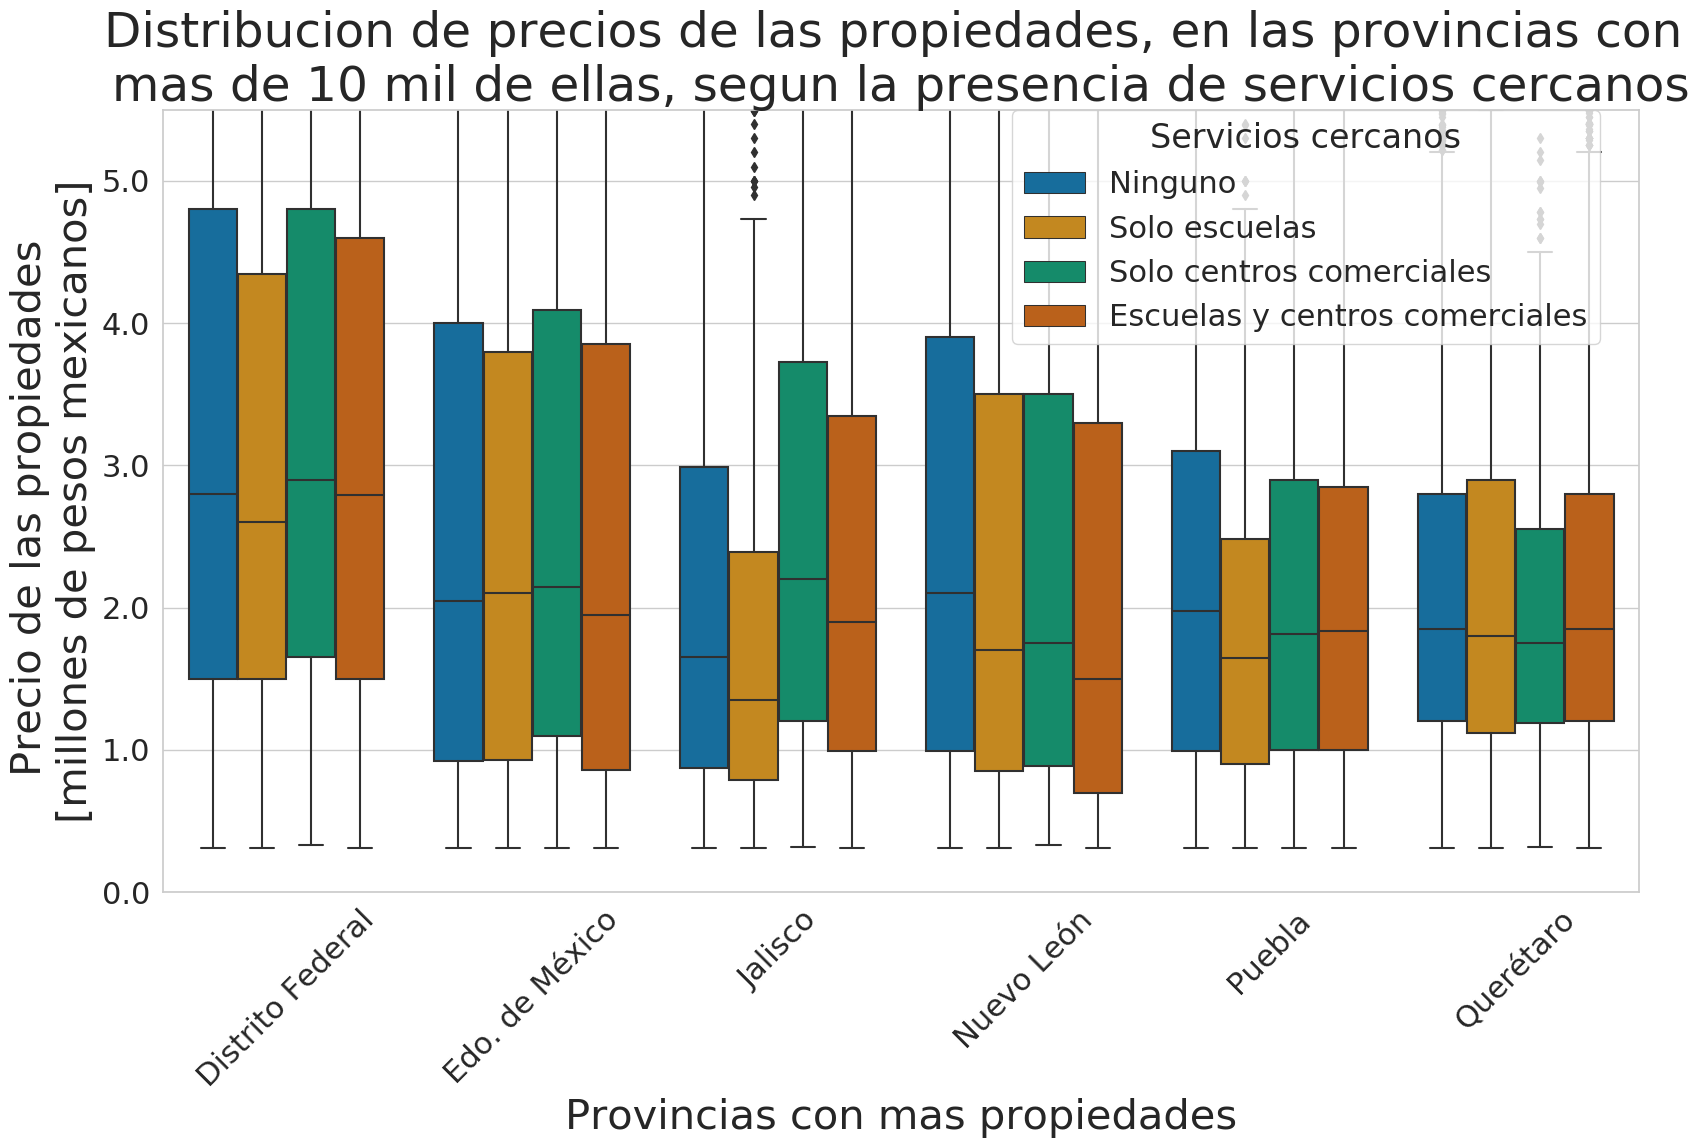

In [108]:
boxplot_top_6_provincias_cosas_cercanas = sns.boxplot(
                                                x = 'provincia',
                                                y = 'precio',
                                                hue = 'valores_cercanos',
                                                data = top_6_prov_cosas_cercanas_precio,
                                                palette = 'colorblind'
                                            )

common.setear_titulos_plot(
    boxplot_top_6_provincias_cosas_cercanas,
    'Distribucion de precios de las propiedades, en las provincias con \nmas de 10 mil de ellas, segun la presencia de servicios cercanos',
    'Provincias con mas propiedades',
    'Precio de las propiedades \n[millones de pesos mexicanos]'
)

boxplot_top_6_provincias_cosas_cercanas.set_xticklabels(
    boxplot_top_6_provincias_cosas_cercanas.get_xticklabels(),
    rotation = 45
)

boxplot_top_6_provincias_cosas_cercanas.set_ylim(0,5500000)

plt.legend(title = 'Servicios cercanos', loc = [0.575,0.7])

boxplot_top_6_provincias_cosas_cercanas.yaxis.set_major_formatter(
    FuncFormatter(lambda x, pos: "%0.1f" % (x*1e-6))
)

fig_boxplot_top_6_provincias_cosas_cercanas =\
    boxplot_top_6_provincias_cosas_cercanas.get_figure()
plt.tight_layout() 
#fig_boxplot_top_6_provincias_cosas_cercanas.savefig('./figs/boxplot_provincia_MAS_10_mil_precio_servicios_cercanos.png')
plt.show()

### En las provincias con mas propiedades, ¿como se distribuye el precio segun la presencia de extras en la propiedad : gimnasio, usos multiples y/o piscina? 

In [26]:
def etiquetar_extras(fila):
    if (fila['gimnasio'] and fila['usosmultiples'] and fila['piscina']):
        return 7,'Gimnasio, \nUsos Multiples \ny Piscina'
    if (fila['gimnasio'] and fila['usosmultiples']):
        return 6, 'Solo Gimnasio \ny Usos \nMultiples'
    if (fila['usosmultiples'] and fila['piscina']):
        return 5, 'Solo Usos \nMultiples \ny Piscina'
    if (fila['gimnasio'] and fila['piscina']):
        return 4, 'Solo Gimnasio \ny Piscina'
    if (fila['gimnasio']):
        return 3, 'Solo Gimnasio'
    if (fila['usosmultiples']):
        return 2, 'Solo Usos \nMultiples'
    if (fila['piscina']):
        return 1, 'Solo Piscina'
    return 0, 'Ninguno'
top_6_prov_extras_precio = top_6_prov[['provincia', 'gimnasio', 'usosmultiples', 'piscina', 'precio']].copy()
top_6_prov_extras_precio['extras'] = top_6_prov_extras_precio.apply(lambda fila: etiquetar_extras(fila), axis = 1)
top_6_prov_extras_precio['orden_extras'] =\
    top_6_prov_extras_precio['extras'].transform(lambda valor: valor[0])
top_6_prov_extras_precio['valores_extras'] =\
    top_6_prov_extras_precio['extras'].transform(lambda valor: valor[1])
top_6_prov_extras_precio.sort_values(by = ['provincia', 'orden_extras'], inplace = True)
top_6_prov_extras_precio

provincia  gimnasio  usosmultiples  piscina  \
0       Distrito Federal     False          False    False   
39186   Distrito Federal     False          False    False   
39187   Distrito Federal     False          False    False   
39188   Distrito Federal     False          False    False   
39189   Distrito Federal     False          False    False   
39191   Distrito Federal     False          False    False   
39192   Distrito Federal     False          False    False   
39193   Distrito Federal     False          False    False   
39194   Distrito Federal     False          False    False   
39195   Distrito Federal     False          False    False   
39196   Distrito Federal     False          False    False   
39197   Distrito Federal     False          False    False   
39199   Distrito Federal     False          False    False   
39200   Distrito Federal     False          False    False   
39201   Distrito Federal     False          False    False   
39202   Distrito Federal     False          False    False   
39203   Distrito Federal     False          False    False   
39204   Distrito Federal     False          False    False   
39205   Distrito Federal     False          False    False   
39207   Distrito Federal     False          False    False   
39208   Distrito Federal     False          False    False   
39209   Distrito Federal     False          False    False   
39198   Distrito Federal     False          False    False   
39183   Distrito Federal     False          False    False   
39182   Distrito Federal     False          False    False   
39157   Distrito Federal     False          False    False   
39158   Distrito Federal     False          False    False   
39159   Distrito Federal     False          False    False   
39160   Distrito Federal     False          False    False   
39161   Distrito Federal     False          False    False   
...                  ...       ...            ...      ...   
130329         Querétaro      True           True     True   
130368         Querétaro      True           True     True   
130303         Querétaro      True           True     True   
131077         Querétaro      True           True     True   
130752         Querétaro      True           True     True   
130871         Querétaro      True           True     True   
130823         Querétaro      True           True     True   
133649         Querétaro      True           True     True   
133689         Querétaro      True           True     True   
133644         Querétaro      True           True     True   
133803         Querétaro      True           True     True   
133830         Querétaro      True           True     True   
133824         Querétaro      True           True     True   
133766         Querétaro      True           True     True   
133421         Querétaro      True           True     True   
134121         Querétaro      True           True     True   
134283         Querétaro      True           True     True   
133918         Querétaro      True           True     True   
133999         Querétaro      True           True     True   
132553         Querétaro      True           True     True   
132675         Querétaro      True           True     True   
132329         Querétaro      True           True     True   
132369         Querétaro      True           True     True   
132267         Querétaro      True           True     True   
132507         Querétaro      True           True     True   
133162         Querétaro      True           True     True   
133077         Querétaro      True           True     True   
133219         Querétaro      True           True     True   
132865         Querétaro      True           True     True   
132952         Querétaro      True           True     True   

                     precio                                       extras  \
0        2,273,000.00000000                                 (0, Ninguno)   
39186    1,210,000

In [109]:
boxplot_top_6_provincias_precio_extras = sns.boxplot(
                                                x = 'provincia',
                                                y = 'precio',
                                                hue = 'valores_extras',
                                                data = top_6_prov_extras_precio,
                                                palette = 'colorblind'
                                            )
common.setear_titulos_plot(
    boxplot_top_6_provincias_precio_extras,
    'Distribucion de precios de las propiedades, en la provincias \n'+\
    'con mas de 10 mil de ellas, segun al presencia de \n'+\
    'gimnasio, usos multiples y/o piscina',
    'Provincias con mas propiedades',
    'Precio de las propiedades \n[millones de pesos mexicanos]'
)

boxplot_top_6_provincias_precio_extras.set_xticklabels(
    boxplot_top_6_provincias_precio_extras.get_xticklabels(),
    rotation = 45
)

boxplot_top_6_provincias_precio_extras.set_ylim(0,8000000)

boxplot_top_6_provincias_precio_extras.yaxis.set_major_formatter(
    FuncFormatter(lambda x, pos: "%0.1f" % (x*1e-6))
)
fig_boxplot_top_6_provincias_precio_extras =\
    boxplot_top_6_provincias_precio_extras.get_figure()

fig_boxplot_top_6_provincias_precio_extras.set_size_inches(20,12)

boxplot_top_6_provincias_precio_extras.legend(title = 'Extras de la \npropiedad', loc = [1,0.015])

plt.tight_layout()
#fig_boxplot_top_6_provincias_precio_extras.savefig('./figs/boxplot_provincia_MAS_10_mil_precio_extras.png')
plt.show()

In [28]:
top_6_prov_extras_precio_pivot = top_6_prov_extras_precio.pivot_table(index = 'provincia', columns = 'extras', values = 'precio', aggfunc = 'median')
top_6_prov_extras_precio_pivot.columns = [    
                                            'Ninguno',
                                            'Solo Piscina',
                                            'Solo Usos \nMultiples',
                                            'Solo Gimnasio',
                                            'Solo Gimnasio \ny Piscina',
                                            'Solo Usos \nMultiples \ny Piscina',
                                            'Solo Gimnasio \ny Usos \nMultiples',
                                            'Gimnasio, \nUsos Multiples \ny Piscina'
                                        ]
top_6_prov_extras_precio_pivot_millones = top_6_prov_extras_precio_pivot.transform(lambda x: x*1e-6)
top_6_prov_extras_precio_pivot_millones

Ninguno         Solo Piscina  \
provincia                                                    
Distrito Federal           2.62500000           4.50000000   
Edo. de México             1.79999995           3.95000005   
Jalisco                    1.59000003           2.34999990   
Nuevo León                 1.78999996           3.75000000   
Puebla                     1.75000000           2.12999988   
Querétaro                  1.79999995           1.82574999   

                  Solo Usos \nMultiples        Solo Gimnasio  \
provincia                                                      
Distrito Federal             3.50000000           3.50000000   
Edo. de México               3.70000005           3.00000000   
Jalisco                      2.28999996           2.99000001   
Nuevo León                   3.15000010           1.85000002   
Puebla                       2.95000005           2.75000000   
Querétaro                    2.27799988           2.59999990   

                  Solo Gimnasio \ny Piscina  \
provincia                                     
Distrito Federal                 5.32350016   
Edo. de México                   4.80000019   
Jalisco                          3.32999992   
Nuevo León                       4.19999981   
Puebla                           2.95000005   
Querétaro                        2.20000005   

                  Solo Usos \nMultiples \ny Piscina  \
provincia                                             
Distrito Federal                         4.00000000   
Edo. de México                           3.62500000   
Jalisco                                  2.46499991   
Nuevo León                               3.75000000   
Puebla                                   2.59999990   
Querétaro                                2.17000008   

                  Solo Gimnasio \ny Usos \nMultiples  \
provincia                                              
Distrito Federal                          3.40000010   
Edo. de México                            3.79999995   
Jalisco                                   3.02699995   
Nuevo León                                3.00000000   
Puebla                                    2.84999990   
Querétaro                                 2.28999996   

                  Gimnasio, \nUsos Multiples \ny Piscina  
provincia                                                 
Distrito Federal                              4.69999981  
Edo. de México                                4.50000000  
Jalisco                                       3.76999998  
Nuevo León                                    4.44000006  
Puebla                                        3.29649997  
Querétaro                                     2.25499988

In [113]:
heatmap_top_6_prov_precio_extras = sns.heatmap(
                                        data = top_6_prov_extras_precio_pivot_millones,
                                        cmap = 'Blues',
                                        linewidth = 1,
                                        cbar_kws = {'label' : 'Mediana del precio de las propiedades \n[millones de pesos mexicanos]'}
                                    )

common.setear_titulos_plot(
    heatmap_top_6_prov_precio_extras,
    'Mediana del precio de las propiedades, en provincias \n'+\
    'con mas de 10 mil de ellas, segun presencia \n'+\
    'de gimnasio, usos multiples y piscina',
    'Extras de la propiedad',
    'Provincias con mas propiedades'
)

fig_heatmap_top_6_prov_precio_extras =\
    heatmap_top_6_prov_precio_extras.get_figure()

plt.tight_layout()
#fig_heatmap_top_6_prov_precio_extras.savefig('./figs/heatmap_provincia_MAS_10_mil_precio_extras.png')
plt.show()

### En las provincias con mayoria de propiedades ¿como varia el precio en funcion de los metros cubiertos? 

In [30]:
top_6_prov_metroscubiertos_precio = top_6_prov.dropna(subset = ['metroscubiertos']).copy()
top_6_prov_metroscubiertos_precio['metroscubiertos'].isnull().sum()

0

#### En las provincias con mayoria de propiedades ¿como varia el precio en funcion de los metros cubiertos (entre 50 y 200) de la propiedad ? 

### En las provincias con mayor cantidad de propiedades, ¿Como varia el precio en base a la antiguedad?

In [31]:
top_6_prov_antiguedad = top_6_prov.dropna(subset = ['antiguedad']).copy()
top_6_prov_antiguedad['antiguedad'].isnull().sum()

0

In [32]:
top_6_prov_antiguedad['antiguedad'] = top_6_prov_antiguedad['antiguedad'].astype(np.int16)
top_6_prov_antiguedad['antiguedad'].dtype

dtype('int16')

In [117]:
def etiquetar_bucket_antiguedad(anio):
    i = anio // 5
    return '{}-{}'.format(5*i, 5*(i+1))
top_6_prov_antiguedad['bucket_antiguedad'] = top_6_prov_antiguedad['antiguedad'].transform(lambda x: etiquetar_bucket_antiguedad(x))
top_6_prov_antiguedad['bucket_antiguedad']

39186      5-10
39187      5-10
39188       0-5
39189     40-45
39190       0-5
39191       0-5
39192       0-5
39193      5-10
39194     25-30
39195     50-55
39185     35-40
39197     30-35
39199     10-15
39200     10-15
39201      5-10
39202     25-30
39203     10-15
39204     10-15
39205      5-10
39206      5-10
39207     20-25
39208       0-5
39198     25-30
39184     10-15
39183      5-10
39182      5-10
39158     20-25
39159     20-25
39160     30-35
39161     20-25
          ...  
132947    10-15
132948     5-10
132949      0-5
132950    20-25
132979      0-5
132978      0-5
132977      0-5
132976      0-5
132975     5-10
132974      0-5
132973    10-15
132972      0-5
132971      0-5
132970    20-25
132969     5-10
132967      0-5
132916      0-5
132966      0-5
132964      0-5
132962      0-5
132961     5-10
132960    10-15
132959      0-5
132958      0-5
132957     5-10
132954    20-25
132953     5-10
132952      0-5
132951    10-15
132965      0-5
Name: bucket_antiguedad,

In [120]:
top_6_prov_antiguedad_precio_pivot = top_6_prov_antiguedad.pivot_table(index = 'provincia', columns = 'bucket_antiguedad', values = 'precio', aggfunc = 'median')
top_6_prov_antiguedad_precio_pivot_millones = top_6_prov_antiguedad_precio_pivot.transform(lambda x: x*1e-6)
top_6_prov_antiguedad_precio_pivot_millones.fillna(-2.5, inplace = True)
top_6_prov_antiguedad_precio_pivot_millones

bucket_antiguedad                  0-5                10-15  \
provincia                                                     
Distrito Federal            3.09999990           2.20000005   
Edo. de México              2.25000000           1.50000000   
Jalisco                     2.04999995           1.45000005   
Nuevo León                  2.75000000           1.20000005   
Puebla                      2.09999990           0.90249002   
Querétaro                   1.89499998           1.72000003   

bucket_antiguedad                15-20                20-25  \
provincia                                                     
Distrito Federal            2.17849994           2.70000005   
Edo. de México              1.69717705           2.50000000   
Jalisco                     1.35000002           2.08999991   
Nuevo León                  1.26999998           1.56700003   
Puebla                      0.68000001           1.82000005   
Querétaro                   1.68999994           2.40000010   

bucket_antiguedad                25-30                30-35  \
provincia                                                     
Distrito Federal            2.39499998           2.50000000   
Edo. de México              2.15000010           2.54999995   
Jalisco                     1.50000000           1.79999995   
Nuevo León                  1.54499996           1.56075001   
Puebla                      2.09999990           1.88999999   
Querétaro                   2.12999988           2.40000010   

bucket_antiguedad                35-40                40-45  \
provincia                                                     
Distrito Federal            2.59999990           3.00000000   
Edo. de México              2.72499990           3.20000005   
Jalisco                     1.98000002           1.99249995   
Nuevo León                  1.68999994           1.89499998   
Puebla                      1.14999998           2.04999995   
Querétaro                   2.02500010           2.42499995   

bucket_antiguedad                45-50                 5-10  \
provincia                                                     
Distrito Federal            2.74000001           2.59999990   
Edo. de México              3.29999995           1.75000000   
Jalisco                     2.33750010           1.28999996   
Nuevo León                  2.07375002           1.29499996   
Puebla                      2.40000010           1.10000002   
Querétaro                  -2.50000000           1.58500004   

bucket_antiguedad                50-55                55-60  \
provincia                                                     
Distrito Federal            3.75000000           3.34999990   
Edo. de México              3.40000010           5.28999996   
Jalisco                     1.67499995           1.38999999   
Nuevo León                  2.59999990           3.20000005   
Puebla                      3.15000010           1.50000000   
Querétaro                   3.20000005          -2.50000000   

bucket_antiguedad                60-65                65-70  \
provincia                                                     
Distrito Federal            3.48000002           3.79999995   
Edo. de México              4.40000010          -2.50000000   
Jalisco                     1.95000005           0.69499999   
Nuevo León                  2.40000010           3.50000000   
Puebla                      1.89999998           1.14999998   
Querétaro                  -2.50000000          -2.50000000   

bucket_antiguedad                70-75                75-80  \
provincia                                                     
Distrito Federal            3.50000000           5.59999990   
Edo. de México             -2.50000000          -2.50000000   
Jalisco                     1.89999998          -2.50000000   
Nuevo León                 -2.50000000          -2.50000000   
Puebla                     -2.50000000          -2.50000000   
Querétaro               

In [123]:
heatmap_top_6_prov_precio_antiguedad_bucket = sns.heatmap(
                                                    data = top_6_prov_antiguedad_precio_pivot_millones,
                                                    cmap = 'Blues',
                                                    linewidth = 1,
                                                    cbar_kws = {'label' : 'Mediana del precio de las propiedades \n[millones de pesos mexicanos]'}
                                                )


common.setear_titulos_plot(
    heatmap_top_6_prov_precio_antiguedad_bucket,
    'Mediana del precio de las propiedades, en provincias \n'+\
    'con mas de 10 mil de ellas, segun la antigüedad',
    'Antigüedad [años] \n(antigüedades inexistentes acompañadas de valores menores a cero)',
    'Provincias con mas propiedades'
)

fig_heatmap_top_6_prov_precio_antiguedad_bucket =\
    heatmap_top_6_prov_precio_antiguedad_bucket.get_figure()

plt.tight_layout()
#fig_heatmap_top_6_prov_precio_antiguedad_bucket.savefig('./figs/heatmap_provincia_MAS_10_mil_precio_antiguedad.png')
plt.show()

In [33]:
top_6_prov_antiguedad_precio_mediana = top_6_prov_antiguedad.groupby(['provincia', 'antiguedad']).agg({'precio': 'median'})
top_6_prov_antiguedad_precio_mediana.reset_index(inplace = True)
top_6_prov_antiguedad_precio_mediana['precio_millones'] = top_6_prov_antiguedad_precio_mediana['precio'].transform(lambda x: x*1e-6) 
top_6_prov_antiguedad_precio_mediana_pivot = top_6_prov_antiguedad_precio_mediana.pivot_table(
                                            index = 'antiguedad',
                                            columns = 'provincia',
                                            values = 'precio_millones',
                                            fill_value = -5
                                        )
top_6_prov_antiguedad_precio_mediana_pivot

provincia      Distrito Federal       Edo. de México              Jalisco  \
antiguedad                                                                  
0                    3.00000000           2.10000000           2.09500000   
1                    3.23000000           2.35000000           1.90000000   
2                    3.25000000           2.50000000           2.25000000   
3                    3.15000000           2.40000000           2.28250000   
4                    3.15000000           2.35000000           1.75000000   
5                    2.65000000           1.75133100           1.29750000   
6                    2.55000000           2.10000000           1.30000000   
7                    2.40000000           1.60000000           1.20000000   
8                    2.85000000           1.45000000           1.19500000   
9                    2.20000000           1.37250000           1.36500000   
10                   2.20000000           1.50000000           1.48500000   
11                   2.45000000           1.80000000           1.27000000   
12                   2.00000000           1.50000000           1.07500000   
13                   2.67500000           1.55000000           1.25500000   
14                   2.20000000           1.70000000           1.07250000   
15                   2.00000000           1.49500000           1.25000000   
16                   2.19000000           2.15000000           1.89500000   
17                   2.19750000           1.60000000           0.99500000   
18                   2.20000000           1.90000000           1.46000000   
19                   2.65000000           2.74000000           2.60000000   
20                   2.70000000           2.50000000           2.10000000   
21                   3.21250000           2.80000000           1.68000000   
22                   2.20000000           2.62500000           2.40000000   
23                   2.16000000           2.00000000           1.29000000   
24                   2.10000000           1.93000000           3.20000000   
25                   2.29800000           2.15000000           1.37250000   
26                   2.45000000           1.95000000           1.60000000   
27                   2.80000000           2.25000000           1.99500000   
28                   2.39500000           2.20000000           2.20000000   
29                   2.23000000           1.98500000           1.35000000   
...                         ...                  ...                  ...   
46                   2.32500000           3.18000000          -5.00000000   
47                   2.35000000           2.45000000           2.29500000   
48                   2.60000000           2.65000000           2.67750000   
49                   3.50000000           3.59000000          -5.00000000   
50                   3.80000000           3.32500000           1.65000000   
51                   4.50000000           4.25000000          -5.00000000   
52                   1.18400000          -5.00000000          -5.00000000   
53                   3.22500000           4.15000000           6.49000000   
54                   2.90000000          -5.00000000          -5.00000000   
55                   3.20000000          -5.00000000           1.39000000   
56                   3.37500000           3.99000000          -5.00000000   
57                   6.50000000          -5.00000000          -5.00000000   
58                   3.60000000           6.59000000          -5.00000000   
59                   3.87000000          -5.00000000          -5.00000000   
60                   3.44000000           4.40000000           1.95000000   
61                   8.50000000          -5.00000000          -5.00000000   
62                   3.95000000          -5.00000000          -5.00000000   
63                   2.64500000          -5.00000000          -5.00000000   
64                   3.00000000          -5.00000000          -5.00000000

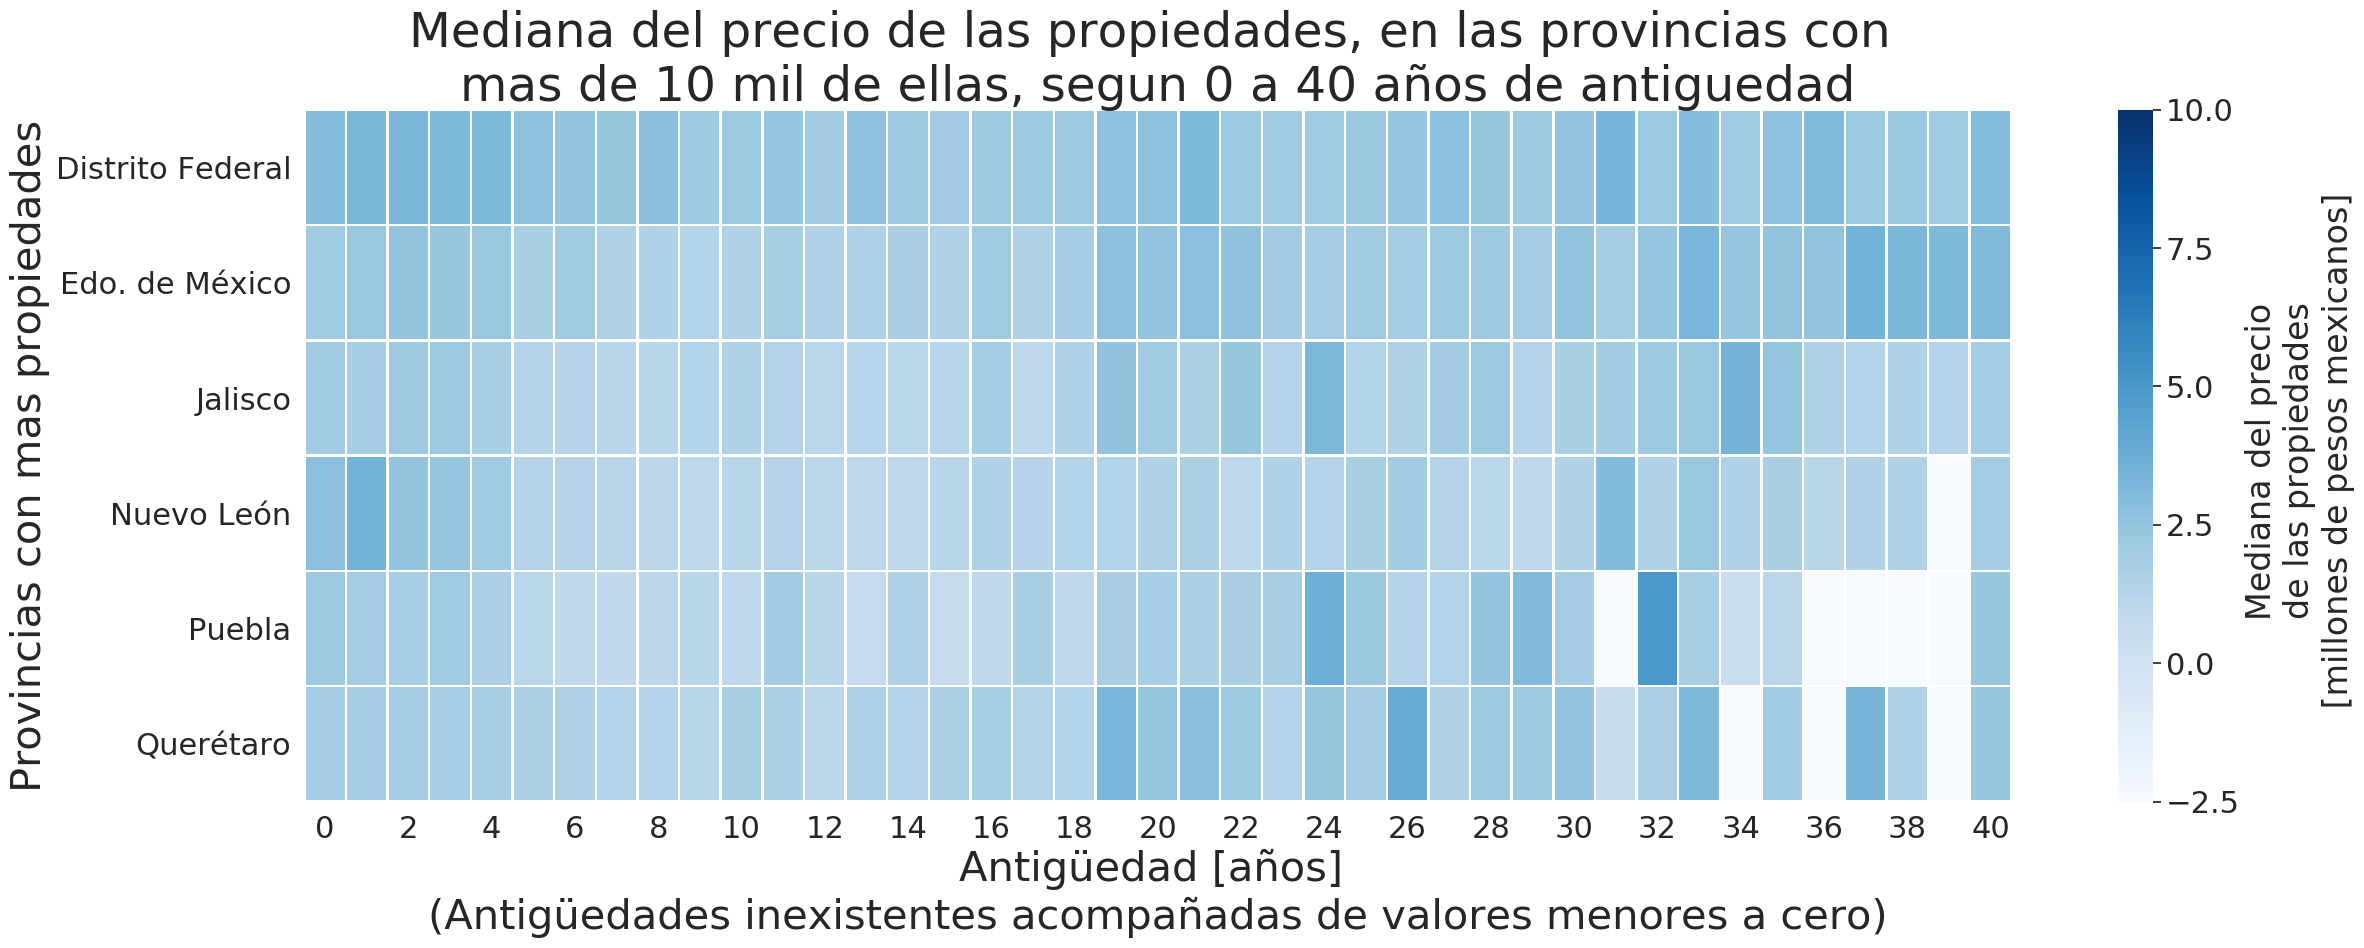

In [114]:
heatmap_top_6_prov_antiguedad_menor_40_precio_mediana = sns.heatmap(
                                            top_6_prov_antiguedad_precio_mediana_pivot.iloc[0:40+1].T, 
                                            cmap = 'Blues', 
                                            linewidth = 1,
                                            vmin = -2.5,
                                            vmax = 10,
                                            cbar_kws = {'label' : 'Mediana del precio \nde las propiedades \n [millones de pesos mexicanos]'}
                                        )

common.setear_titulos_plot(
    heatmap_top_6_prov_antiguedad_menor_40_precio_mediana,
    'Mediana del precio de las propiedades, en las provincias con \n'+\
    'mas de 10 mil de ellas, segun 0 a 40 años de antiguedad',
    'Antigüedad [años] \n(Antigüedades inexistentes acompañadas de valores menores a cero)',
    'Provincias con mas propiedades'
)

fig_heatmap_top_6_prov_antiguedad_menor_40_precio_mediana =\
    heatmap_top_6_prov_antiguedad_menor_40_precio_mediana.get_figure()

fig_heatmap_top_6_prov_antiguedad_menor_40_precio_mediana.set_size_inches(25, 10)

plt.tight_layout()
#fig_heatmap_top_6_prov_antiguedad_menor_40_precio_mediana.savefig('./figs/heatmap_provincia_MAS_10_MIL_precio_antiguedad_menor_40')
plt.show()

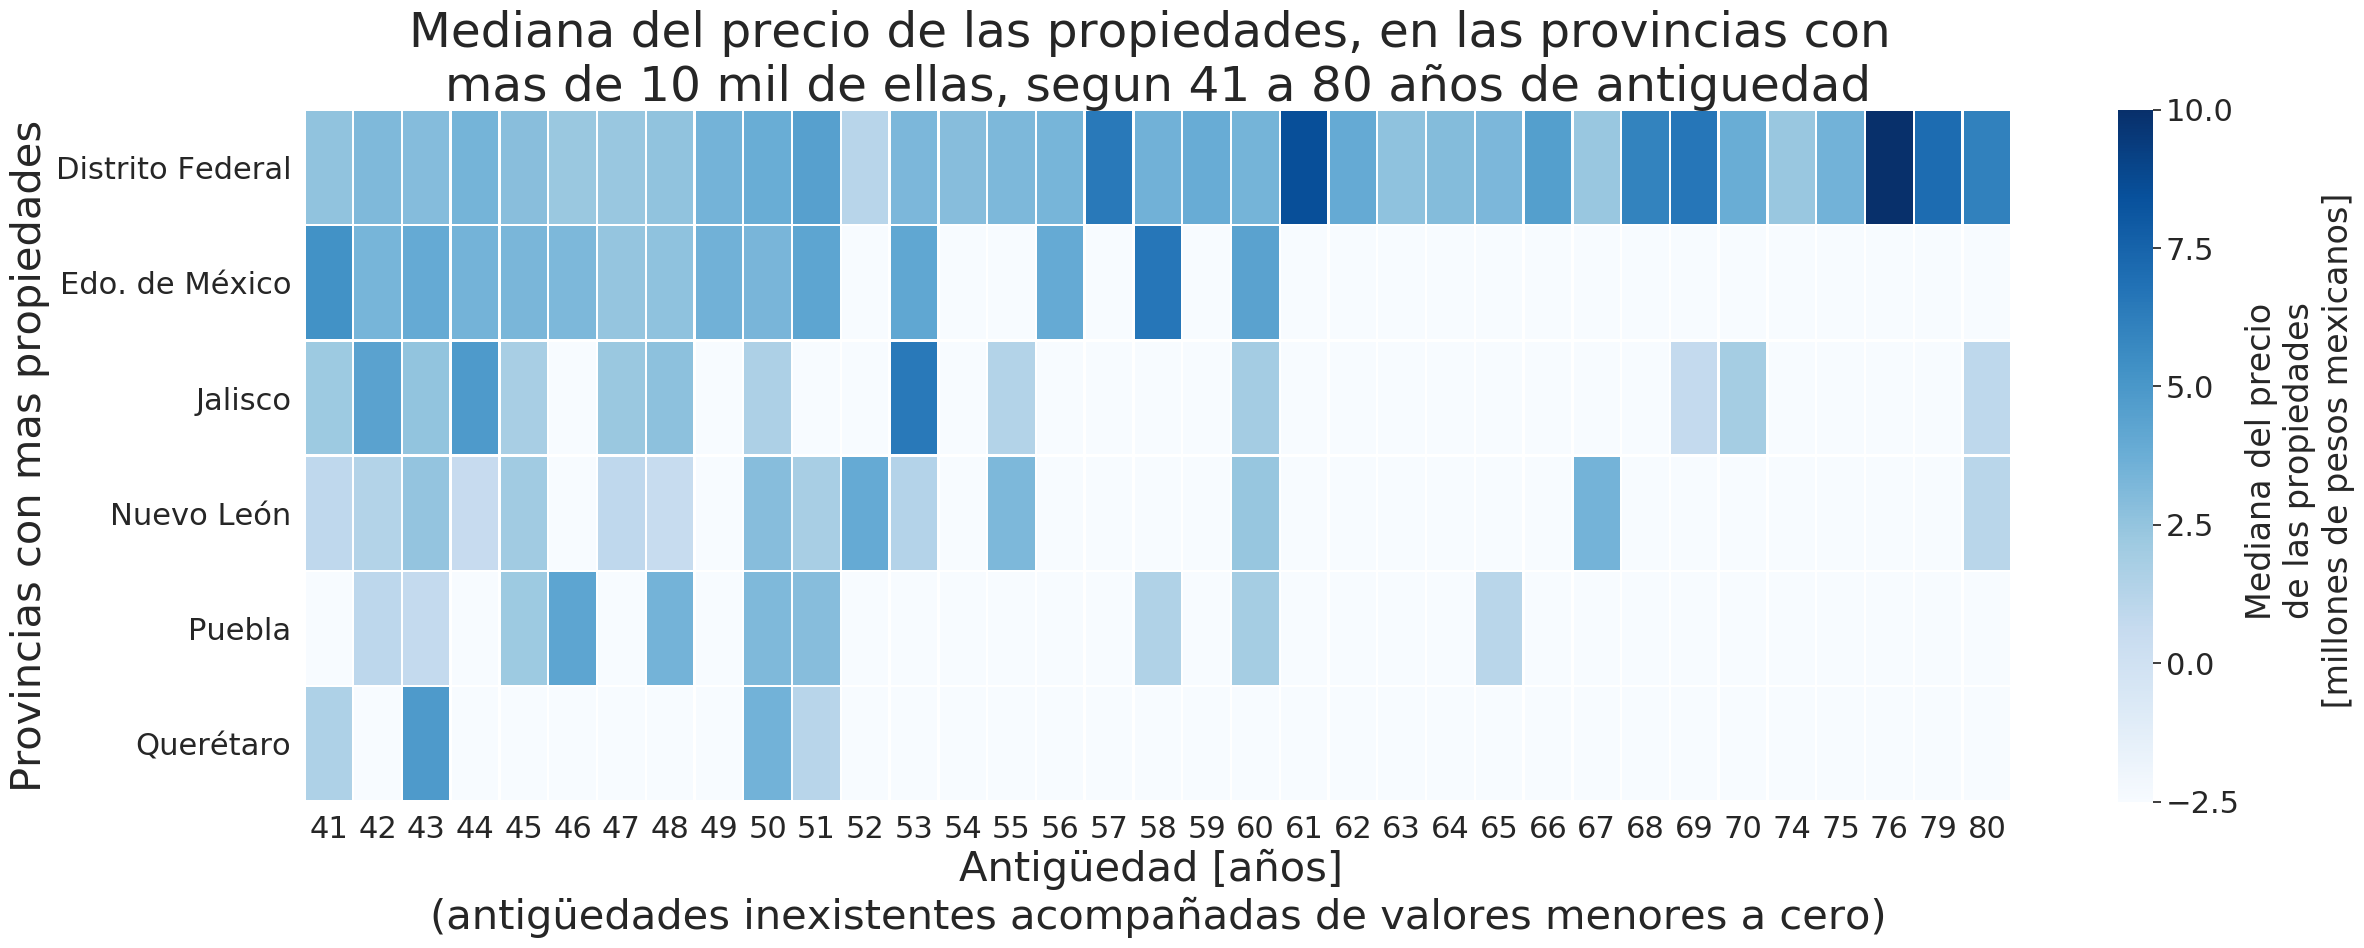

In [115]:
heatmap_top_6_prov_antiguedad_mayor_40_precio_mediana = sns.heatmap(
                                            top_6_prov_antiguedad_precio_mediana_pivot.iloc[41:80+1].T, 
                                            cmap = 'Blues', 
                                            linewidth = 1,
                                            vmin = -2.5,
                                            vmax = 10,
                                            cbar_kws = {'label' : 'Mediana del precio \nde las propiedades \n [millones de pesos mexicanos]'}
                                        )

common.setear_titulos_plot(
    heatmap_top_6_prov_antiguedad_mayor_40_precio_mediana,
    'Mediana del precio de las propiedades, en las provincias con \n'+\
    'mas de 10 mil de ellas, segun 41 a 80 años de antiguedad',
    'Antigüedad [años] \n(antigüedades inexistentes acompañadas de valores menores a cero)',
    'Provincias con mas propiedades'
)

heatmap_top_6_prov_antiguedad_mayor_40_precio_mediana.set_xticklabels(
    heatmap_top_6_prov_antiguedad_mayor_40_precio_mediana.get_xticklabels(),
    rotation = 0
)

fig_heatmap_top_6_prov_antiguedad_mayor_40_precio_mediana =\
    heatmap_top_6_prov_antiguedad_mayor_40_precio_mediana.get_figure()

fig_heatmap_top_6_prov_antiguedad_mayor_40_precio_mediana.set_size_inches(25, 10)

plt.tight_layout()
#fig_heatmap_top_6_prov_antiguedad_mayor_40_precio_mediana.savefig('./figs/heatmap_provincia_MAS_10_mil_precio_antiguedad_mayor_40')
plt.show()

### En las provincias con mayoria de propiedades ¿como varia la mediana del precios en segun el tipo de propiedad?  

In [36]:
top_6_prov.columns

Index(['provincia', 'cantidad_propiedades', 'id', 'titulo', 'descripcion',
       'tipodepropiedad', 'direccion', 'ciudad', 'antiguedad', 'habitaciones',
       'garages', 'banos', 'metroscubiertos', 'metrostotales', 'idzona', 'lat',
       'lng', 'fecha', 'gimnasio', 'usosmultiples', 'piscina',
       'escuelascercanas', 'centroscomercialescercanos', 'precio'],
      dtype='object')

In [37]:
top_6_prov_tipodepropiedad = top_6_prov.dropna(subset = ['tipodepropiedad']).copy()
top_6_prov_tipodepropiedad = top_6_prov_tipodepropiedad[['provincia', 'tipodepropiedad', 'precio']]
top_6_prov_tipodepropiedad_precio_mediana =\
    top_6_prov_tipodepropiedad.groupby(['provincia', 'tipodepropiedad']).agg({'precio' : 'median'})
top_6_prov_tipodepropiedad_precio_mediana.columns = ['precio_median']
top_6_prov_tipodepropiedad_precio_mediana.reset_index(inplace = True)
top_6_prov_tipodepropiedad_precio_mediana['precio_median'] =\
    top_6_prov_tipodepropiedad_precio_mediana['precio_median'].transform(lambda x: x*1e-6)
top_6_prov_tipodepropiedad_precio_mediana_pivot =\
    top_6_prov_tipodepropiedad_precio_mediana.pivot_table(
        index = 'tipodepropiedad', 
        columns = 'provincia', 
        values = 'precio_median',
        fill_value = -5
    )
top_6_prov_tipodepropiedad_precio_mediana_pivot

provincia                         Distrito Federal       Edo. de México  \
tipodepropiedad                                                           
Apartamento                             2.11060000           2.10000000   
Bodega comercial                        3.80000000           2.35000000   
Casa                                    3.43500000           2.10000000   
Casa en condominio                      4.30000000           1.68000000   
Casa uso de suelo                       4.80000000           2.74000000   
Departamento Compartido                 1.55000000           1.97500000   
Duplex                                  3.10000000           0.61000000   
Edificio                                5.50000000           4.00000000   
Garage                                  0.50000000          -5.00000000   
Huerta                                 -5.00000000           8.00000000   
Inmuebles productivos urbanos           4.50000000           2.90000000   
Local Comercial                         2.20000000           2.10000000   
Local en centro comercial               1.58000000           1.26655000   
Lote                                    2.45000000           0.51000000   
Nave industrial                         3.77500000           3.65000000   
Oficina comercial                       2.97750000           2.99500000   
Otros                                   3.35000000           4.66500000   
Quinta Vacacional                       1.85722600           2.58000000   
Rancho                                  3.76000000           4.70000000   
Terreno                                 3.25000000           1.30000000   
Terreno comercial                       3.77500000           2.40000000   
Terreno industrial                      4.58056650           3.20000000   
Villa                                   2.30000000           2.20000000   

provincia                                  Jalisco           Nuevo León  \
tipodepropiedad                                                           
Apartamento                             1.85000000           3.10000000   
Bodega comercial                        1.98000000           1.85000000   
Casa                                    1.75000000           1.70000000   
Casa en condominio                      2.05000000           2.30000000   
Casa uso de suelo                       2.40000000           2.07500000   
Departamento Compartido                 1.72900000           3.24500000   
Duplex                                  0.58500000           0.80000000   
Edificio                                4.35000000           3.19500000   
Garage                                 -5.00000000          -5.00000000   
Huerta                                  1.60000000           6.20000000   
Inmuebles productivos urbanos           1.97450000           0.48000000   
Local Comercial                         1.76770000           2.00000000   
Local en centro comercial               1.85000000           3.00000000   
Lote                                   -5.00000000          -5.00000000   
Nave industrial                         3.70000000           2.50000000   
Oficina comercial                       3.40000000           2.50000000   
Otros                                  -5.00000000           4.49097500   
Quinta Vacacional                       1.95000000           2.75000000   
Rancho                                  2.50000000           3.55000000   
Terreno                                 1.13155000           1.35000000   
Terreno comercial                       1.95000000           1.43230000   
Terreno industrial                      1.40000000           3.84651000   
Villa                                   1.90000000           2.50000000   

provincia                                   Puebla            Querétaro  
tipodepropiedad                                                          
Apartamento                             1.45000000           1.65000000  
Bodega comercial          

In [124]:
heatmap_top_6_prov_tipodepropiedad_precio_mediana = sns.heatmap(
                                                        data = top_6_prov_tipodepropiedad_precio_mediana_pivot.T,
                                                        cmap = 'Blues',
                                                        linewidth = 1,
                                                        vmin = -2.5,
                                                        vmax = 10,
                                                        cbar_kws = {'label' : 'Mediana del precio \nde las propiedades \n [millones de pesos mexicanos] \n'}
                                                    )
common.setear_titulos_plot(
    heatmap_top_6_prov_tipodepropiedad_precio_mediana,
    'Mediana del precio de las propiedades, en las provincias \n'+\
    'con mas de 10 mil de ellas, segun el tipo de propiedad',
    'Tipo de propiedad  \n(tipos inexistentes acompañados de valores menores a cero)',
    'Provincias con \nmas propiedades'
)

fig_heatmap_top_6_prov_tipodepropiedad_precio_mediana =\
    heatmap_top_6_prov_tipodepropiedad_precio_mediana.get_figure()

plt.tight_layout()
#fig_heatmap_top_6_prov_tipodepropiedad_precio_mediana.savefig('./figs/heatmap_provincia_MAS_10_mil_precio_tipodepropiedad.png')
plt.show()

## Provincia con menos de 10.000 propiedades 

### En las provincias con menos de 10 mil propiedades, ¿Como se distribuye el precio? 

In [39]:
provincia_cant_propiedades_menor_10_mil = provincias_cant.loc[provincias_cant['cantidad_propiedades'] < 10000].copy()
prov_resto = provincia_cant_propiedades_menor_10_mil.merge(zona_provincia, on = 'provincia', how = 'inner')
prov_resto.drop('cantidad_propiedades', axis = 1, inplace = True)
prov_resto

provincia      id  \
0      San luis Potosí   51180   
1      San luis Potosí  162157   
2      San luis Potosí  241431   
3      San luis Potosí  249523   
4      San luis Potosí   33712   
5      San luis Potosí  253204   
6      San luis Potosí   76237   
7      San luis Potosí  227708   
8      San luis Potosí  194182   
9      San luis Potosí  219139   
10     San luis Potosí  135904   
11     San luis Potosí   18218   
12     San luis Potosí  246608   
13     San luis Potosí  268239   
14     San luis Potosí  222573   
15     San luis Potosí  224663   
16     San luis Potosí  186414   
17     San luis Potosí  148502   
18     San luis Potosí   50824   
19     San luis Potosí    2898   
20     San luis Potosí  138251   
21     San luis Potosí  269465   
22     San luis Potosí  104807   
23     San luis Potosí  182806   
24     San luis Potosí  236393   
25     San luis Potosí  244798   
26     San luis Potosí  147036   
27     San luis Potosí  215582   
28     San luis Potosí  229535   
29     San luis Potosí  141651   
...                ...     ...   
75447        Zacatecas  252310   
75448        Zacatecas  284485   
75449        Zacatecas   27706   
75450        Zacatecas  106296   
75451        Zacatecas    6858   
75452        Zacatecas   92525   
75453        Zacatecas  287591   
75454        Zacatecas   44903   
75455        Zacatecas  143488   
75456        Zacatecas  147654   
75457        Zacatecas   43401   
75458        Zacatecas  265124   
75459        Zacatecas   37299   
75460        Zacatecas    2317   
75461        Zacatecas  130788   
75462        Zacatecas  123190   
75463        Zacatecas  179806   
75464        Zacatecas  224128   
75465        Zacatecas   33993   
75466        Zacatecas   28737   
75467        Zacatecas  163941   
75468        Zacatecas  226592   
75469        Zacatecas  275038   
75470        Zacatecas  201744   
75471        Zacatecas  194644   
75472        Zacatecas    3654   
75473        Zacatecas  190742   
75474        Zacatecas  191824   
75475        Zacatecas   57022   
75476        Zacatecas  132311   

                                                  titulo  \
0                                          mi 2° credito   
1                                          universitaria   
2                  terreno en residencial la vista 323m2   
3                            2a. privada de agustin vera   
4                            casas en venta villa verona   
5      casa  a estrenar  venta , acabados de lujo en ...   
6                           casas en venta tequisquiapam   
7                    departamento en venta en del parque   
8                 terrenos en venta la loma club de golf   
9                      casas en venta lomas 4a. secciã³n   
10                          casa en venta en santa lucía   
11     departamento en venta en lomas del tecnologico...   
12                casa en venta en lomas del tecnológico   
13                      casa en venta en san luis potosí   
14                                    departamento nuevo   
15                                          montes kelut   
16     departamento en venta lomas 4a. seccion las ha...   
17                                     torre entrecielos   
18                              casas en venta lomas 4âª   
19     casas nuevas en 2a privada de ponciano arriaga...   
20                terrenos en venta barrio san miguelito   
21     departamentos en venta , excelente ubicacion e...   
22                   departamento en venta tequisquiapan   
23                            terrenos en venta la punta   
24                casas en venta fracc. potosino de golf   
25                     casas en venta colinas del parque   
26             los puentes - departamento nuevo en venta   
27     departamento nuevo en venta excelentes acabado...   
28     casa en excelentes condiciones a unos pasos de...   
29                                 casa lomas 4a sección   
...                                         

In [125]:
distplot_prov_resto_precio = sns.distplot(
                                    prov_resto['precio'],
                                    hist = True,
                                    color = 'orange'
                                )
common.setear_titulos_plot(
    distplot_prov_resto_precio,
    'Histograma del precio de las propiedades, en las \n'+\
    'provincias con menos de 10 mil de ellas',
    'Precio de las propiedades \n[millones de pesos mexicanos]',
    ''
)

distplot_prov_resto_precio.xaxis.set_major_formatter(
    FuncFormatter(lambda x, pos: "%0.1f" % (x*1e-6))
)

fig_distplot_prov_resto_precio =\
    distplot_prov_resto_precio.get_figure()

plt.tight_layout()
#fig_distplot_prov_resto_precio.savefig('./figs/distplot_provincia_MENOS_10_mil_precio.png')
plt.show()

### En las provincias con MENOS de 10 mil propieades ¿Como se distribuye el precio de las mismas, segun la cantidad de baños? 

In [41]:
prov_resto_banos = prov_resto.fillna(value = {'banos' : 1})
prov_resto_banos['banos'] = prov_resto_banos['banos'].astype(np.int8)
prov_resto_banos['banos'].dtype

dtype('int8')

In [42]:
prov_resto_banos_precio_estadist = common.agrupar_calcular_estadisticas_desagrupar(prov_resto_banos, 'banos', 'precio')
prov_resto_banos_precio_estadist_millones = prov_resto_banos_precio_estadist.transform(lambda x: x*1e-6)
prov_resto_banos_precio_estadist_millones

banos     precio_cuantil_1        precio_median  \
0           0.00000100           0.47999999           0.69499999   
1           0.00000200           0.94999999           1.39900005   
2           0.00000300           1.54999995           2.22399998   
3           0.00000400           2.25250006           3.15000010   

      precio_cuantil_3  
0           1.23000002  
1           1.95000005  
2           3.20000005  
3           4.25000000

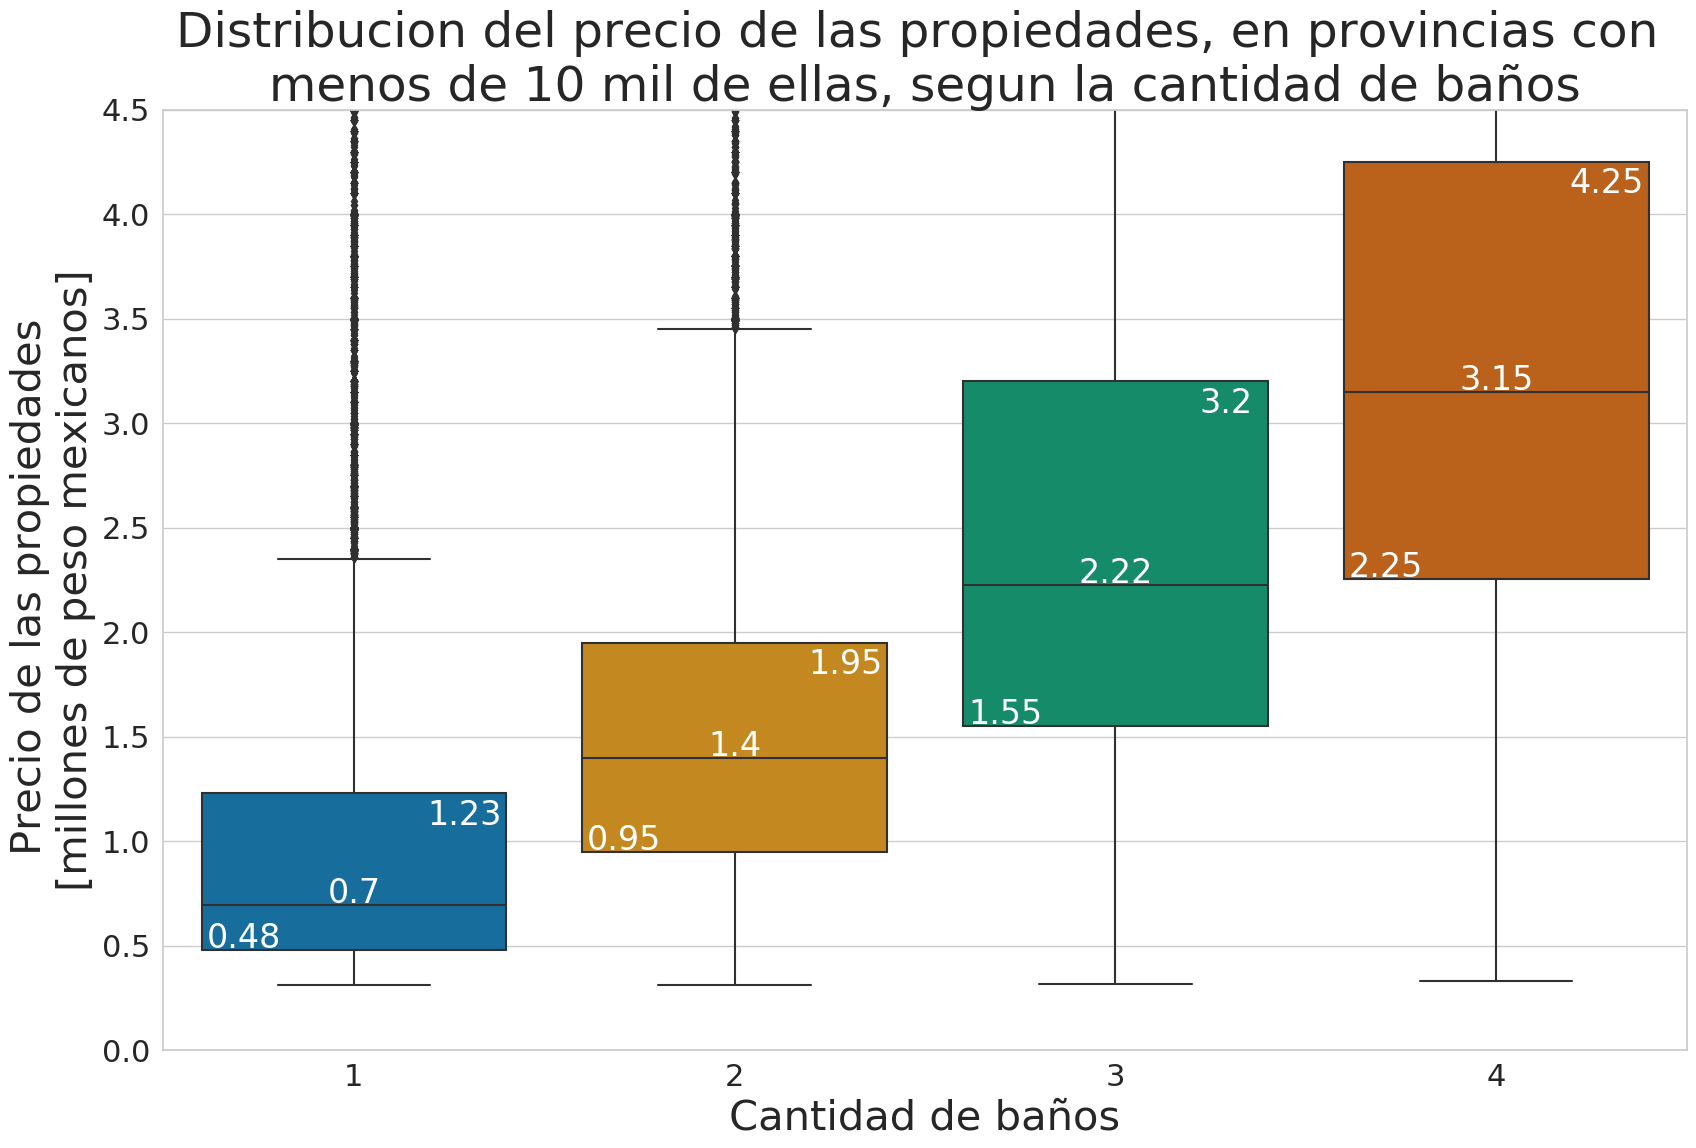

In [127]:
boxplot_prov_resto_precio_banos = sns.boxplot(
                                        x = 'banos',
                                        y = 'precio',
                                        data = prov_resto_banos,
                                        palette = 'colorblind',                                
                                    )
common.setear_titulos_plot(
    boxplot_prov_resto_precio_banos,
    'Distribucion del precio de las propiedades, en provincias con \n'+\
    'menos de 10 mil de ellas, segun la cantidad de baños',
    'Cantidad de baños',
    'Precio de las propiedades \n[millones de peso mexicanos]'
)

boxplot_prov_resto_precio_banos.set_ylim(0,4500000)
boxplot_prov_resto_precio_banos.yaxis.set_major_formatter(
    FuncFormatter(lambda x, pos: "%0.1f" % (x*1e-6))
)

common.agregar_serie_plot(
    boxplot_prov_resto_precio_banos,
    prov_resto_banos_precio_estadist_millones['precio_cuantil_1'],
    prov_resto_banos_precio_estadist['precio_cuantil_1'],
    'w',
    -0.29, 10000
)

common.agregar_serie_plot(
    boxplot_prov_resto_precio_banos,
    prov_resto_banos_precio_estadist_millones['precio_median'],
    prov_resto_banos_precio_estadist['precio_median'],
    'w',
    0, 10000
)

common.agregar_serie_plot(
    boxplot_prov_resto_precio_banos,
    prov_resto_banos_precio_estadist_millones['precio_cuantil_3'],
    prov_resto_banos_precio_estadist['precio_cuantil_3'],
    'w',
    0.29, -150000
)

fig_boxplot_prov_resto_precio_banos =\
    boxplot_prov_resto_precio_banos.get_figure()

plt.tight_layout() # pad = 1
#fig_boxplot_prov_resto_precio_banos.savefig('./figs/boxplot_provincias_MENOS_10_mil_precio_banos.png')
plt.show()

### En las provincias con MENOS de 10 mil de propiedades, ¿Como se distribuye el precio segun la cantidad de habitaciones? 

In [44]:
prov_resto_habitaciones = prov_resto.fillna(value = {'habitaciones' : 1})
prov_resto_habitaciones['habitaciones'] = prov_resto_habitaciones['habitaciones'].astype(np.int8)
prov_resto_habitaciones['habitaciones'].dtype

dtype('int8')

In [45]:
prov_resto_habitaciones_precio_estadist =\
    common.agrupar_calcular_estadisticas_desagrupar(prov_resto_habitaciones, 'habitaciones', 'precio')
prov_resto_habitaciones_precio_estadist_millones = prov_resto_habitaciones_precio_estadist.transform(lambda x: x*1e-6)
prov_resto_habitaciones_precio_estadist_millones

habitaciones     precio_cuantil_1        precio_median  \
0           0.00000100           0.60000002           1.05999994   
1           0.00000200           0.44999999           0.64999998   
2           0.00000300           0.98000002           1.60000002   
3           0.00000400           1.29999995           2.25000000   
4           0.00000500           1.29999995           2.11999989   
5           0.00000600           1.20000005           1.95000005   
6           0.00000700           1.50000000           2.43899989   
7           0.00000800           1.70000005           2.90000010   
8           0.00000900           1.75999999           2.75999999   
9           0.00001000           2.47499990           3.74000001   

      precio_cuantil_3  
0           1.88999999  
1           1.20000005  
2           2.50000000  
3           3.50000000  
4           3.50000000  
5           3.20000005  
6           3.72499990  
7           4.00000000  
8           4.50000000  
9           4.92449999

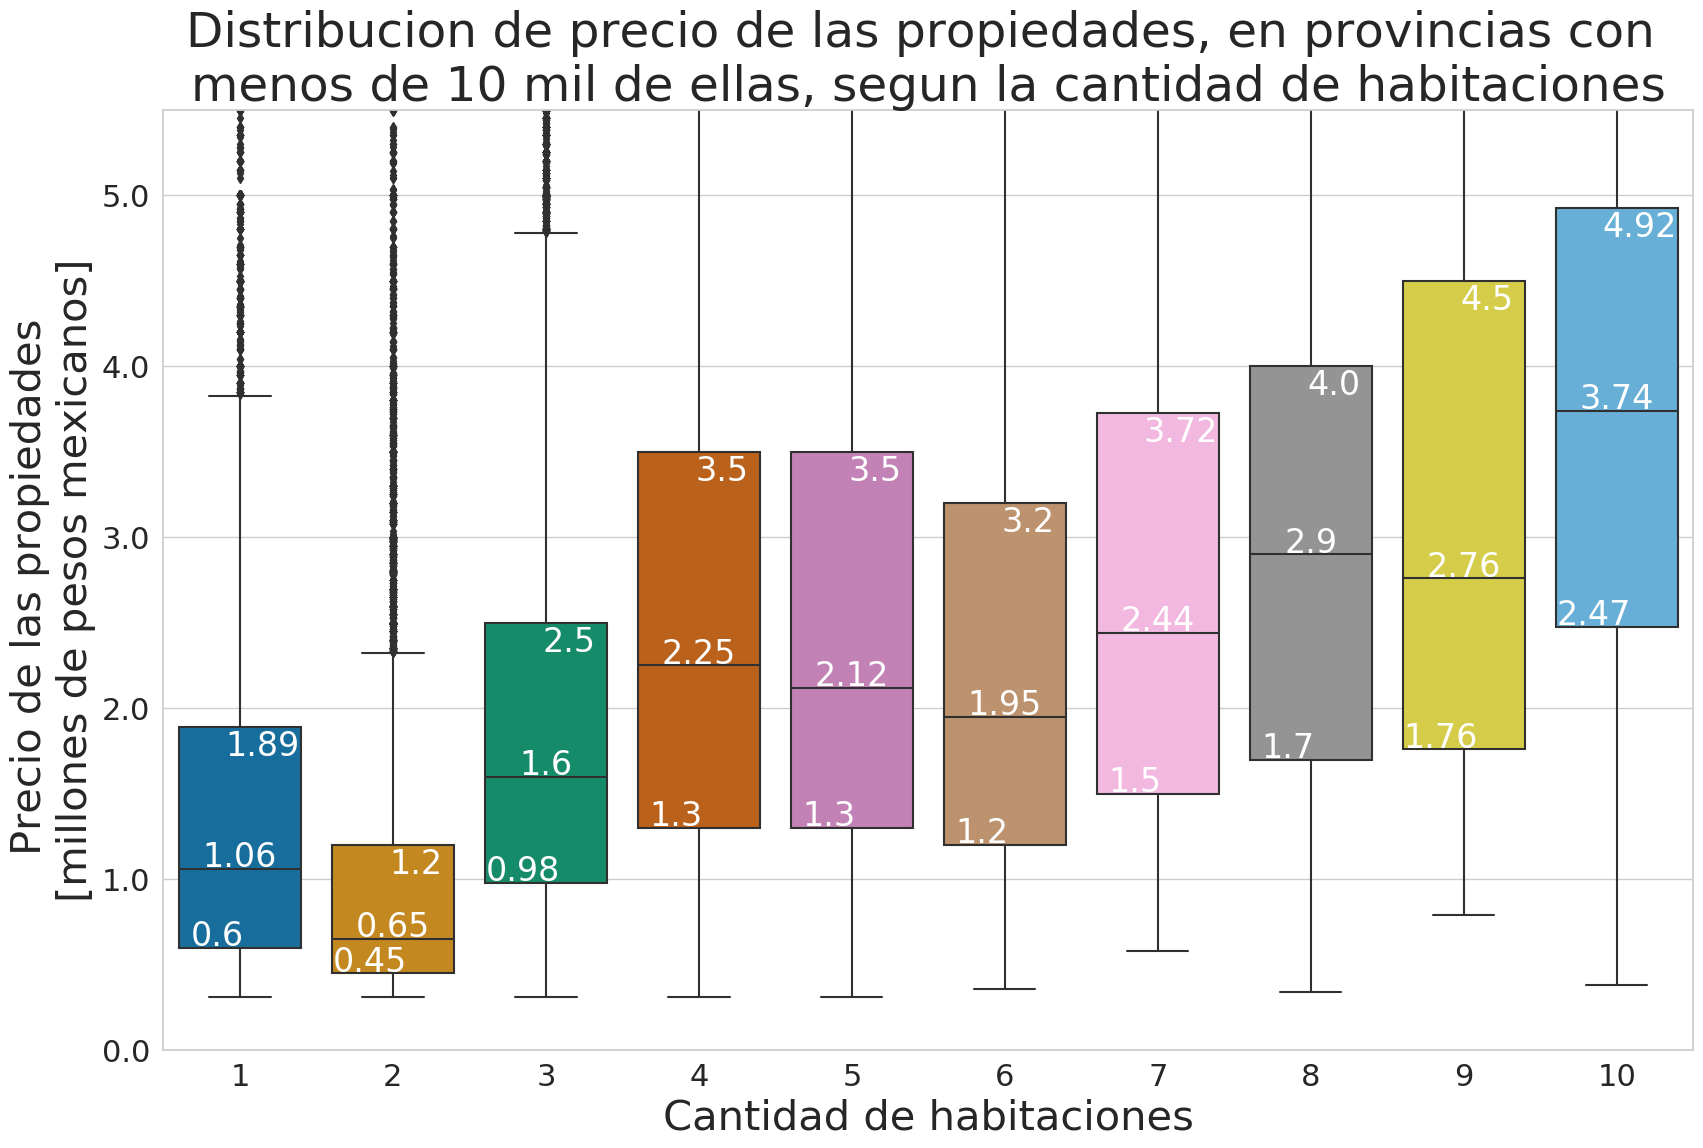

In [129]:
boxplot_prov_resto_precio_habitaciones = sns.boxplot(
                                                x = 'habitaciones',
                                                y = 'precio',
                                                data = prov_resto_habitaciones,
                                                palette = 'colorblind'
                                            )
common.setear_titulos_plot(
    boxplot_prov_resto_precio_habitaciones,
    'Distribucion de precio de las propiedades, en provincias con \n'+\
    'menos de 10 mil de ellas, segun la cantidad de habitaciones',
    'Cantidad de habitaciones',
    'Precio de las propiedades \n[millones de pesos mexicanos]'
)

boxplot_prov_resto_precio_habitaciones.set_ylim(0,5500000)
boxplot_prov_resto_precio_habitaciones.yaxis.set_major_formatter(
    FuncFormatter(lambda x, pos: "%0.1f" % (x*1e-6))
)

common.agregar_serie_plot(
    boxplot_prov_resto_precio_habitaciones,
    prov_resto_habitaciones_precio_estadist_millones['precio_cuantil_1'],
    prov_resto_habitaciones_precio_estadist['precio_cuantil_1'],
    'w',
    -0.15, 10000
)

common.agregar_serie_plot(
    boxplot_prov_resto_precio_habitaciones,
    prov_resto_habitaciones_precio_estadist_millones['precio_median'],
    prov_resto_habitaciones_precio_estadist['precio_median'],
    'w',
    0, 10000
)

common.agregar_serie_plot(
    boxplot_prov_resto_precio_habitaciones,
    prov_resto_habitaciones_precio_estadist_millones['precio_cuantil_3'],
    prov_resto_habitaciones_precio_estadist['precio_cuantil_3'],
    'w',
    0.15, -170000
)

fig_boxplot_prov_resto_precio_habitaciones =\
    boxplot_prov_resto_precio_habitaciones.get_figure()

plt.tight_layout()
#fig_boxplot_prov_resto_precio_habitaciones.savefig('./plots/boxplot_provincia_MENOS_10_mil_precio_habitaciones.png')
plt.show()

### En provincias con MENOS de 10 propiedades, ¿Como se distribuye el precio segun la cantidad de garages? 

In [47]:
prov_resto_garages = prov_resto.fillna(value = {'garages' : 0})
prov_resto_garages['garages'] = prov_resto_garages['garages'].astype(np.int8)
prov_resto_garages['garages'].dtype

dtype('int8')

In [48]:
prov_resto_garages_precios_estadist =\
    common.agrupar_calcular_estadisticas_desagrupar(prov_resto_garages, 'garages', 'precio')
prov_resto_garages_precios_estadist_millones = prov_resto_garages_precios_estadist.transform(lambda x: x*1e-6)
prov_resto_garages_precios_estadist_millones

garages     precio_cuantil_1        precio_median  \
0           0.00000000           0.75000000           1.39999998   
1           0.00000100           0.50000000           0.75000000   
2           0.00000200           1.04999995           1.67999995   
3           0.00000300           1.54999995           2.54699993   

      precio_cuantil_3  
0           2.57999992  
1           1.24899995  
2           2.50000000  
3           3.75000000

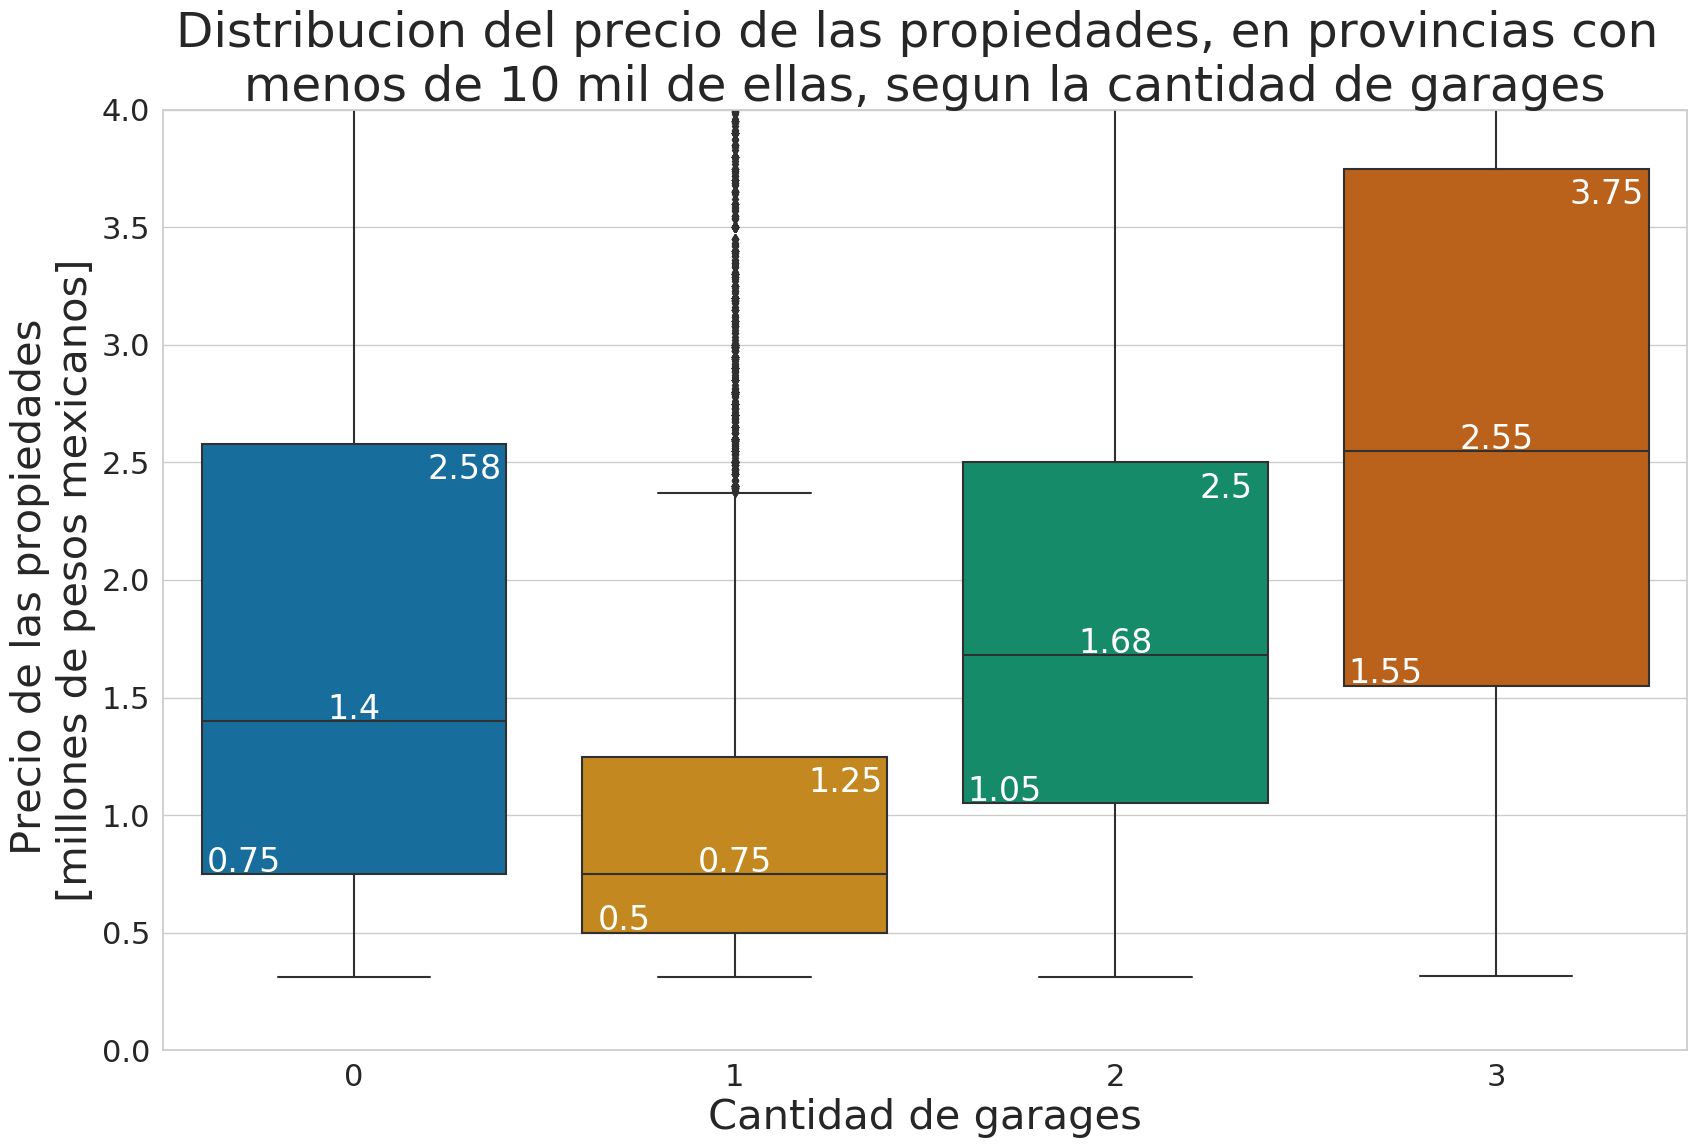

In [130]:
boxplot_prov_resto_precio_garages = sns.boxplot(
                                        x = 'garages',
                                        y = 'precio',
                                        data = prov_resto_garages,
                                        palette = 'colorblind'
                                    )
common.setear_titulos_plot(
    boxplot_prov_resto_precio_garages,
    'Distribucion del precio de las propiedades, en provincias con \n'+\
    'menos de 10 mil de ellas, segun la cantidad de garages',
    'Cantidad de garages',
    'Precio de las propiedades \n[millones de pesos mexicanos]'
)

boxplot_prov_resto_precio_garages.set_ylim(0,4000000)
boxplot_prov_resto_precio_garages.yaxis.set_major_formatter(
    FuncFormatter(lambda x, pos: "%0.1f" % (x*1e-6))
)

common.agregar_serie_plot(
    boxplot_prov_resto_precio_garages,
    prov_resto_garages_precios_estadist_millones['precio_cuantil_1'],
    prov_resto_garages_precios_estadist['precio_cuantil_1'],
    'w',
    -0.29, 10000
)

common.agregar_serie_plot(
    boxplot_prov_resto_precio_garages,
    prov_resto_garages_precios_estadist_millones['precio_median'],
    prov_resto_garages_precios_estadist['precio_median'],
    'w',
    0, 10000
)

common.agregar_serie_plot(
    boxplot_prov_resto_precio_garages,
    prov_resto_garages_precios_estadist_millones['precio_cuantil_3'],
    prov_resto_garages_precios_estadist['precio_cuantil_3'],
    'w',
    0.29, -150000
)

fig_boxplot_prov_resto_precio_garages =\
    boxplot_prov_resto_precio_garages.get_figure()

plt.tight_layout()
#fig_boxplot_prov_resto_precio_garages.savefig('./figs/boxplot_provincias_MENOS_10_mil_precio_garages.png')
plt.show()

### En las provincias con MENOS de 10 mil propiedades, ¿Como se distribuye el precio segun la presencia de servicios cercanos? 

In [50]:
prov_resto['escuelascercanas'].isnull().sum()

0

In [51]:
prov_resto['centroscomercialescercanos'].isnull().sum()

0

In [52]:
prov_resto_cosas_cercanas = prov_resto[['escuelascercanas', 'centroscomercialescercanos', 'precio']].copy()
prov_resto_cosas_cercanas['cosas_cercanas'] =\
    prov_resto_cosas_cercanas.apply(lambda fila: etiquetar_cosas_cercanas(fila), axis = 1) 
prov_resto_cosas_cercanas['orden_cercanas'] =\
    prov_resto_cosas_cercanas['cosas_cercanas'].transform(lambda x: x[0])
prov_resto_cosas_cercanas['valores_cercanas'] =\
    prov_resto_cosas_cercanas['cosas_cercanas'].transform(lambda x: x[1])
prov_resto_cosas_cercanas.sort_values(by = ['orden_cercanas'], inplace = True)
prov_resto_cosas_cercanas

escuelascercanas  centroscomercialescercanos               precio  \
37738             False                       False   2,990,000.00000000   
43820             False                       False     360,000.00000000   
43824             False                       False   2,200,000.00000000   
43825             False                       False     580,000.00000000   
43826             False                       False     430,000.00000000   
43827             False                       False     380,000.00000000   
43830             False                       False     360,000.00000000   
43832             False                       False     638,000.00000000   
43835             False                       False     490,000.00000000   
43836             False                       False   3,456,789.00000000   
43837             False                       False     860,000.00000000   
43839             False                       False     850,000.00000000   
43841             False                       False   1,700,000.00000000   
43844             False                       False     405,000.00000000   
43846             False                       False   1,100,000.00000000   
43847             False                       False     345,000.00000000   
43849             False                       False     495,000.00000000   
43854             False                       False     380,000.00000000   
43856             False                       False     450,000.00000000   
43857             False                       False     902,330.00000000   
43858             False                       False     399,000.00000000   
43859             False                       False   2,312,000.00000000   
43861             False                       False   1,700,000.00000000   
43863             False                       False     780,000.00000000   
43817             False                       False   1,800,000.00000000   
43865             False                       False   1,800,000.00000000   
43816             False                       False     503,250.00000000   
43812             False                       False     350,000.00000000   
43757             False                       False     360,000.00000000   
43759             False                       False     400,000.00000000   
...                 ...                         ...                  ...   
49116              True                        True   1,650,000.00000000   
49119              True                        True   1,650,000.00000000   
49183              True                        True   1,350,000.00000000   
15170              True                        True     380,000.00000000   
49177              True                        True   3,500,000.00000000   
49176              True                        True   1,900,000.00000000   
49175              True                        True     470,000.00000000   
49173              True                        True   1,680,000.00000000   
15174              True                        True     495,000.00000000   
49167              True                        True     439,000.00000000   
49163              True                        True     405,000.00000000   
15176              True                        True   2,350,000.00000000   
49150              True                        True   3,500,000.00000000   
15184              True                        True   1,800,000.00000000   
49190              True                        True   1,990,000.00000000   
49147              True                        True   1,750,000.00000000   
49145              True                        True   4,199,000.00000000   
15186              True                        True   1,260,000.00000000   
15188              True                        True     780,000.00000000   
49140              True                        True     405,000.00000000   
49137              True                        True    

In [53]:
prov_resto_cosas_cercanas_precio_estadist =\
    common.agrupar_calcular_estadisticas_desagrupar(prov_resto_cosas_cercanas, 'cosas_cercanas','precio')
prov_resto_cosas_cercanas_precio_estadist_millones =\
    prov_resto_cosas_cercanas_precio_estadist.transform(lambda x: x*1e-6 if x.dtype == np.float32 else x) 
prov_resto_cosas_cercanas_precio_estadist_millones

cosas_cercanas     precio_cuantil_1  \
0                         (0, Ninguno)           0.75979197   
1                   (1, Solo escuelas)           0.75000000   
2        (2, Solo centros comerciales)           0.89999998   
3  (3, Escuelas y centros comerciales)           0.71999997   

         precio_median     precio_cuantil_3  
0           1.39999998           2.40000010  
1           1.35000002           2.27999997  
2           1.70000005           2.99974990  
3           1.35000002           2.29999995

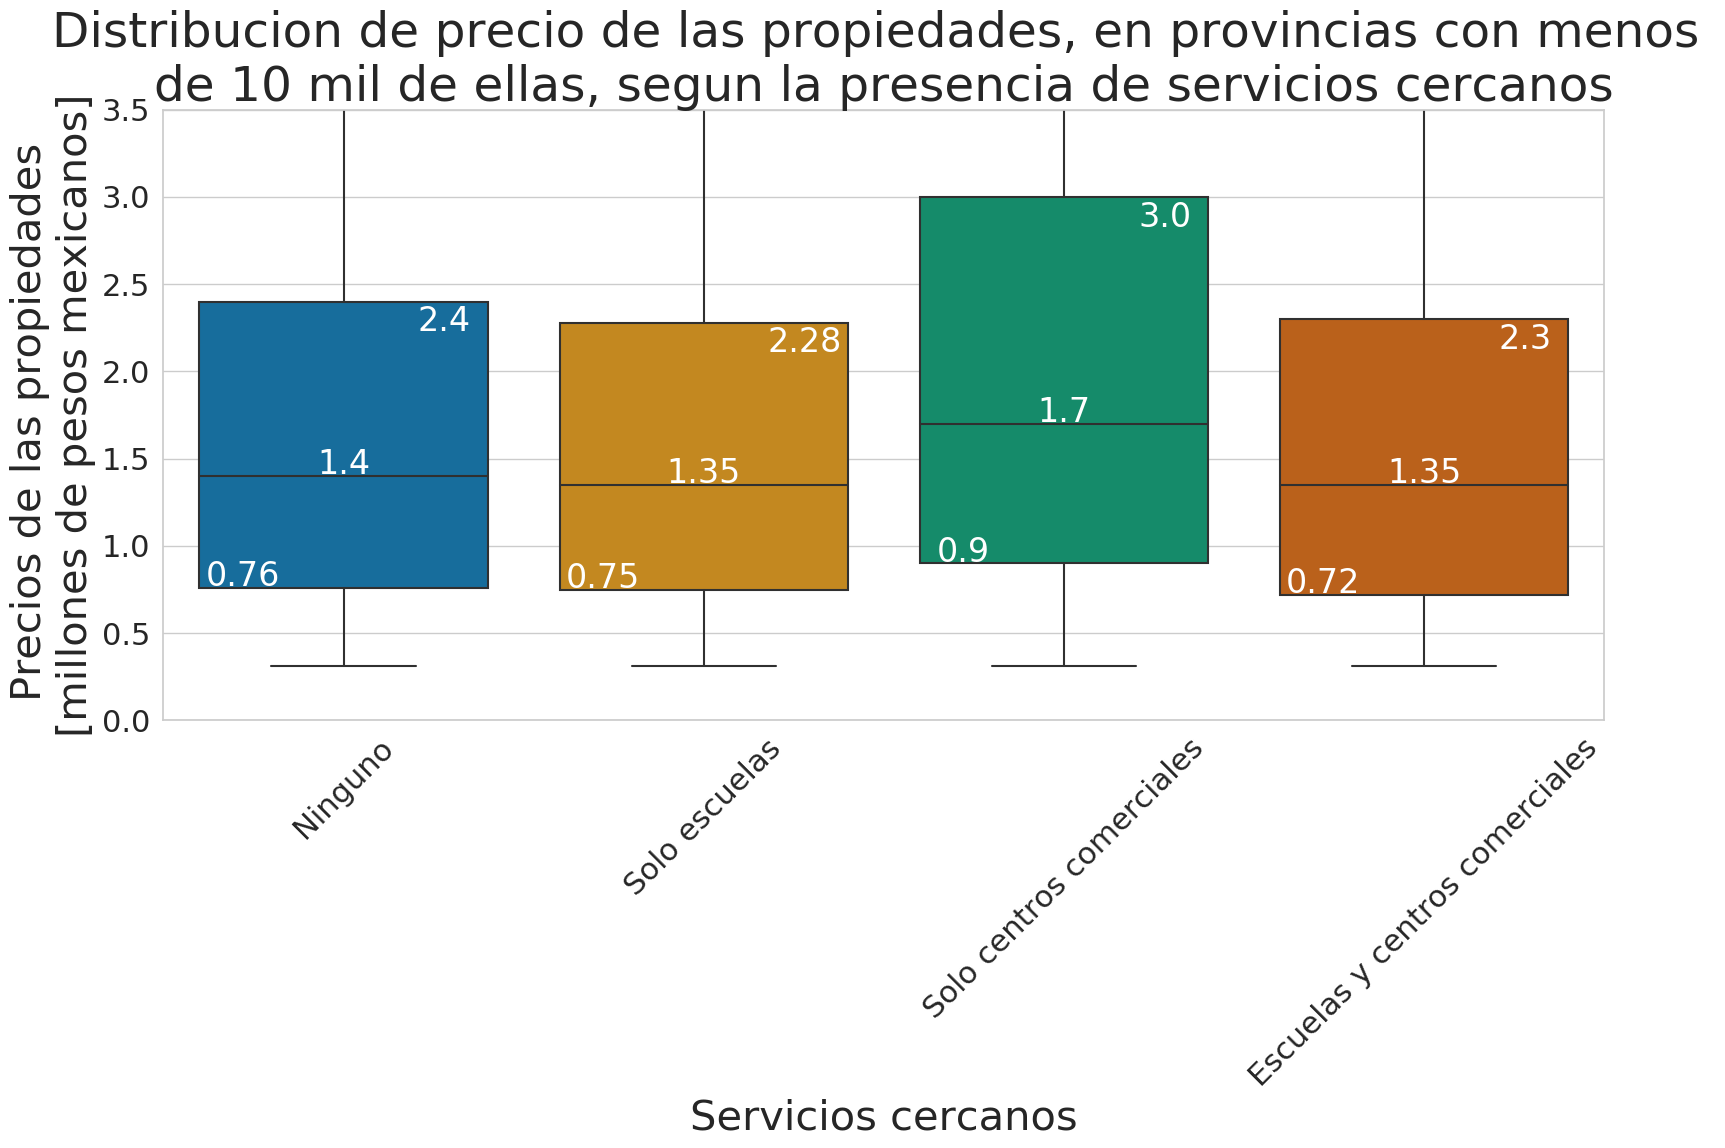

In [131]:
boxplot_prov_resto_precio_cosas_cercanas = sns.boxplot(
                                                x = 'valores_cercanas',
                                                y = 'precio',
                                                data = prov_resto_cosas_cercanas,
                                                palette = 'colorblind'
                                            )
common.setear_titulos_plot(
    boxplot_prov_resto_precio_cosas_cercanas,
    'Distribucion de precio de las propiedades, en provincias con menos \n'+\
    'de 10 mil de ellas, segun la presencia de servicios cercanos',
    'Servicios cercanos',
    'Precios de las propiedades \n[millones de pesos mexicanos]'
)

boxplot_prov_resto_precio_cosas_cercanas.set_xticklabels(
    boxplot_prov_resto_precio_cosas_cercanas.get_xticklabels(),
    rotation = 45
)

boxplot_prov_resto_precio_cosas_cercanas.set_ylim(0,3500000)
boxplot_prov_resto_precio_cosas_cercanas.yaxis.set_major_formatter(
    FuncFormatter(lambda x, pos: "%0.1f" % (x*1e-6))
)

common.agregar_serie_plot(
    boxplot_prov_resto_precio_cosas_cercanas,
    prov_resto_cosas_cercanas_precio_estadist_millones['precio_cuantil_1'],
    prov_resto_cosas_cercanas_precio_estadist['precio_cuantil_1'],
    'w',
    -0.28, 10000
)

common.agregar_serie_plot(
    boxplot_prov_resto_precio_cosas_cercanas,
    prov_resto_cosas_cercanas_precio_estadist_millones['precio_median'],
    prov_resto_cosas_cercanas_precio_estadist['precio_median'],
    'w',
    0, 10000
)

common.agregar_serie_plot(
    boxplot_prov_resto_precio_cosas_cercanas,
    prov_resto_cosas_cercanas_precio_estadist_millones['precio_cuantil_3'],
    prov_resto_cosas_cercanas_precio_estadist['precio_cuantil_3'],
    'w',
    0.28, -170000
)

fig_boxplot_prov_resto_precio_cosas_cercanas =\
    boxplot_prov_resto_precio_cosas_cercanas.get_figure()

plt.tight_layout()
#fig_boxplot_prov_resto_precio_cosas_cercanas.savefig('./plots/boxplot_provincias_MENOS_10_mil_precio_servicios_cercanos.png')
plt.show()

### En provincias con menos de 10 propiedades, ¿Como se distribuye el precio segun la presencia de gimnasio, usosmultiples y piscina? 

In [55]:
prov_resto['gimnasio'].isnull().sum()

0

In [56]:
prov_resto['usosmultiples'].isnull().sum()

0

In [57]:
prov_resto['piscina'].isnull().sum()

0

In [58]:
prov_resto_extras = prov_resto[['gimnasio', 'usosmultiples', 'piscina', 'precio']].copy()
prov_resto_extras['extras'] = prov_resto_extras.apply(lambda fila: etiquetar_extras(fila), axis = 1)
prov_resto_extras['orden_extras'] =\
    prov_resto_extras['extras'].transform(lambda valor: valor[0])
prov_resto_extras['valores_extras'] =\
    prov_resto_extras['extras'].transform(lambda valor: valor[1])
prov_resto_extras.sort_values(by = ['orden_extras'], inplace = True)
prov_resto_extras

gimnasio  usosmultiples  piscina               precio  \
0         False          False    False     488,000.00000000   
48078     False          False    False     750,000.00000000   
48079     False          False    False     980,000.00000000   
48080     False          False    False   1,400,000.00000000   
48081     False          False    False   2,350,000.00000000   
48082     False          False    False   2,510,000.00000000   
48083     False          False    False   2,200,000.00000000   
48084     False          False    False     850,000.00000000   
48085     False          False    False   9,150,000.00000000   
48086     False          False    False   1,500,000.00000000   
48087     False          False    False   4,200,000.00000000   
48088     False          False    False   1,350,000.00000000   
48090     False          False    False   2,790,000.00000000   
48091     False          False    False     450,000.00000000   
48092     False          False    False     360,000.00000000   
48077     False          False    False     330,000.00000000   
48093     False          False    False   2,450,000.00000000   
48095     False          False    False   1,353,000.00000000   
48096     False          False    False     590,000.00000000   
48097     False          False    False   1,400,000.00000000   
48098     False          False    False     400,000.00000000   
48099     False          False    False     980,000.00000000   
48100     False          False    False     995,000.00000000   
48101     False          False    False     375,000.00000000   
48102     False          False    False     530,000.00000000   
48103     False          False    False     510,000.00000000   
48104     False          False    False     650,000.00000000   
48105     False          False    False   1,600,000.00000000   
48106     False          False    False     580,000.00000000   
48107     False          False    False     920,000.00000000   
...         ...            ...      ...                  ...   
33619      True           True     True   3,933,475.00000000   
66448      True           True     True   2,700,000.00000000   
15433      True           True     True   3,500,000.00000000   
54108      True           True     True  11,712,602.00000000   
30227      True           True     True   1,850,000.00000000   
52638      True           True     True   3,875,600.00000000   
66439      True           True     True   6,000,000.00000000   
52636      True           True     True   2,850,000.00000000   
52635      True           True     True   5,999,500.00000000   
30230      True           True     True   4,200,000.00000000   
30238      True           True     True   3,100,000.00000000   
66433      True           True     True   2,100,000.00000000   
30290      True           True     True   3,500,000.00000000   
54127      True           True     True   5,800,000.00000000   
54134      True           True     True   5,500,000.00000000   
54136      True           True     True   2,999,500.00000000   
30266      True           True     True   1,500,000.00000000   
52621      True           True     True   5,800,000.00000000   
54141      True           True     True   3,750,000.00000000   
33582      True           True     True   6,000,000.00000000   
52617      True           True     True   6,900,263.00000000   
30279      True           True     True   2,650,000.00000000   
15520      True           True     True   1,970,000.00000000   
52613      True           True     True   4,295,000.00000000   
52612      True           True     True   2,300,000.00000000   
23054      True           True     True   1,980,000.00000000   
33575      True           True     True   2,920,000.00000000   
43641      True           True     True   1,175,000.00000000   
23095      True           True     True   2,450,000.00000000   
30527      True           True     True   1,980,000.00000000   

                                      

In [59]:
prov_resto_extras_precio = common.agrupar_calcular_estadisticas_desagrupar(prov_resto_extras, 'extras', 'precio')
prov_resto_extras_precio_millones = prov_resto_extras_precio.transform(lambda x: x*1e-6 if x.dtype == np.float32 else x)
prov_resto_extras_precio_millones

extras     precio_cuantil_1  \
0                                 (0, Ninguno)           0.69999999   
1                            (1, Solo Piscina)           1.28999996   
2                   (2, Solo Usos \nMultiples)           1.14999998   
3                           (3, Solo Gimnasio)           0.94999999   
4               (4, Solo Gimnasio \ny Piscina)           1.79999995   
5       (5, Solo Usos \nMultiples \ny Piscina)           1.25000000   
6      (6, Solo Gimnasio \ny Usos \nMultiples)           1.18174994   
7  (7, Gimnasio, \nUsos Multiples \ny Piscina)           1.95000005   

         precio_median     precio_cuantil_3  
0           1.28040504           2.19899988  
1           2.04749990           3.20000005  
2           1.95000005           3.20000005  
3           1.59000003           2.45000005  
4           2.78500009           4.09999990  
5           1.86000001           3.00000000  
6           1.92250001           2.86249995  
7           2.99950004           4.98000002

In [132]:
boxplot_prov_resto_precio_extras = sns.boxplot(
                                        x = 'valores_extras',
                                        y = 'precio',
                                        data = prov_resto_extras,
                                        palette = 'colorblind'
                                    )

common.setear_titulos_plot(
    boxplot_prov_resto_precio_extras,
    'Distribucion de precio de las propiedades, en las provincias \n'+\
    'con menos de 10 mil de ellas, segun la presencias de \n'+\
    'gimnasio, usos multiples y piscina',
    'Extras de la propiedad',
    'Precio de las propiedades \n[millones de pesos mexicanos]'
)
boxplot_prov_resto_precio_extras.set_xticklabels(
    boxplot_prov_resto_precio_extras.get_xticklabels(),
    rotation = 45
)

boxplot_prov_resto_precio_extras.set_ylim(0, 5500000)
boxplot_prov_resto_precio_extras.yaxis.set_major_formatter(
    FuncFormatter(lambda x, pos: "%0.1f" % (x*1e-6))
)

common.agregar_serie_plot(
    boxplot_prov_resto_precio_extras,
    prov_resto_extras_precio_millones['precio_cuantil_1'],
    prov_resto_extras_precio['precio_cuantil_1'],
    'w',
    -0.2, 25000
)

common.agregar_serie_plot(
    boxplot_prov_resto_precio_extras,
    prov_resto_extras_precio_millones['precio_median'],
    prov_resto_extras_precio['precio_median'],
    'w',
    0, 25000
)

common.agregar_serie_plot(
    boxplot_prov_resto_precio_extras,
    prov_resto_extras_precio_millones['precio_cuantil_3'],
    prov_resto_extras_precio['precio_cuantil_3'],
    'w',
    0.2, -250000
)

fig_boxplot_prov_resto_precio_extras =\
    boxplot_prov_resto_precio_extras.get_figure()

plt.tight_layout()
#fig_boxplot_prov_resto_precio_extras.savefig('./figs/boxplot_provincia_MENOS_10_mil_precio_extras.png')
plt.show()

### En las provincias con MENOS  de 10 mil propiedades, ¿Como varia el precio segun los metroscubiertos? 

In [61]:
prov_resto_metroscubiertos = prov_resto.dropna(subset = ['metroscubiertos'])
prov_resto_metroscubiertos['metroscubiertos'].isnull().sum()

0

## Operacion lenta, solo ejecutar cuando sea necesario 

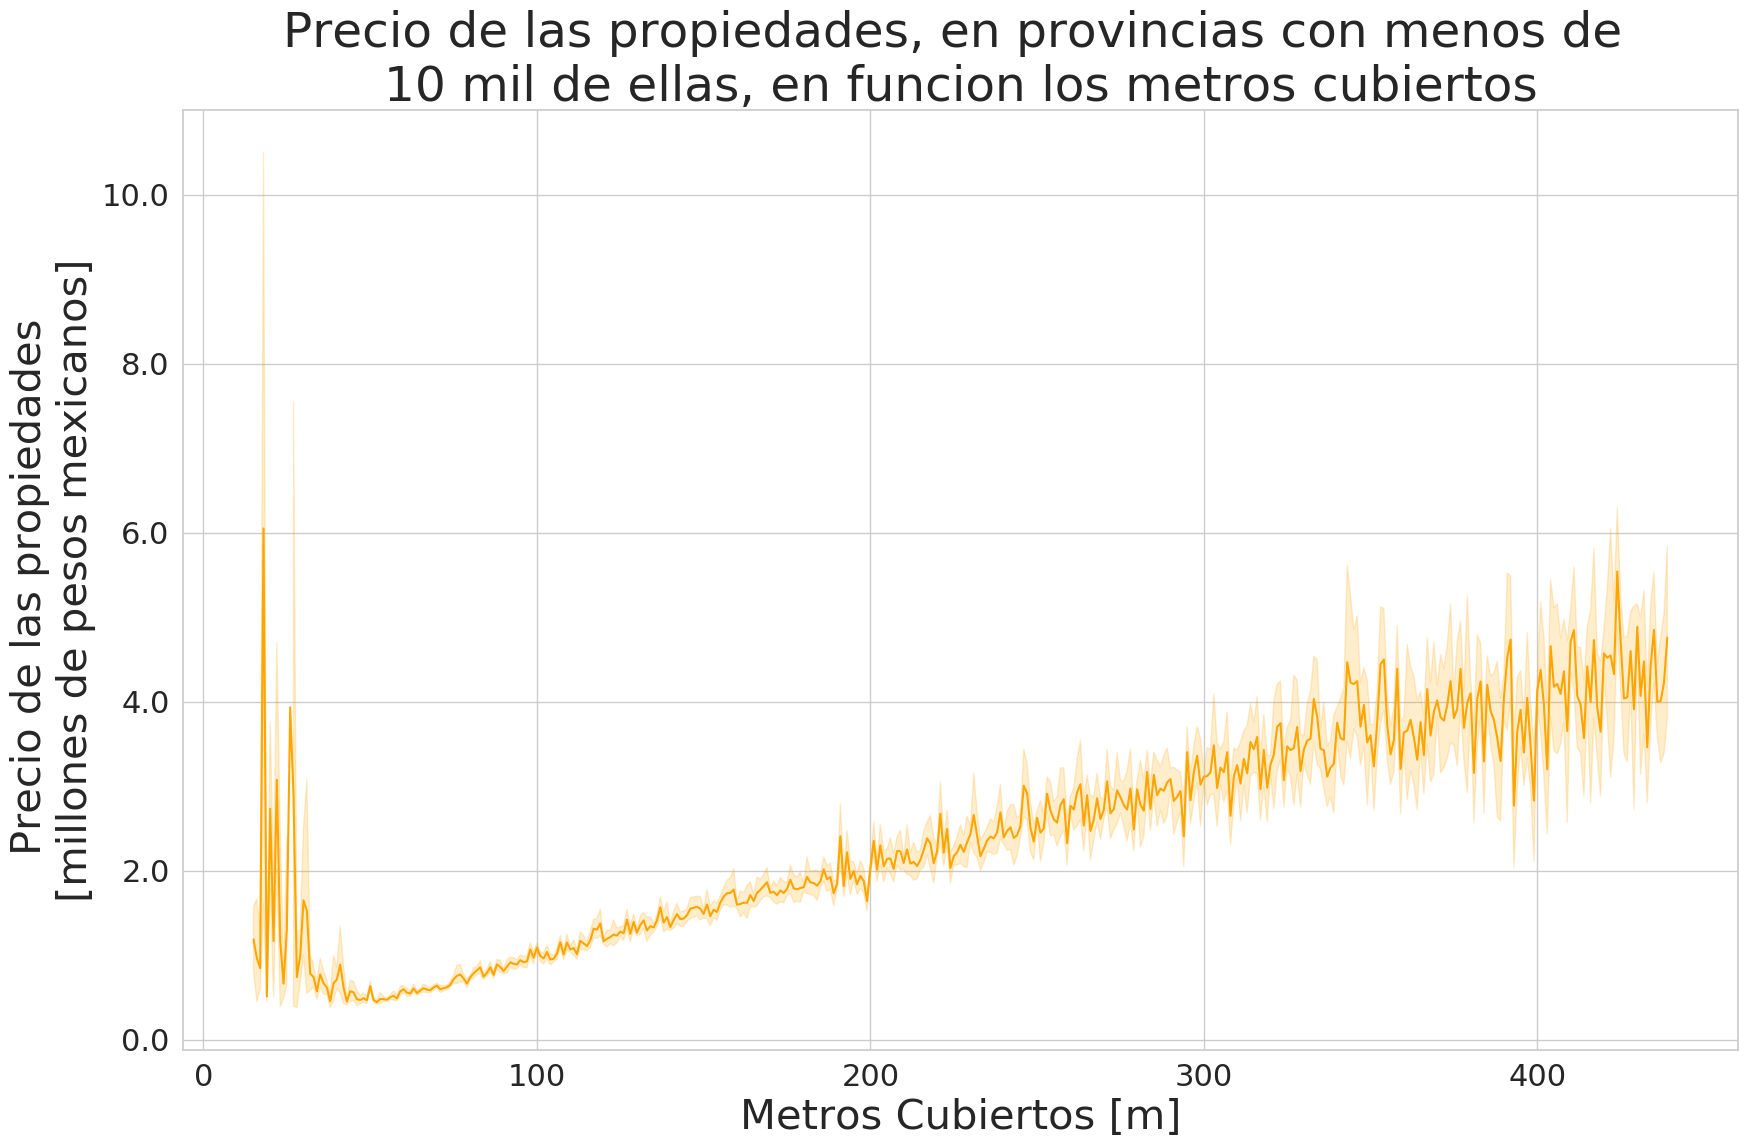

In [133]:
lineplot_prov_resto_precio_metroscubiertos = sns.lineplot(
                                                    x = 'metroscubiertos',
                                                    y = 'precio',
                                                    data = prov_resto_metroscubiertos,
                                                    color = 'orange'
                                                )
common.setear_titulos_plot(
    lineplot_prov_resto_precio_metroscubiertos,
    'Precio de las propiedades, en provincias con menos de \n'+\
    '10 mil de ellas, en funcion los metros cubiertos',
    'Metros Cubiertos [m]',
    'Precio de las propiedades \n[millones de pesos mexicanos]'
)

lineplot_prov_resto_precio_metroscubiertos.yaxis.set_major_formatter(
    FuncFormatter(lambda x, pos: "%0.1f" % (x*1e-6))
)

fig_lineplot_prov_resto_precio_metroscubiertos =\
    lineplot_prov_resto_precio_metroscubiertos.get_figure()

plt.tight_layout()
#fig_lineplot_prov_resto_precio_metroscubiertos.savefig('./figs/lineplot_provincia_MENOS_10_mil_precio_metroscubiertos.png')
plt.show()

### En provincias con menos de 10 mil propiedades, ¿Como se distribuye el precio, segun la antiguedad? 

In [62]:
prov_resto_antiguedad = prov_resto.dropna(subset = ['antiguedad']).copy()
prov_resto_antiguedad['antiguedad'] = prov_resto_antiguedad['antiguedad'].astype(np.int16)
prov_resto_antiguedad['antiguedad'].dtype

dtype('int16')

In [134]:
prov_resto_antiguedad['bucket_antiguedad'] = prov_resto_antiguedad['antiguedad'].transform(lambda x: etiquetar_bucket_antiguedad(x))
prov_resto_antiguedad['bucket_antiguedad']

0          0-5
1          0-5
3          0-5
7          0-5
10         0-5
11         0-5
19         0-5
26         0-5
27         0-5
28       10-15
29         0-5
32        5-10
35         0-5
37         0-5
39         0-5
42         0-5
43       20-25
44         0-5
46         0-5
47         0-5
49       10-15
51         0-5
52         0-5
53         0-5
55         0-5
57         0-5
59         0-5
63         0-5
67         0-5
69         0-5
         ...  
75441    20-25
75442      0-5
75443      0-5
75444      0-5
75446      0-5
75447      0-5
75450      0-5
75451    10-15
75452      0-5
75453     5-10
75454    10-15
75455      0-5
75457     5-10
75459    10-15
75460      0-5
75461      0-5
75462    10-15
75463    10-15
75464      0-5
75465      0-5
75466    15-20
75467      0-5
75468    10-15
75469      0-5
75470      0-5
75471      0-5
75473     5-10
75474    20-25
75475    10-15
75476    10-15
Name: bucket_antiguedad, Length: 56461, dtype: object

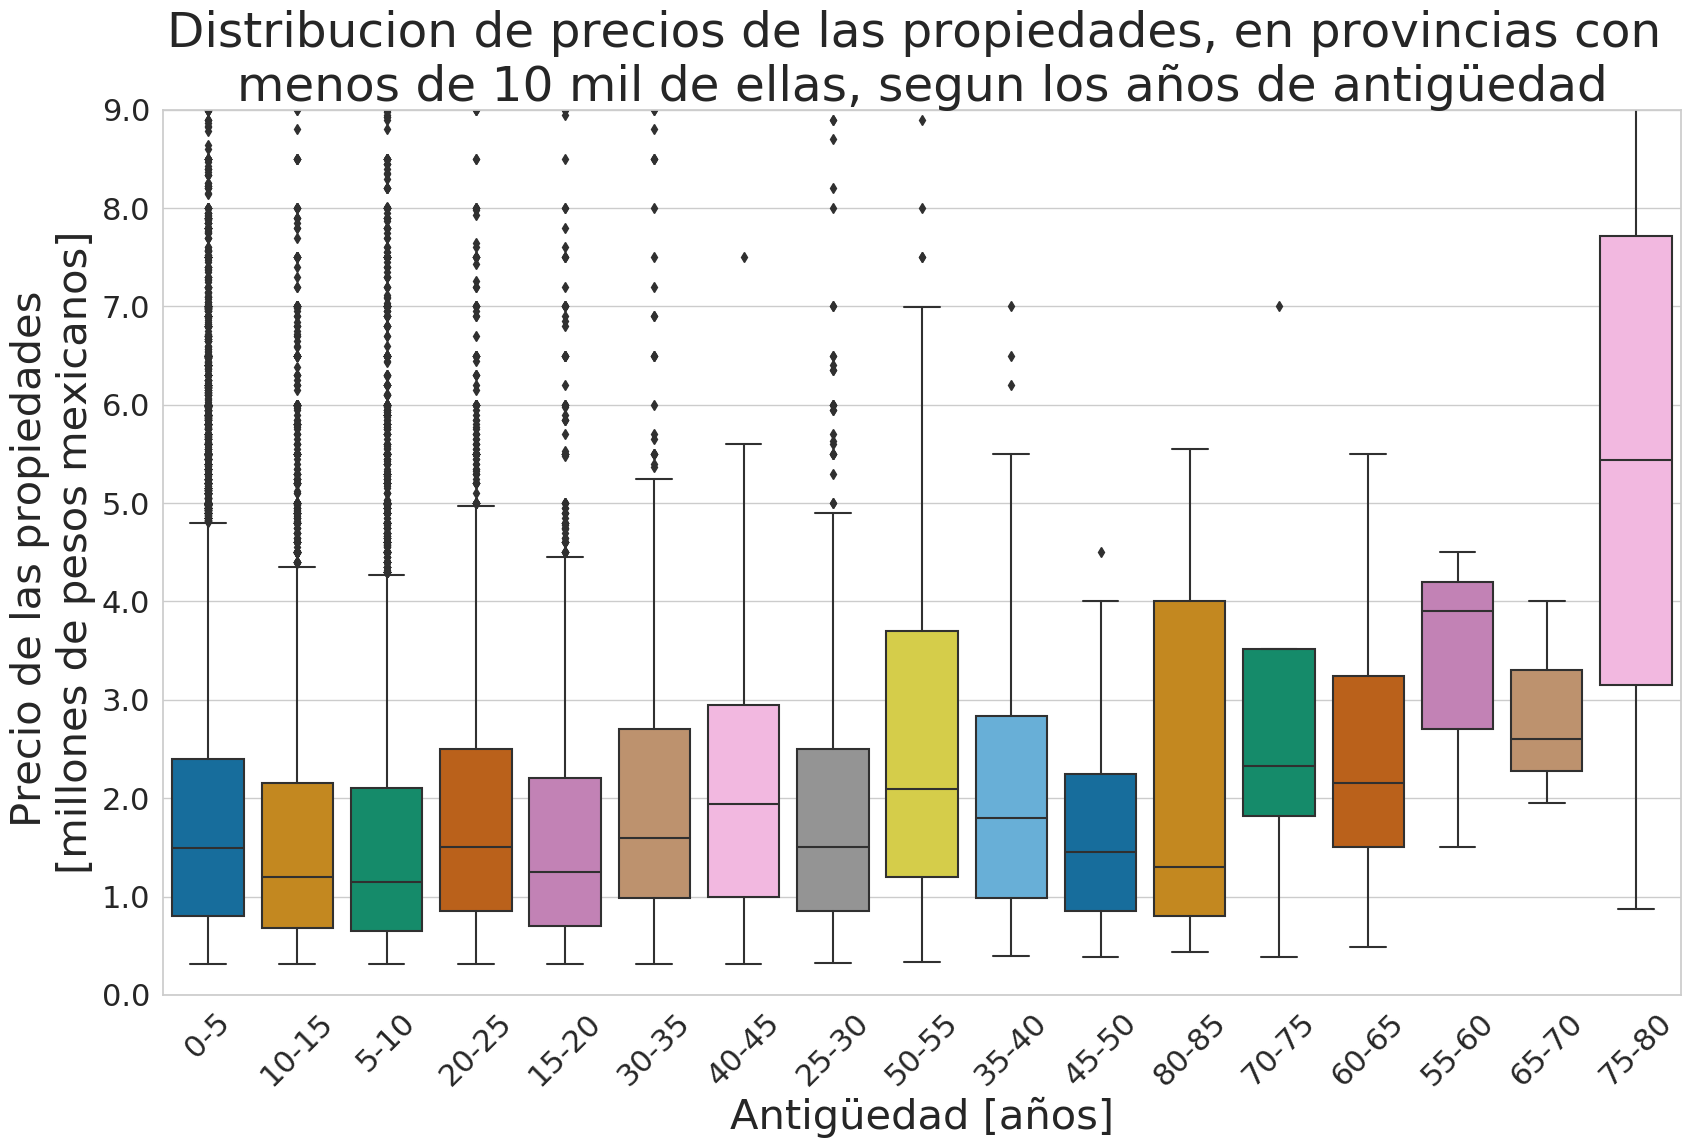

In [139]:
boxplot_prov_resto_precio_antiguedad_bucket = sns.boxplot(
                                            x = 'bucket_antiguedad',
                                            y = 'precio',
                                            data = prov_resto_antiguedad,
                                            palette = 'colorblind'
                                        )

common.setear_titulos_plot(
    boxplot_prov_resto_precio_antiguedad_bucket,
    'Distribucion de precios de las propiedades, en provincias con \n'+\
    'menos de 10 mil de ellas, segun los años de antigüedad',
    'Antigüedad [años]',
    'Precio de las propiedades \n[millones de pesos mexicanos]'
)

boxplot_prov_resto_precio_antiguedad_bucket.set_xticklabels(
    boxplot_prov_resto_precio_antiguedad_bucket.get_xticklabels(),
    rotation = 45
)

boxplot_prov_resto_precio_antiguedad_bucket.yaxis.set_major_formatter(
    FuncFormatter(lambda x, pos: "%0.1f" % (x*1e-6))
)

boxplot_prov_resto_precio_antiguedad_bucket.set_ylim(0,9000000)

fig_boxplot_prov_resto_precio_antiguedad_bucket =\
    boxplot_prov_resto_precio_antiguedad_bucket.get_figure()

plt.tight_layout()
#fig_boxplot_prov_resto_precio_antiguedad_bucket.savefig('./figs/boxplot_provincia_MENOS_10_mil_precio_antiguedad.png')
plt.show()

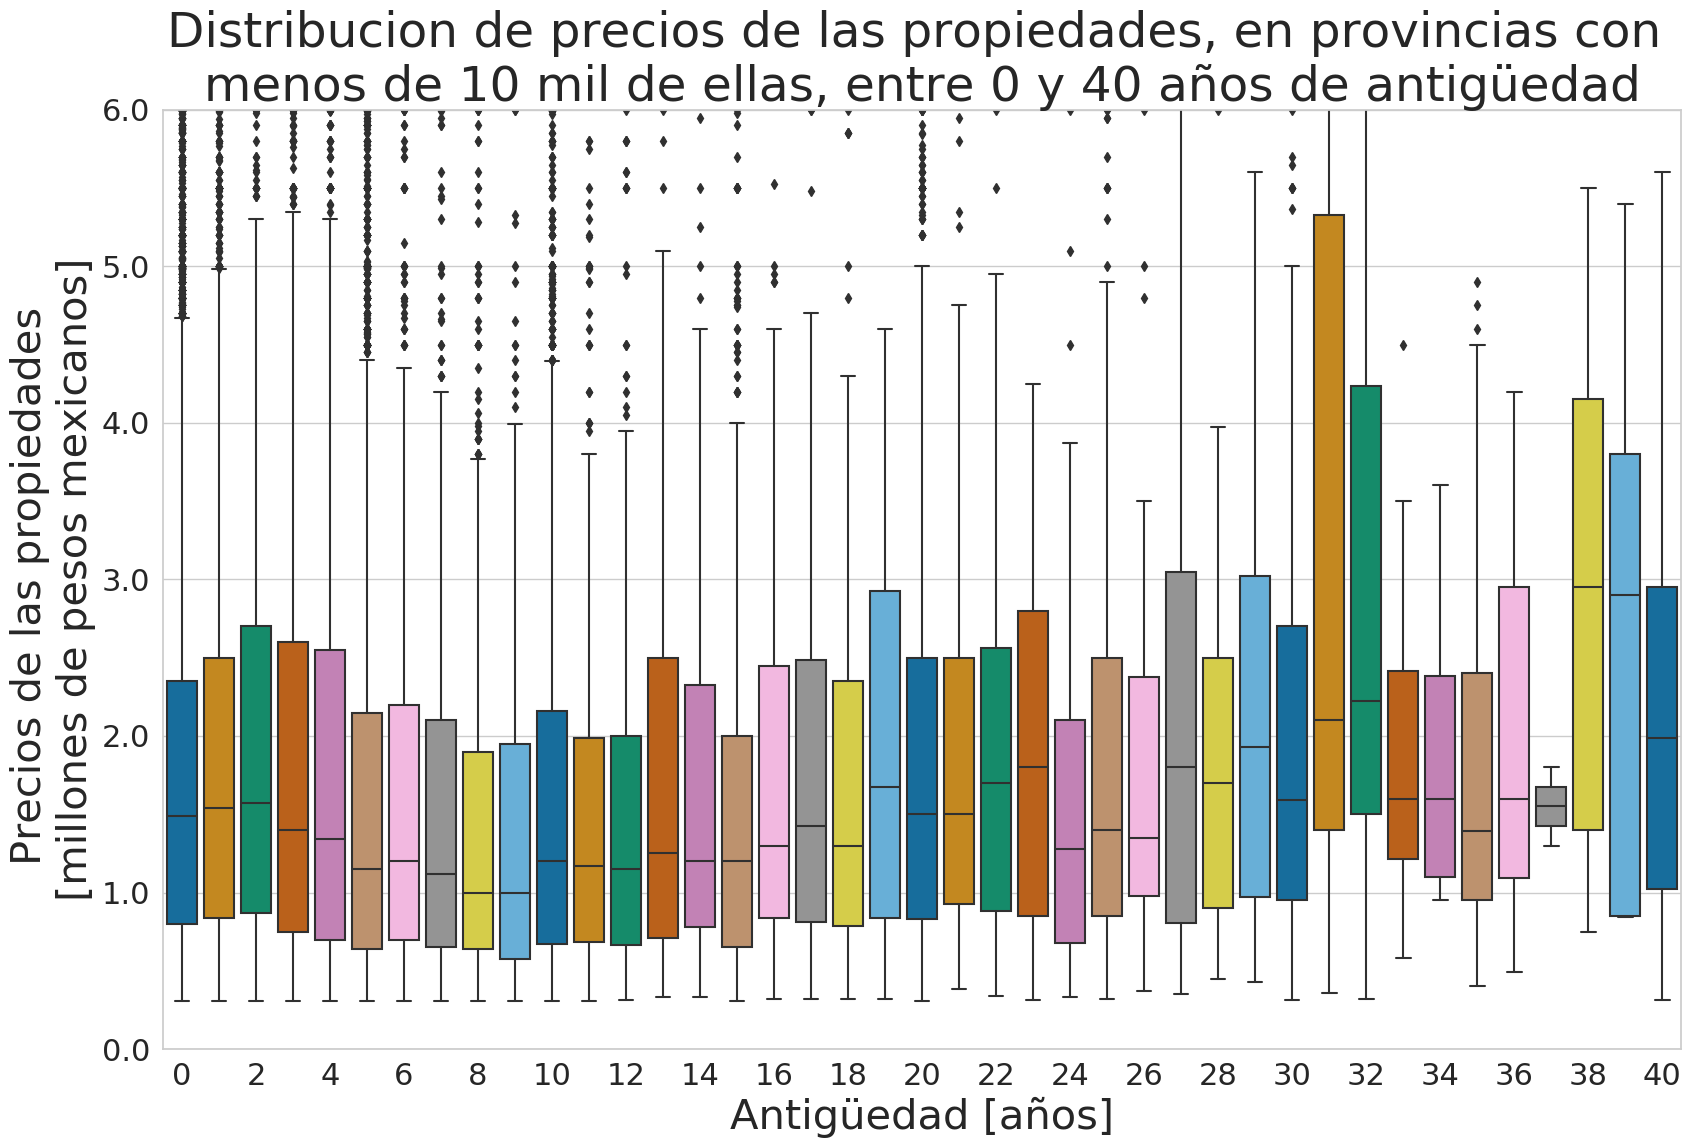

In [63]:
boxplot_prov_resto_precio_antiguedad_menos_40 = sns.boxplot(
                                            x = 'antiguedad',
                                            y = 'precio',
                                            data = prov_resto_antiguedad.loc[prov_resto_antiguedad['antiguedad'] <= 40],
                                            palette = 'colorblind'
                                        )

common.setear_titulos_plot(
    boxplot_prov_resto_precio_antiguedad_menos_40,
    'Distribucion de precios de las propiedades, en provincias con \n'+\
    'menos de 10 mil de ellas, entre 0 y 40 años de antigüedad',
    'Antigüedad [años]',
    'Precios de las propiedades \n[millones de pesos mexicanos]'
)

boxplot_prov_resto_precio_antiguedad_menos_40_xticklabels = boxplot_prov_resto_precio_antiguedad_menos_40.get_xticklabels()

for i in range(len(boxplot_prov_resto_precio_antiguedad_menos_40_xticklabels)):
    if (i % 2 != 0):
        boxplot_prov_resto_precio_antiguedad_menos_40_xticklabels[i].set_visible(False)

boxplot_prov_resto_precio_antiguedad_menos_40.yaxis.set_major_formatter(
    FuncFormatter(lambda x, pos: "%0.1f" % (x*1e-6))
)

boxplot_prov_resto_precio_antiguedad_menos_40.set_ylim(0,6000000)

fig_boxplot_prov_resto_precio_antiguedad_menos_40 =\
    boxplot_prov_resto_precio_antiguedad_menos_40.get_figure()

plt.tight_layout()
#fig_boxplot_prov_resto_precio_antiguedad_menos_40.savefig('./figs/boxplot_provincia_MENOS_10_mil_precio_antiguedad_menos_40.png')
plt.show()

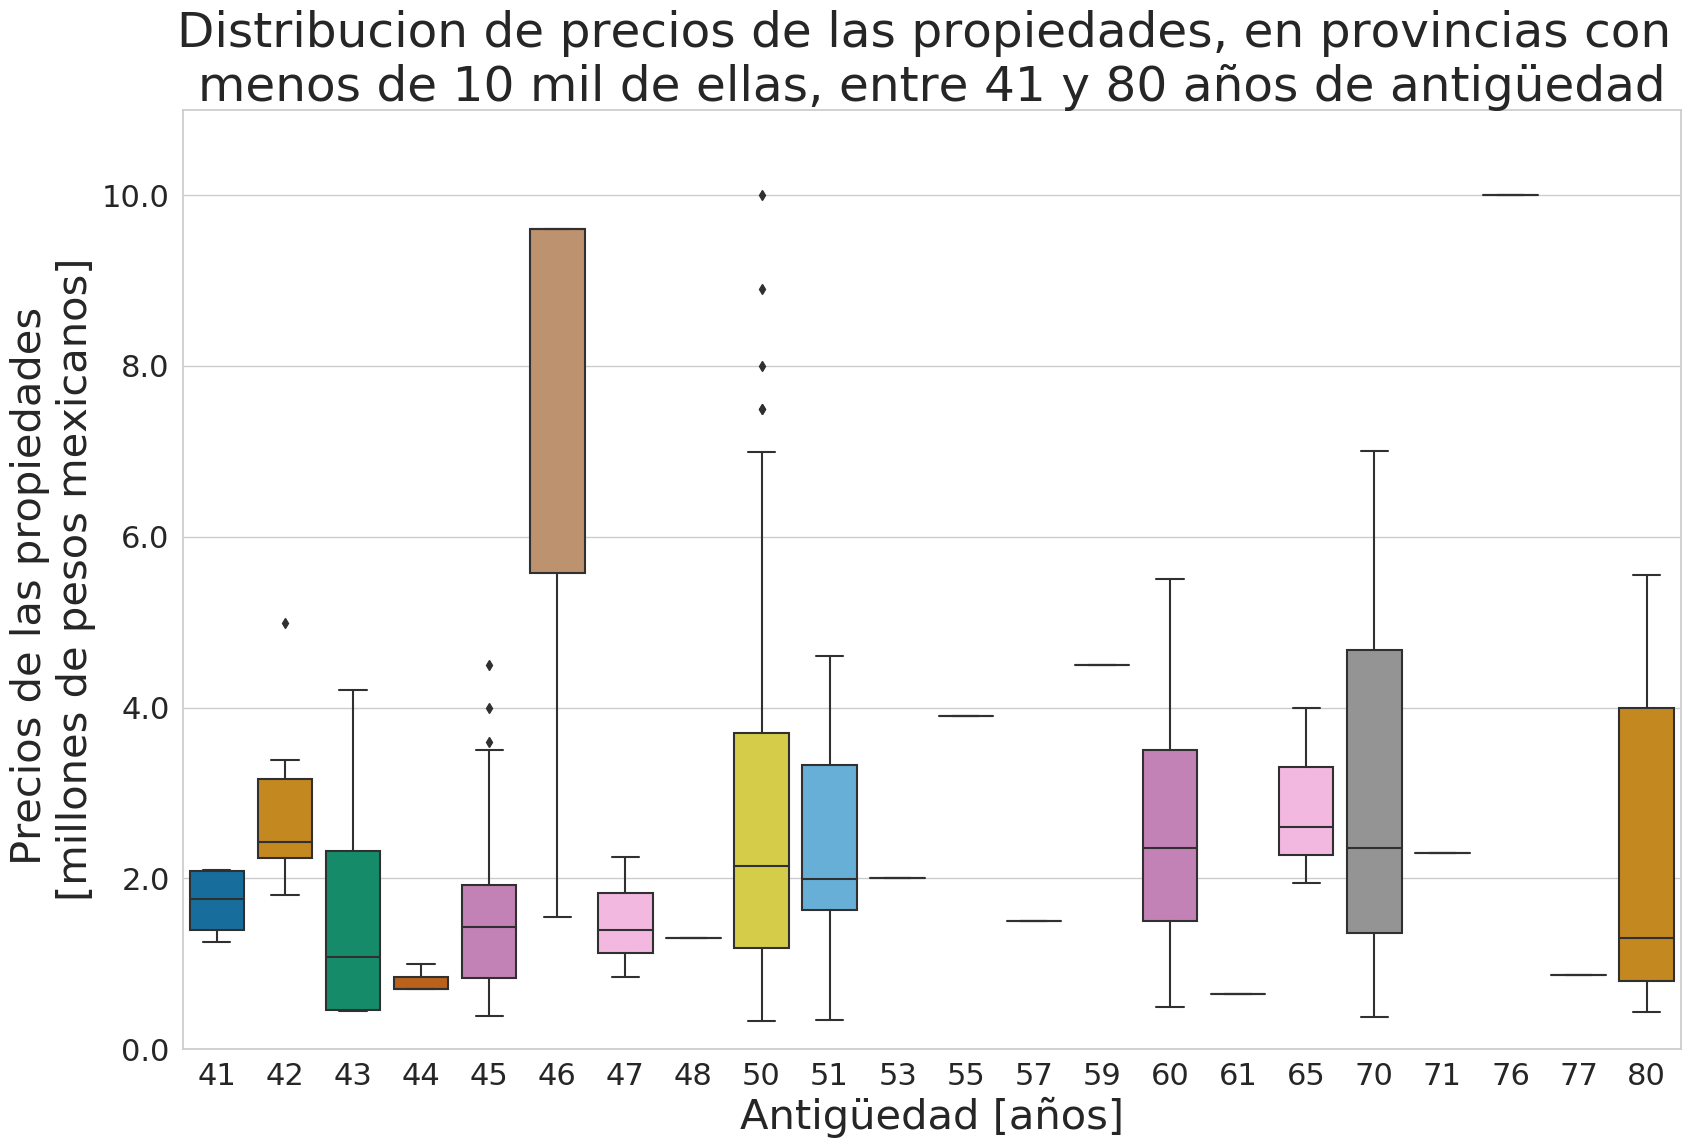

In [64]:
boxplot_prov_resto_precio_antiguedad_mas_40 = sns.boxplot(
                                            x = 'antiguedad',
                                            y = 'precio',
                                            data = prov_resto_antiguedad.loc[prov_resto_antiguedad['antiguedad'] > 40],
                                            palette = 'colorblind'
                                        )

common.setear_titulos_plot(
    boxplot_prov_resto_precio_antiguedad_mas_40,
    'Distribucion de precios de las propiedades, en provincias con \n'+\
    'menos de 10 mil de ellas, entre 41 y 80 años de antigüedad',
    'Antigüedad [años]',
    'Precios de las propiedades \n[millones de pesos mexicanos]'
)

boxplot_prov_resto_precio_antiguedad_mas_40.yaxis.set_major_formatter(
    FuncFormatter(lambda x, pos: "%0.1f" % (x*1e-6))
)

boxplot_prov_resto_precio_antiguedad_mas_40.set_ylim(0,11000000)

fig_boxplot_prov_resto_precio_antiguedad_mas_40 =\
    boxplot_prov_resto_precio_antiguedad_mas_40.get_figure()

plt.tight_layout()
#fig_boxplot_prov_resto_precio_antiguedad_mas_40.savefig('./figs/boxplot_provincia_MENOS_10_mil_precio_antiguedad_mas_40.png')
plt.show()

### En las provincias con menos de 10 mil propiedades, ¿Como se distribuye el precio segun el tipodepropiedad? 

In [65]:
prov_resto_tipodepropiedad = prov_resto.dropna(subset = ['tipodepropiedad'])
prov_resto_tipodepropiedad['tipodepropiedad'].isnull().sum()

0

In [140]:
prov_resto_tipodepropiedad = prov_resto_tipodepropiedad.loc[~(prov_resto_tipodepropiedad['tipodepropiedad'].isin(['Lote', 'Hospedaje']))]

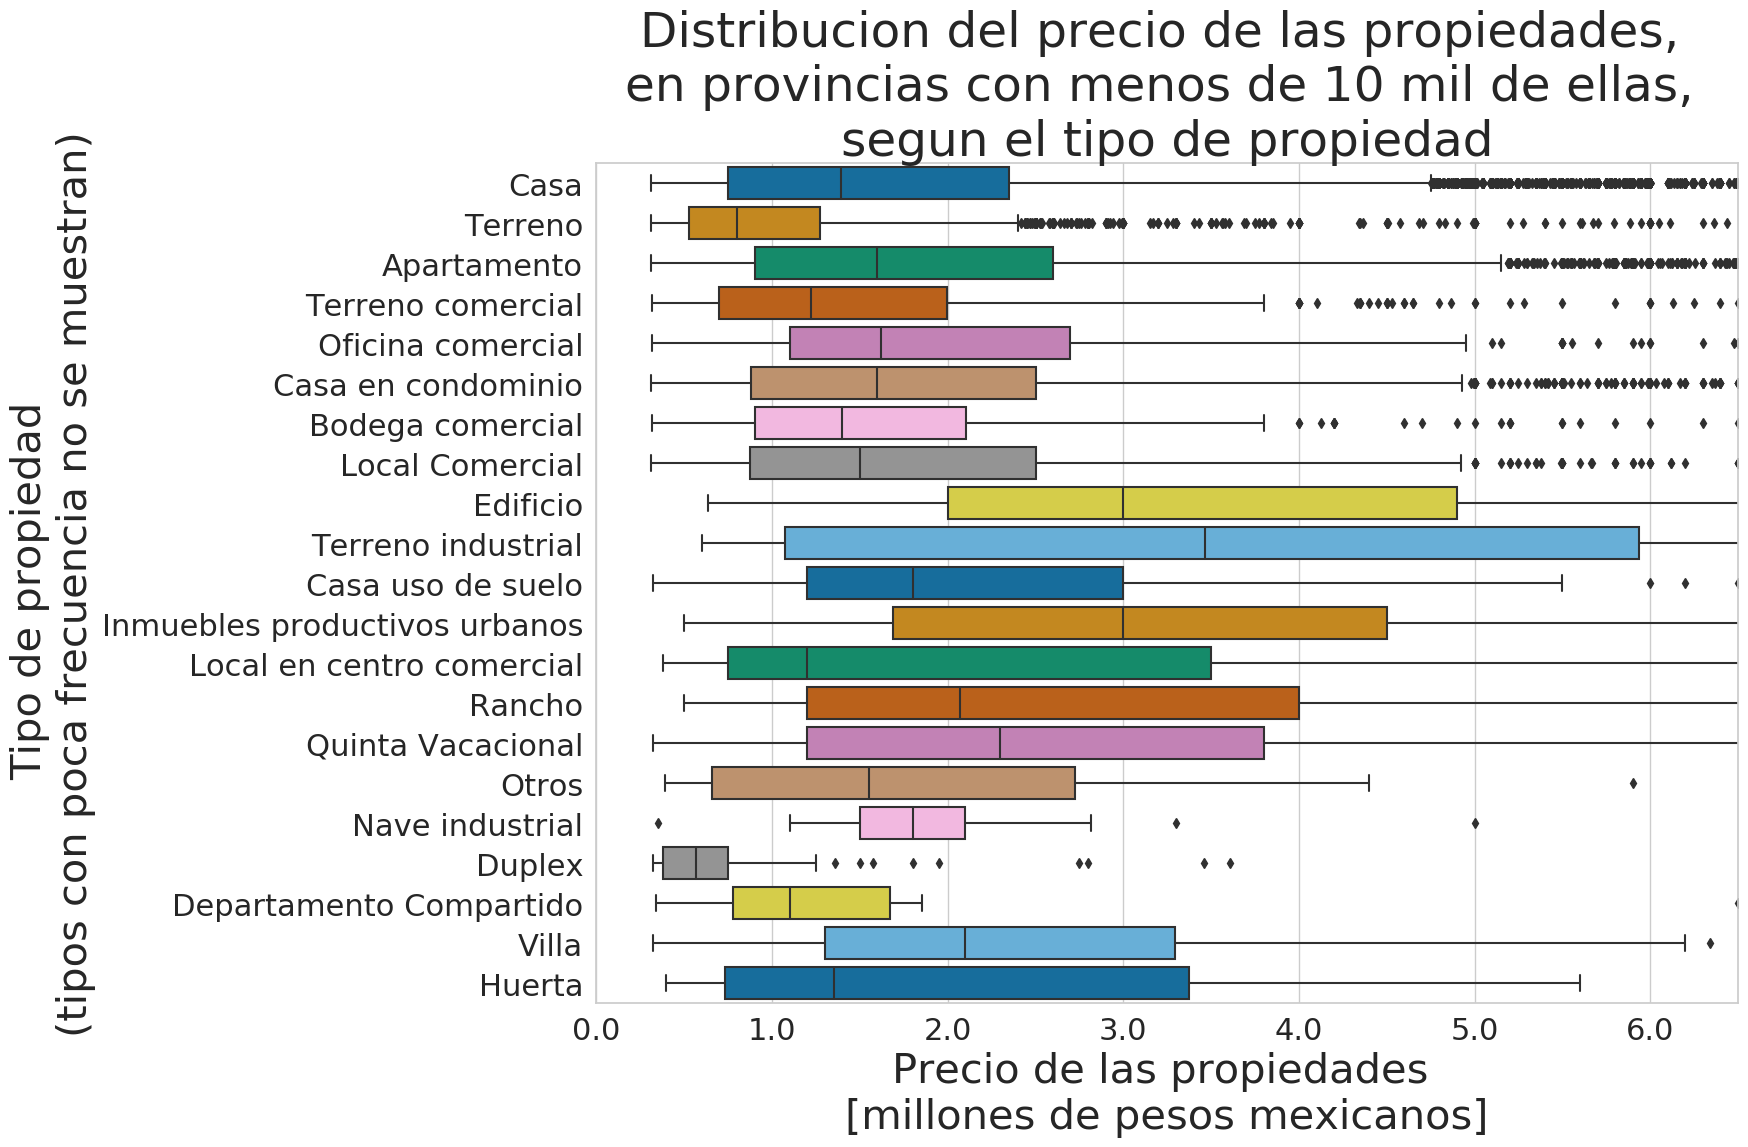

In [143]:
boxplot_prov_resto_precio_tipodepropiedad = sns.boxplot(
                                                x = 'precio',
                                                y = 'tipodepropiedad',
                                                data = prov_resto_tipodepropiedad,
                                                palette = 'colorblind'
                                            )
common.setear_titulos_plot(
    boxplot_prov_resto_precio_tipodepropiedad,
    'Distribucion del precio de las propiedades, \n'+\
    'en provincias con menos de 10 mil de ellas, \n'+\
    'segun el tipo de propiedad',
    'Precio de las propiedades \n[millones de pesos mexicanos]',
    'Tipo de propiedad \n(tipos con poca frecuencia no se muestran)'
)

boxplot_prov_resto_precio_tipodepropiedad.xaxis.set_major_formatter(
    FuncFormatter(lambda x, pos: "%0.1f" % (x*1e-6))
)

boxplot_prov_resto_precio_tipodepropiedad.set_xlim(0,6500000)

fig_boxplot_prov_resto_precio_tipodepropiedad =\
    boxplot_prov_resto_precio_tipodepropiedad.get_figure()

plt.tight_layout(w_pad = 20)
#fig_boxplot_prov_resto_precio_tipodepropiedad.savefig('./figs/boxplot_provincia_MENOS_10_mil_precio_tipodepropiedad.png')
plt.show()

## Top 2 provincias, top ciudades 

In [67]:
top_2_prov = top_6_prov[top_6_prov['cantidad_propiedades'] > 40000].copy()
top_2_prov['provincia'].unique()

array(['Distrito Federal', 'Edo. de México'], dtype=object)

In [68]:
top_2_prov_ciudad_mas_6_mil = top_2_prov.groupby(['ciudad']).agg({'ciudad' : 'count'})
top_2_prov_ciudad_mas_6_mil.columns = ['cantidad_propiedades_ciudad']
top_2_prov_ciudad_mas_6_mil = top_2_prov_ciudad_mas_6_mil.loc[top_2_prov_ciudad_mas_6_mil['cantidad_propiedades_ciudad'] > 6000]
top_2_prov_ciudad = top_2_prov_ciudad_mas_6_mil.merge(top_2_prov, on = 'ciudad', how = 'inner')
top_2_prov_ciudad

ciudad  cantidad_propiedades_ciudad         provincia  \
0           Alvaro Obregón                         6632  Distrito Federal   
1           Alvaro Obregón                         6632  Distrito Federal   
2           Alvaro Obregón                         6632  Distrito Federal   
3           Alvaro Obregón                         6632  Distrito Federal   
4           Alvaro Obregón                         6632  Distrito Federal   
5           Alvaro Obregón                         6632  Distrito Federal   
6           Alvaro Obregón                         6632  Distrito Federal   
7           Alvaro Obregón                         6632  Distrito Federal   
8           Alvaro Obregón                         6632  Distrito Federal   
9           Alvaro Obregón                         6632  Distrito Federal   
10          Alvaro Obregón                         6632  Distrito Federal   
11          Alvaro Obregón                         6632  Distrito Federal   
12          Alvaro Obregón                         6632  Distrito Federal   
13          Alvaro Obregón                         6632  Distrito Federal   
14          Alvaro Obregón                         6632  Distrito Federal   
15          Alvaro Obregón                         6632  Distrito Federal   
16          Alvaro Obregón                         6632  Distrito Federal   
17          Alvaro Obregón                         6632  Distrito Federal   
18          Alvaro Obregón                         6632  Distrito Federal   
19          Alvaro Obregón                         6632  Distrito Federal   
20          Alvaro Obregón                         6632  Distrito Federal   
21          Alvaro Obregón                         6632  Distrito Federal   
22          Alvaro Obregón                         6632  Distrito Federal   
23          Alvaro Obregón                         6632  Distrito Federal   
24          Alvaro Obregón                         6632  Distrito Federal   
25          Alvaro Obregón                         6632  Distrito Federal   
26          Alvaro Obregón                         6632  Distrito Federal   
27          Alvaro Obregón                         6632  Distrito Federal   
28          Alvaro Obregón                         6632  Distrito Federal   
29          Alvaro Obregón                         6632  Distrito Federal   
...                    ...                          ...               ...   
30708  Naucalpan de Juárez                         6554    Edo. de México   
30709  Naucalpan de Juárez                         6554    Edo. de México   
30710  Naucalpan de Juárez                         6554    Edo. de México   
30711  Naucalpan de Juárez                         6554    Edo. de México   
30712  Naucalpan de Juárez                         6554    Edo. de México   
30713  Naucalpan de Juárez                         6554    Edo. de México   
30714  Naucalpan de Juárez                         6554    Edo. de México   
30715  Naucalpan de Juárez                         6554    Edo. de México   
30716  Naucalpan de Juárez                         6554    Edo. de México   
30717  Naucalpan de Juárez                         6554    Edo. de México   
30718  Naucalpan de Juárez                         6554    Edo. de México   
30719  Naucalpan de Juárez                         6554    Edo. de México   
30720  Naucalpan de Juárez                         6554    Edo. de México   
30721  Naucalpan de Juárez                         6554    Edo. de México   
30722  Naucalpan de Juárez                         6554    Edo. de México   
30723  Naucalpan de Juárez                         6554    Edo. de México   
30724  Naucalpan de Juárez                         6554    Edo. de México   
30725  Naucalpan de Juárez                         6554    Edo. de México   
30726  Naucalpan de Juárez                         6554    Edo. de México   
30727  Naucalpan de Juárez                         6554    Edo. de México   
30728  Naucalpan

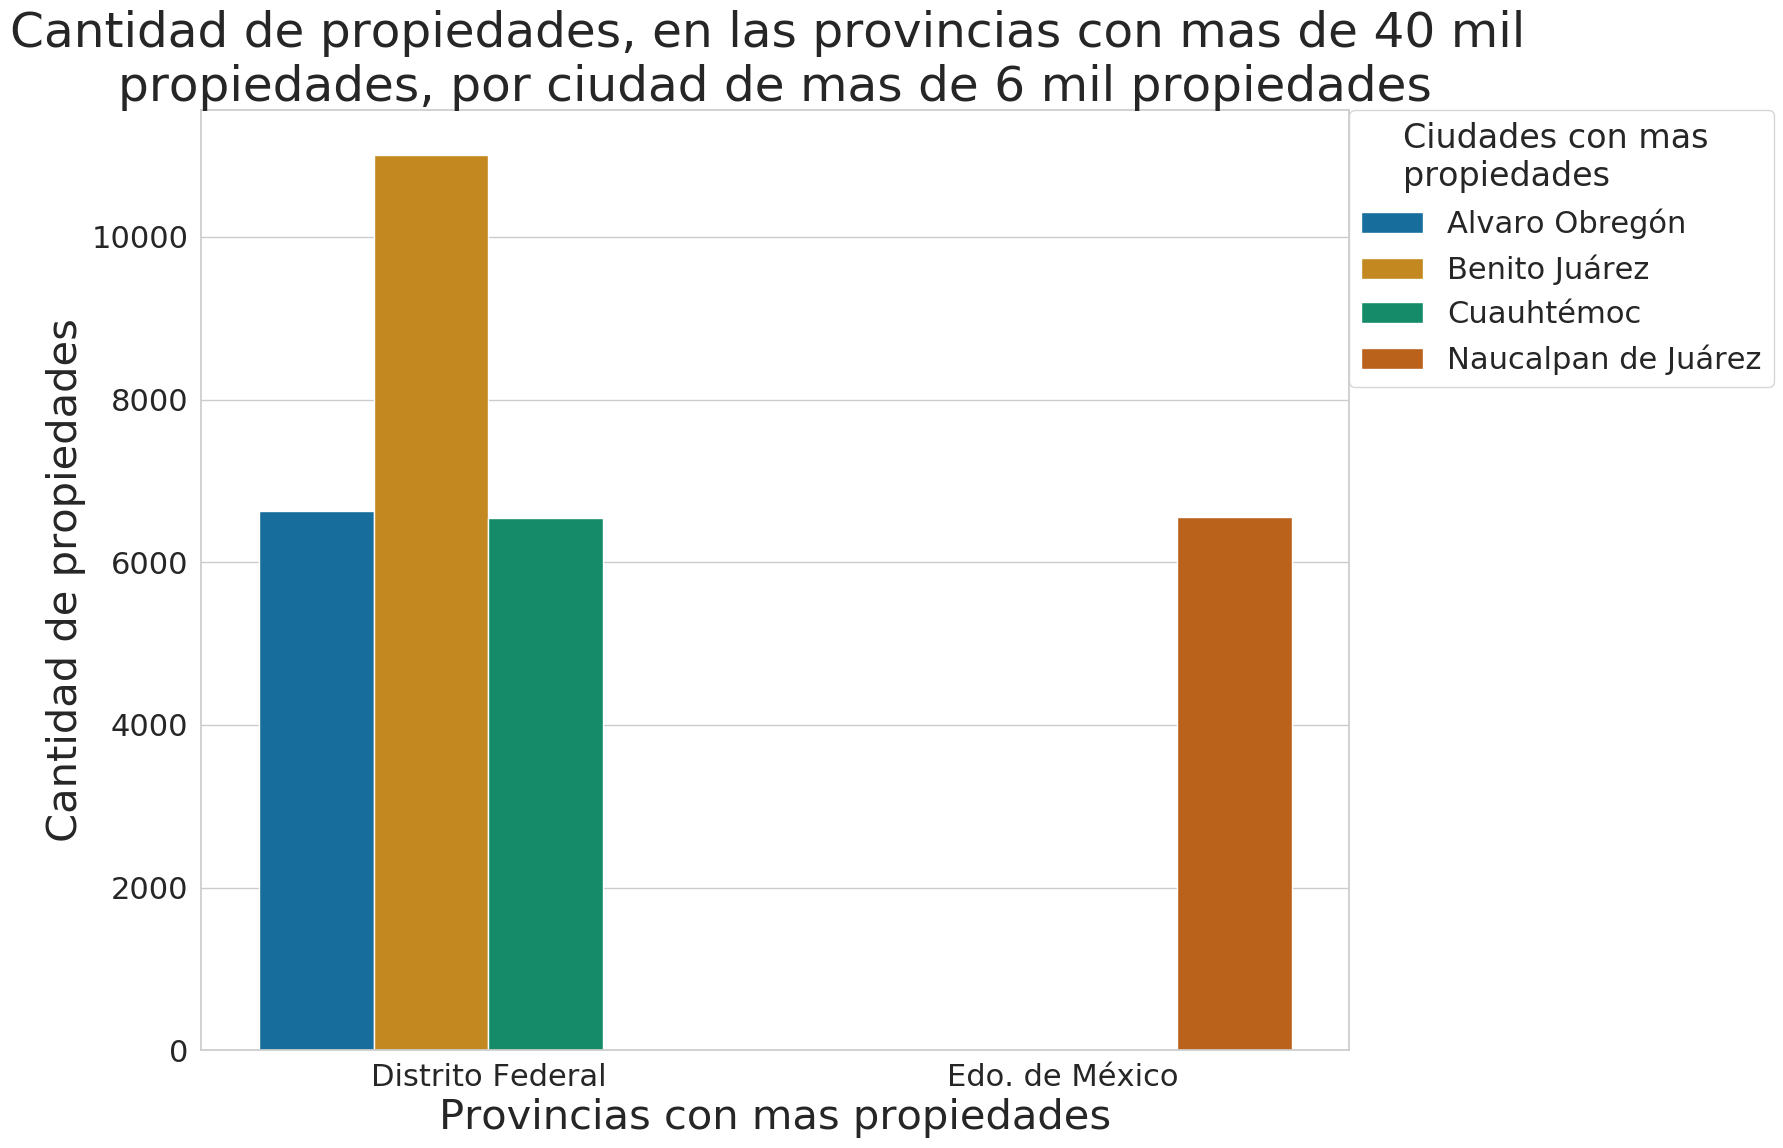

In [144]:
barplot_top_2_prov_ciudades_cant = sns.countplot(
                                        x = 'provincia',
                                        hue = 'ciudad',
                                        data = top_2_prov_ciudad,
                                        palette = 'colorblind'
                                    )

common.setear_titulos_plot(
    barplot_top_2_prov_ciudades_cant,
    'Cantidad de propiedades, en las provincias con mas de 40 mil \n'+\
    'propiedades, por ciudad de mas de 6 mil propiedades',
    'Provincias con mas propiedades',
    'Cantidad de propiedades'
)

plt.legend(title = 'Ciudades con mas \npropiedades', loc = [1,0.705])

fig_barplot_top_2_prov_ciudades_cant =\
    barplot_top_2_prov_ciudades_cant.get_figure()

plt.tight_layout()
#fig_barplot_top_2_prov_ciudades_cant.savefig('./figs/countplot_provincias_MAS_40_mil_top_ciudades.png')
plt.show()

In [70]:
top_2_prov_ciudad_precio_estadist =\
    common.agrupar_calcular_estadisticas_desagrupar(top_2_prov_ciudad, 'ciudad', 'precio')
top_2_prov_ciudad_precio_estadist_millones =\
    top_2_prov_ciudad_precio_estadist.transform(lambda x: (x*1e-6) if x.dtype == np.float32 else x) 
top_2_prov_ciudad_precio_estadist_millones

ciudad     precio_cuantil_1        precio_median  \
0       Alvaro Obregón           2.10999990           3.90000010   
1        Benito Juárez           1.87399995           2.84999990   
2           Cuauhtémoc           1.28649998           2.68666601   
3  Naucalpan de Juárez           2.59999990           3.70000005   

      precio_cuantil_3  
0           6.32900000  
1           4.30000019  
2           4.85500002  
3           5.15000010

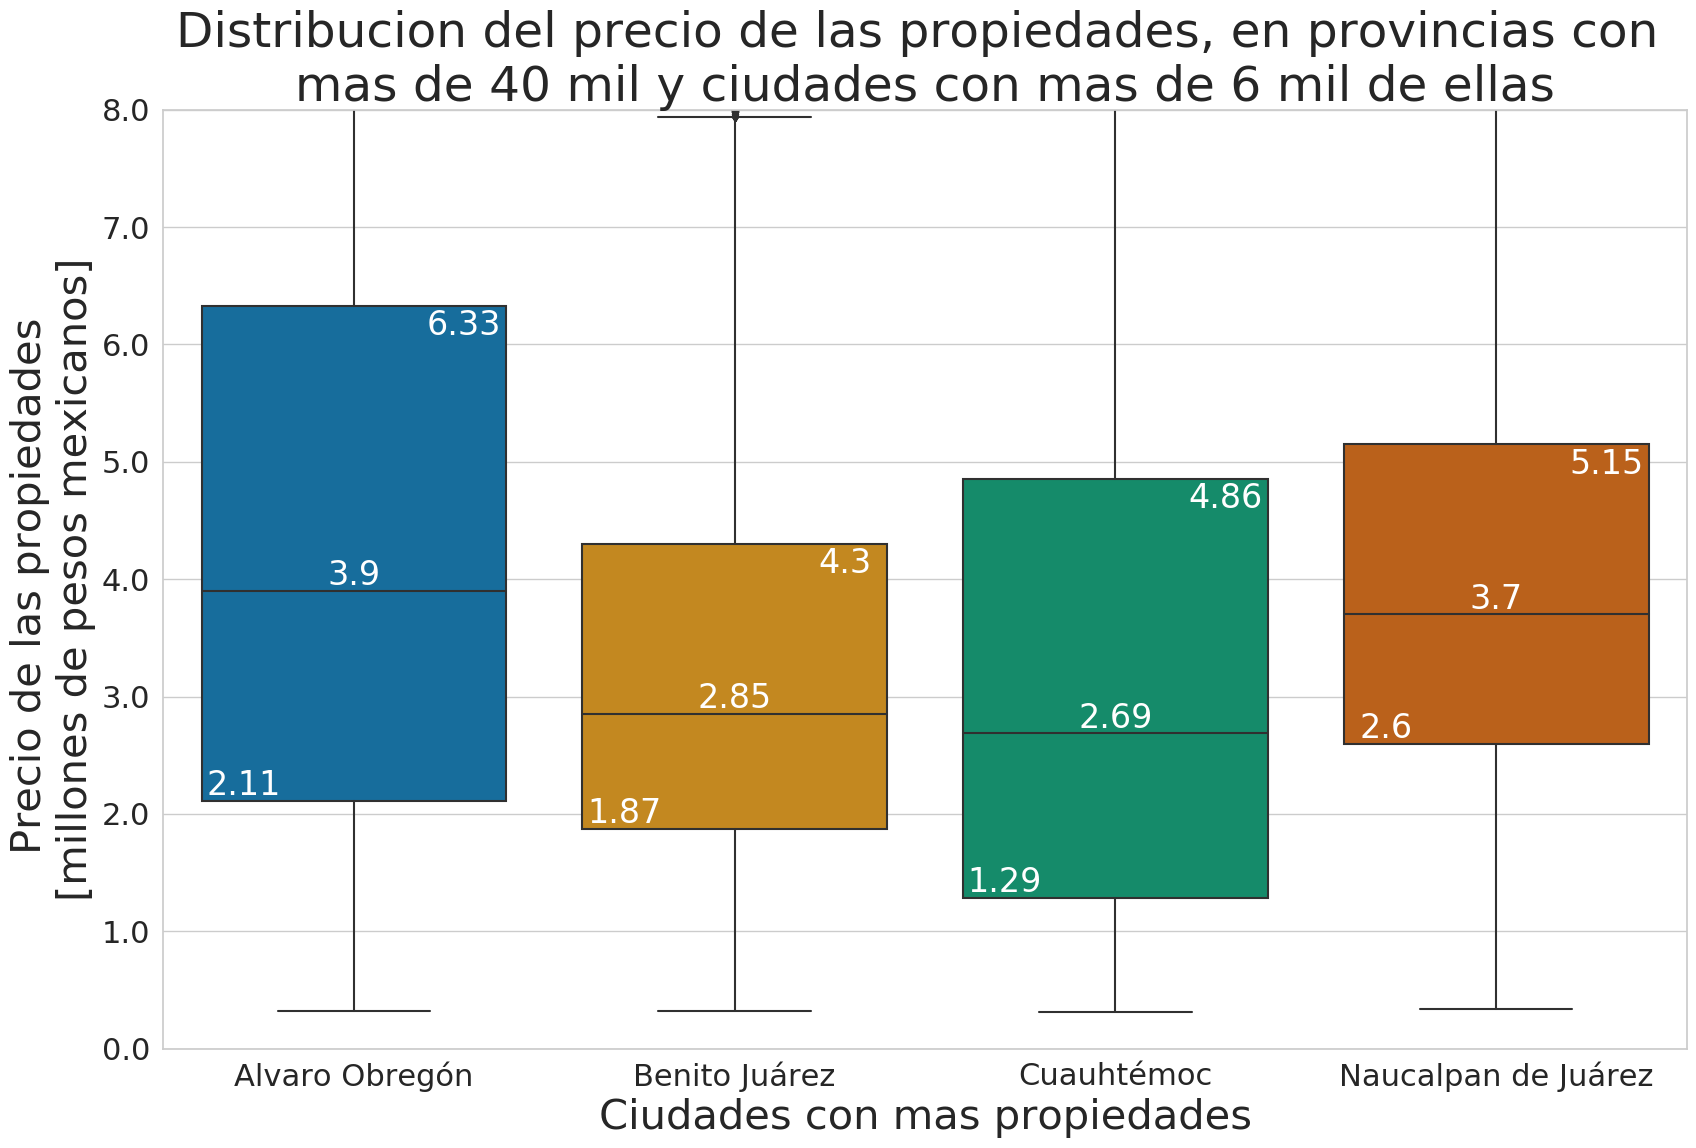

In [146]:
boxplot_top_2_prov_ciudad_precio = sns.boxplot(
                                        x = 'ciudad',
                                        y = 'precio',
                                        data = top_2_prov_ciudad,
                                        palette = 'colorblind'
                                    )

common.setear_titulos_plot(
    boxplot_top_2_prov_ciudad_precio,
    'Distribucion del precio de las propiedades, en provincias con \n'+\
    'mas de 40 mil y ciudades con mas de 6 mil de ellas',
    'Ciudades con mas propiedades',
    'Precio de las propiedades \n[millones de pesos mexicanos]'
)

boxplot_top_2_prov_ciudad_precio.set_ylim(0,8000000)
boxplot_top_2_prov_ciudad_precio.yaxis.set_major_formatter(
    FuncFormatter(lambda x, pos: "%0.1f" % (x*1e-6))
)

common.agregar_serie_plot(
    boxplot_top_2_prov_ciudad_precio,
    top_2_prov_ciudad_precio_estadist_millones['precio_cuantil_1'],
    top_2_prov_ciudad_precio_estadist['precio_cuantil_1'],
    'w',
    -0.29, 50000
)

common.agregar_serie_plot(
    boxplot_top_2_prov_ciudad_precio,
    top_2_prov_ciudad_precio_estadist_millones['precio_median'],
    top_2_prov_ciudad_precio_estadist['precio_median'],
    'w',
    0, 50000
)

common.agregar_serie_plot(
    boxplot_top_2_prov_ciudad_precio,
    top_2_prov_ciudad_precio_estadist_millones['precio_cuantil_3'],
    top_2_prov_ciudad_precio_estadist['precio_cuantil_3'],
    'w',
    0.29, -250000
)

fig_boxplot_top_2_prov_ciudad_precio =\
    boxplot_top_2_prov_ciudad_precio.get_figure()

plt.tight_layout()
#fig_boxplot_top_2_prov_ciudad_precio.savefig('./figs/boxplot_provincia_MAS_40_mil_ciudad_top_precio.png')
plt.show()

In [72]:
top_2_prov_ciudad_banos = top_2_prov_ciudad.dropna(subset = ['banos']).copy()
top_2_prov_ciudad_banos['banos'].isnull().sum()

0

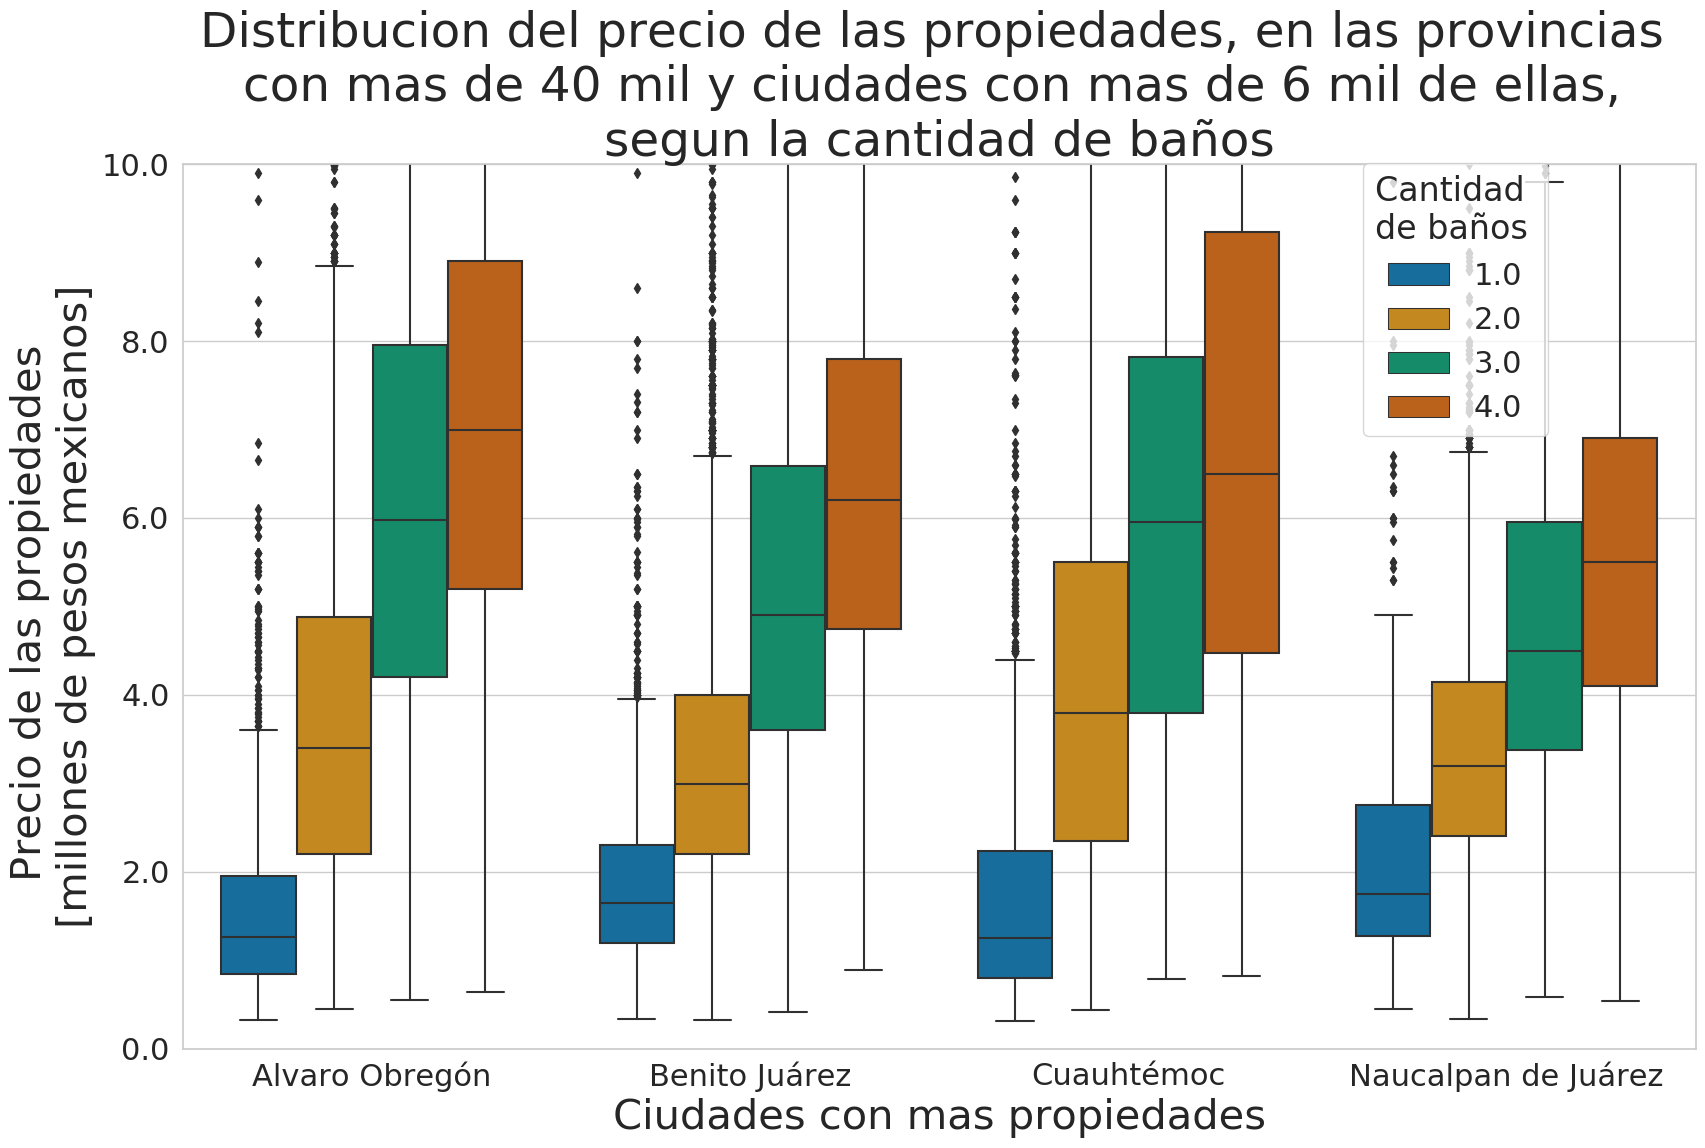

In [160]:
boxplot_top_2_prov_ciudad_banos = sns.boxplot(
                                        x = 'ciudad',
                                        y = 'precio',
                                        hue = 'banos',
                                        data = top_2_prov_ciudad_banos,
                                        palette = 'colorblind'
                                    )

common.setear_titulos_plot(
    boxplot_top_2_prov_ciudad_banos,
    'Distribucion del precio de las propiedades, en las provincias \n'+\
    'con mas de 40 mil y ciudades con mas de 6 mil de ellas, \n'+\
    'segun la cantidad de baños',
    'Ciudades con mas propiedades',
    'Precio de las propiedades \n[millones de pesos mexicanos]'
)

boxplot_top_2_prov_ciudad_banos.set_ylim(0, 10000000)
boxplot_top_2_prov_ciudad_banos.yaxis.set_major_formatter(
    FuncFormatter(lambda x, pos: "%0.1f" % (x*1e-6))
)

fig_boxplot_top_2_prov_ciudad_banos =\
    boxplot_top_2_prov_ciudad_banos.get_figure()

plt.legend(title = 'Cantidad \nde baños', loc = [0.78, 0.693])

plt.tight_layout()
#fig_boxplot_top_2_prov_ciudad_banos.savefig('./figs/boxplot_provincia_MAS_40_mil_ciudad_top_precio_banos.png')
plt.show()

### En las provincias con mas de 40 mil propiedades y ciudades con mas de 6 mil, ¿Como se varia a la mediana del precio segun la cantidad de baños? 

In [74]:
top_2_prov_ciudad_habitaciones = top_2_prov_ciudad.fillna(value = {'habitaciones' : 1})
top_2_prov_ciudad_habitaciones['habitaciones'] = top_2_prov_ciudad_habitaciones['habitaciones'].astype(np.int8)
top_2_prov_ciudad_habitaciones['habitaciones'].dtype

dtype('int8')

In [75]:
top_2_prov_ciudad_habitaciones_pivot = top_2_prov_ciudad_habitaciones.pivot_table(index = 'ciudad', columns = 'habitaciones', values = 'precio', aggfunc = 'median')
top_2_prov_ciudad_habitaciones_pivot_millones = top_2_prov_ciudad_habitaciones_pivot.transform(lambda x: x*1e-6)
top_2_prov_ciudad_habitaciones_pivot_millones

habitaciones                          1                    2   \
ciudad                                                          
Alvaro Obregón                2.94749999           2.54699993   
Benito Juárez                 3.00000000           2.34478998   
Cuauhtémoc                    2.82900000           2.18499994   
Naucalpan de Juárez           2.75000000           2.09999990   

habitaciones                          3                    4   \
ciudad                                                          
Alvaro Obregón                4.82249975           5.80000019   
Benito Juárez                 3.40000010           5.19999981   
Cuauhtémoc                    3.09999990           4.72146082   
Naucalpan de Juárez           3.79999995           4.19999981   

habitaciones                          5                    6   \
ciudad                                                          
Alvaro Obregón                4.59999990           4.19999981   
Benito Juárez                 6.09999990           5.87500000   
Cuauhtémoc                    4.55000019           5.36499977   
Naucalpan de Juárez           4.05000019           3.68750000   

habitaciones                          7                    8   \
ciudad                                                          
Alvaro Obregón                6.26499987           3.50000000   
Benito Juárez                 6.05000019           9.89999962   
Cuauhtémoc                    4.38000011           4.44999981   
Naucalpan de Juárez           3.50000000           2.29999995   

habitaciones                          9                    10  
ciudad                                                         
Alvaro Obregón                1.35000002           4.69999981  
Benito Juárez                 8.30000019           5.59999990  
Cuauhtémoc                    8.00000000           7.50000000  
Naucalpan de Juárez           3.50000000           3.34999990

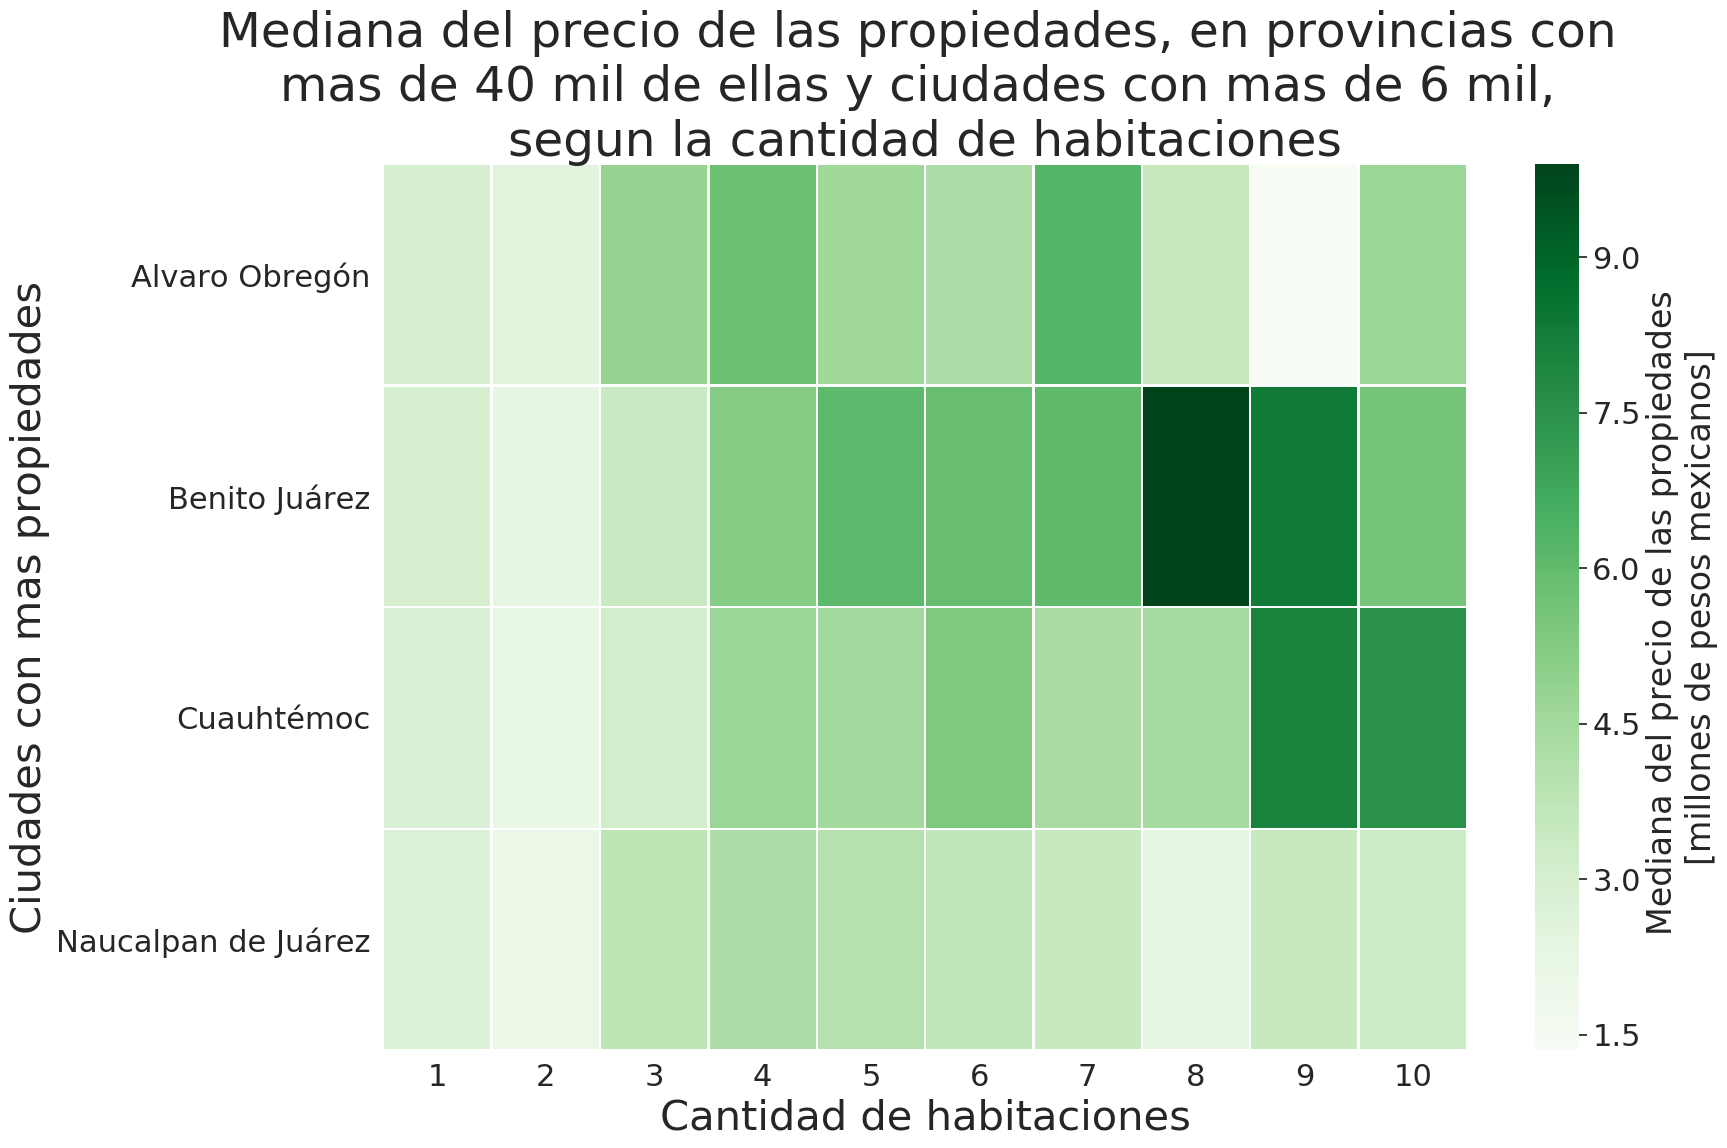

In [161]:
heatmap_top_2_prov_ciudad_precio_habitaciones = sns.heatmap(
                                                    data = top_2_prov_ciudad_habitaciones_pivot_millones,
                                                    cmap = 'Greens',
                                                    linewidths = 1,
                                                    cbar_kws = {'label' : 'Mediana del precio de las propiedades \n[millones de pesos mexicanos]'}
                                                )

common.setear_titulos_plot(
    heatmap_top_2_prov_ciudad_precio_habitaciones,
    'Mediana del precio de las propiedades, en provincias con \n'+\
    'mas de 40 mil de ellas y ciudades con mas de 6 mil, \n'+\
    'segun la cantidad de habitaciones',
    'Cantidad de habitaciones',
    'Ciudades con mas propiedades'
)

fig_heatmap_top_2_prov_ciudad_precio_habitaciones =\
    heatmap_top_2_prov_ciudad_precio_habitaciones.get_figure()

plt.tight_layout()
#fig_heatmap_top_2_prov_ciudad_precio_habitaciones.savefig('./figs/heatmap_provincia_MAS_40_mil_ciudad_top_precio_habitaciones.png')
plt.show()

### En provincias con mas de 10 mil propiedades y ciudades con mas de 6 mil, ¿Como se distribuye el precio segun la cantidad de garages? 

In [77]:
top_2_prov_ciudad_garages = top_2_prov_ciudad.fillna(value = {'garages' : 0})
top_2_prov_ciudad_garages['garages'] = top_2_prov_ciudad_garages['garages'].astype(np.int8)
top_2_prov_ciudad_garages['garages'].dtype

dtype('int8')

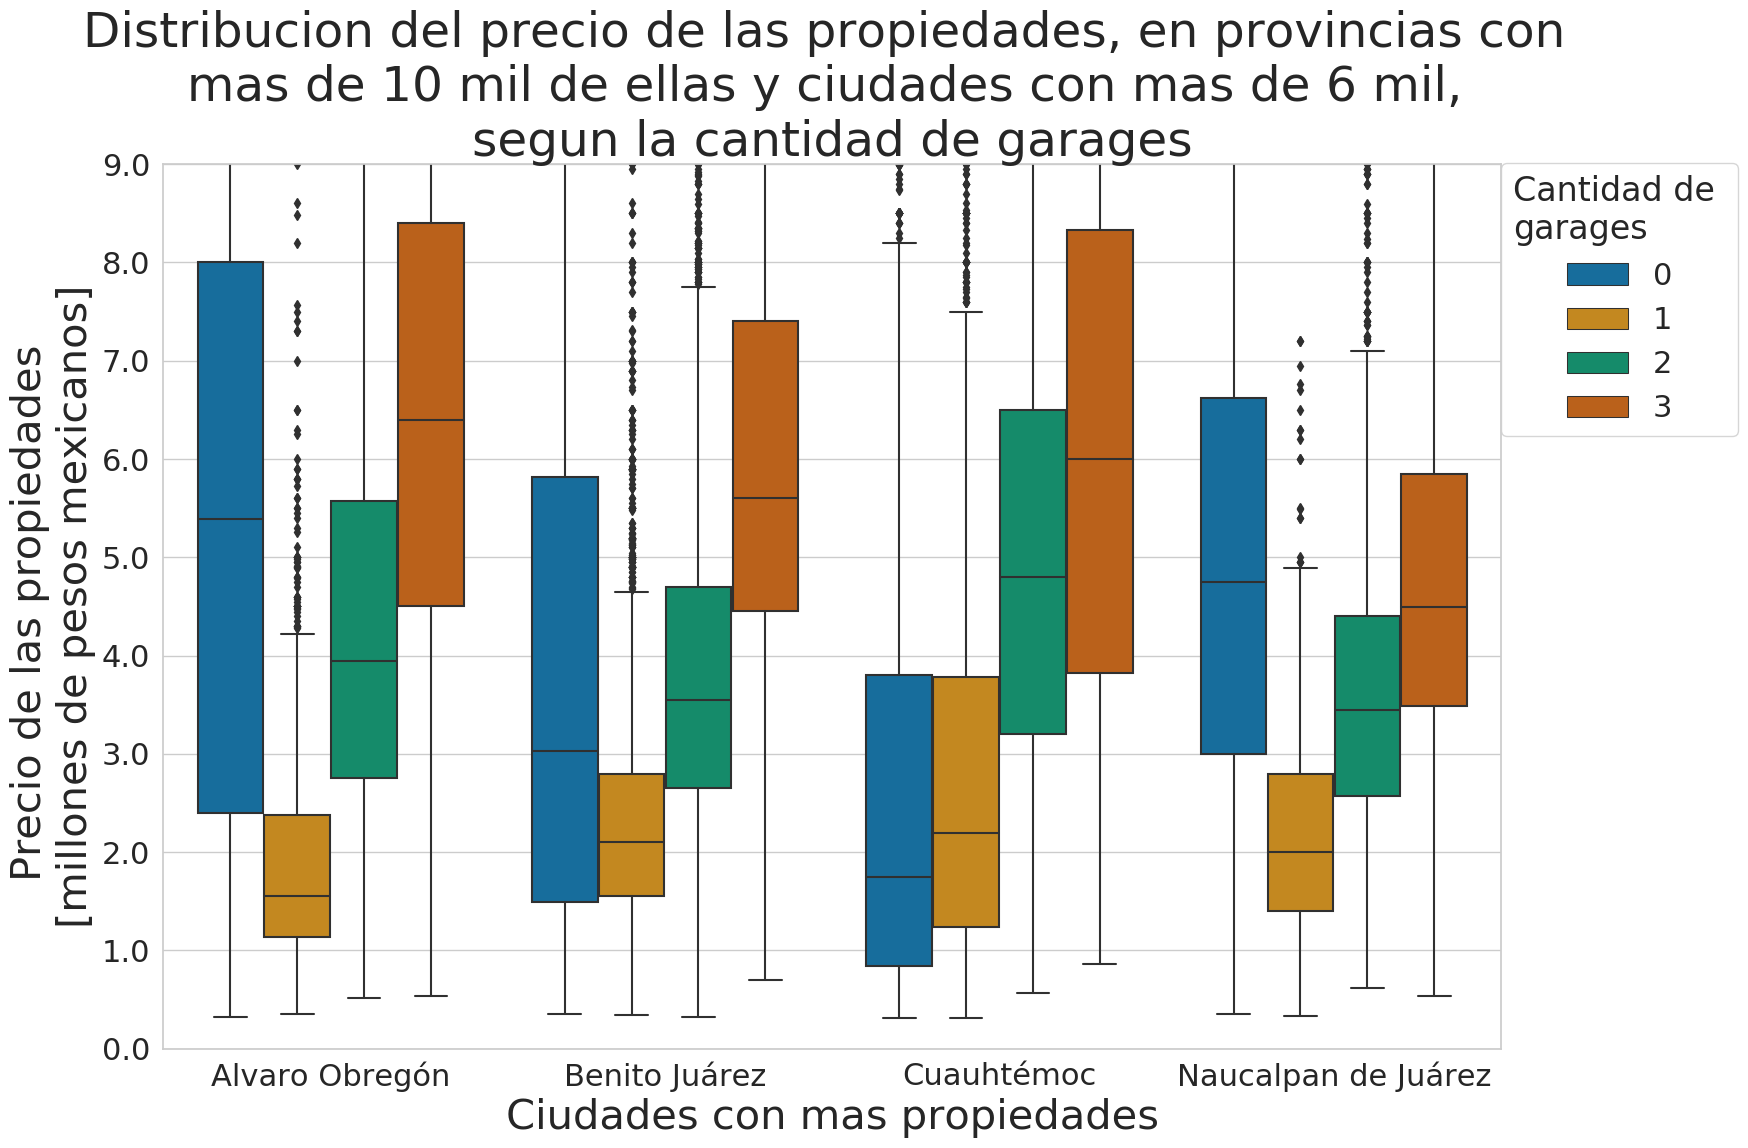

In [162]:
boxplot_top_2_prov_ciudad_garages = sns.boxplot(
                                        x = 'ciudad',
                                        y = 'precio',
                                        hue = 'garages',
                                        data = top_2_prov_ciudad_garages,
                                        palette = 'colorblind'
                                    )

common.setear_titulos_plot(
    boxplot_top_2_prov_ciudad_garages,
    'Distribucion del precio de las propiedades, en provincias con \n'+\
    'mas de 10 mil de ellas y ciudades con mas de 6 mil, \n'+\
    'segun la cantidad de garages',
    'Ciudades con mas propiedades',
    'Precio de las propiedades \n[millones de pesos mexicanos]'
)

boxplot_top_2_prov_ciudad_garages.set_ylim(0,9000000)
boxplot_top_2_prov_ciudad_garages.yaxis.set_major_formatter(
    FuncFormatter(lambda x, pos: "%0.1f" % (x*1e-6))
)

plt.legend(title = 'Cantidad de \ngarages', loc = [1,0.693])

fig_boxplot_top_2_prov_ciudad_garages =\
    boxplot_top_2_prov_ciudad_garages.get_figure()

plt.tight_layout()
#fig_boxplot_top_2_prov_ciudad_garages.savefig('./figs/boxplot_provincia_MAS_40_mil_ciudad_top_precio_garages.png')
plt.show()

In [79]:
top_2_prov_ciudad_cosas_cercanas = top_2_prov_ciudad[['ciudad', 'escuelascercanas', 'centroscomercialescercanos', 'precio']].copy()
top_2_prov_ciudad_cosas_cercanas['cosas_cercanas'] = top_2_prov_ciudad_cosas_cercanas.apply(lambda fila: etiquetar_cosas_cercanas(fila), axis = 1)
top_2_prov_ciudad_cosas_cercanas['precio']
top_2_prov_ciudad_cosas_cercanas['orden_cercanos'] =\
    top_2_prov_ciudad_cosas_cercanas['cosas_cercanas'].transform(lambda valor: valor[0])
top_2_prov_ciudad_cosas_cercanas['valores_cercanos'] =\
    top_2_prov_ciudad_cosas_cercanas['cosas_cercanas'].transform(lambda valor: valor[1])
top_2_prov_ciudad_cosas_cercanas.sort_values(by = ['ciudad','orden_cercanos'], inplace = True)
top_2_prov_ciudad_cosas_cercanas

ciudad  escuelascercanas  centroscomercialescercanos  \
0           Alvaro Obregón             False                       False   
2           Alvaro Obregón             False                       False   
5           Alvaro Obregón             False                       False   
6           Alvaro Obregón             False                       False   
7           Alvaro Obregón             False                       False   
11          Alvaro Obregón             False                       False   
13          Alvaro Obregón             False                       False   
14          Alvaro Obregón             False                       False   
15          Alvaro Obregón             False                       False   
18          Alvaro Obregón             False                       False   
20          Alvaro Obregón             False                       False   
21          Alvaro Obregón             False                       False   
22          Alvaro Obregón             False                       False   
25          Alvaro Obregón             False                       False   
26          Alvaro Obregón             False                       False   
28          Alvaro Obregón             False                       False   
29          Alvaro Obregón             False                       False   
35          Alvaro Obregón             False                       False   
36          Alvaro Obregón             False                       False   
37          Alvaro Obregón             False                       False   
38          Alvaro Obregón             False                       False   
45          Alvaro Obregón             False                       False   
46          Alvaro Obregón             False                       False   
47          Alvaro Obregón             False                       False   
48          Alvaro Obregón             False                       False   
50          Alvaro Obregón             False                       False   
52          Alvaro Obregón             False                       False   
54          Alvaro Obregón             False                       False   
58          Alvaro Obregón             False                       False   
59          Alvaro Obregón             False                       False   
...                    ...               ...                         ...   
30686  Naucalpan de Juárez              True                        True   
30687  Naucalpan de Juárez              True                        True   
30688  Naucalpan de Juárez              True                        True   
30692  Naucalpan de Juárez              True                        True   
30694  Naucalpan de Juárez              True                        True   
30697  Naucalpan de Juárez              True                        True   
30698  Naucalpan de Juárez              True                        True   
30700  Naucalpan de Juárez              True                        True   
30701  Naucalpan de Juárez              True                        True   
30703  Naucalpan de Juárez              True                        True   
30704  Naucalpan de Juárez              True                        True   
30707  Naucalpan de Juárez              True                        True   
30708  Naucalpan de Juárez              True                        True   
30710  Naucalpan de Juárez              True                        True   
30713  Naucalpan de Juárez              True                        True   
30714  Naucalpan de Juárez              True                        True   
30715  Naucalpan de Juárez              True                        True   
30716  Naucalpan de Juárez              True                        True   
30717  Naucalpan de Juárez              True                        True   
30720  Naucalpan de Juárez              True                        True   
30721  Naucalpan de Juárez              True                        

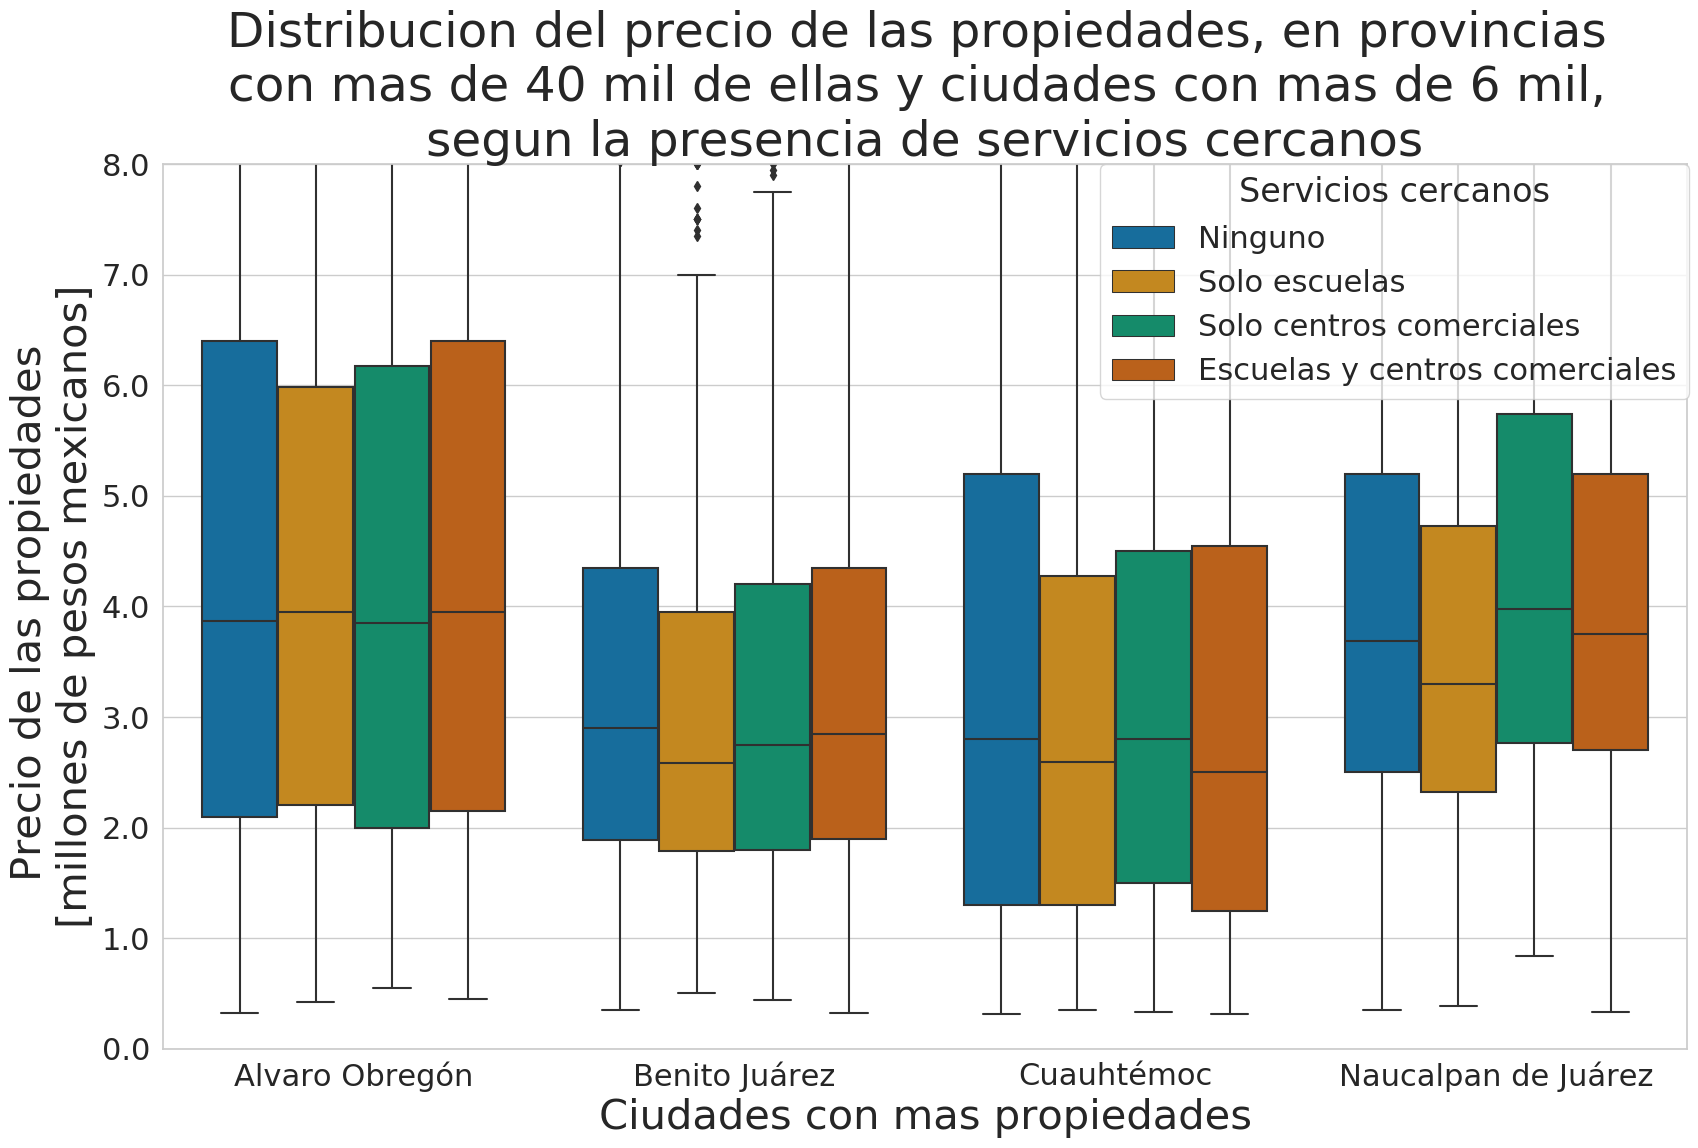

In [163]:
boxplot_top_2_prov_ciudad_precio_cosas_cercanas = sns.boxplot(
                                                        x = 'ciudad',
                                                        y = 'precio',
                                                        hue = 'valores_cercanos',
                                                        data = top_2_prov_ciudad_cosas_cercanas,
                                                        palette = 'colorblind'
                                                    )
common.setear_titulos_plot(
    boxplot_top_2_prov_ciudad_precio_cosas_cercanas,
    'Distribucion del precio de las propiedades, en provincias \n'+\
    'con mas de 40 mil de ellas y ciudades con mas de 6 mil, \n'+\
    'segun la presencia de servicios cercanos',
    'Ciudades con mas propiedades',
    'Precio de las propiedades \n[millones de pesos mexicanos]'
)

boxplot_top_2_prov_ciudad_precio_cosas_cercanas.set_ylim(0,8000000)
boxplot_top_2_prov_ciudad_precio_cosas_cercanas.yaxis.set_major_formatter(
    FuncFormatter(lambda x, pos: "%0.1f" % (x*1e-6))
)

plt.legend(title = 'Servicios cercanos', loc = [0.615, 0.735])

fig_boxplot_top_2_prov_ciudad_precio_cosas_cercanas =\
    boxplot_top_2_prov_ciudad_precio_cosas_cercanas.get_figure()

plt.tight_layout()
#fig_boxplot_top_2_prov_ciudad_precio_cosas_cercanas.savefig('./figs/boxplot_provincia_MAS_40_mil_ciudad_top_precio_servicios_cercanos.png')
plt.show()

### En las provincias con mas de  40 mil propiedades y ciudades con mas de 6 mil, ¿Como varia la mediana del precio segun la presencia de gimnasio, usosmultiples y piscina? 

In [81]:
top_2_prov_ciudad_extras = top_2_prov_ciudad[['ciudad', 'gimnasio', 'usosmultiples', 'piscina', 'precio']].copy()
top_2_prov_ciudad_extras['extras'] = top_2_prov_ciudad_extras.apply(lambda fila: etiquetar_extras(fila), axis = 1)
top_2_prov_ciudad_extras['orden_extras'] =\
    top_2_prov_ciudad_extras['extras'].transform(lambda valor: valor[0])
top_2_prov_ciudad_extras['valores_extras'] =\
    top_2_prov_ciudad_extras['extras'].transform(lambda valor: valor[1])
top_2_prov_ciudad_extras.sort_values(by = ['ciudad', 'orden_extras'], inplace = True)
top_2_prov_ciudad_extras_pivot = top_2_prov_ciudad_extras.pivot_table(index = 'ciudad', columns = 'extras', values = 'precio', aggfunc = 'median')
top_2_prov_ciudad_extras_pivot.columns = [
                                            'Ninguno',
                                            'Solo Piscina',
                                            'Solo Usos \nMultiples',
                                            'Solo Gimnasio',
                                            'Solo Gimnasio \ny Piscina',
                                            'Solo Usos \nMultiples \ny Piscina',
                                            'Solo Gimnasio \ny Usos Multiples',
                                            'Gimnasio, \nUsos Multiples \ny Piscina'
                                         ]
top_2_prov_ciudad_extras_pivot_millones = top_2_prov_ciudad_extras_pivot.transform(lambda x: x*1e-6)
top_2_prov_ciudad_extras_pivot_millones

Ninguno         Solo Piscina  \
ciudad                                                          
Alvaro Obregón                3.59999990           4.92525005   
Benito Juárez                 2.82999992           2.81250000   
Cuauhtémoc                    2.59999990           4.44339418   
Naucalpan de Juárez           3.54999995           4.25000000   

                     Solo Usos \nMultiples        Solo Gimnasio  \
ciudad                                                            
Alvaro Obregón                  5.19999981           4.50000000   
Benito Juárez                   3.04999995           2.79999995   
Cuauhtémoc                      1.89999998           3.50000000   
Naucalpan de Juárez             4.80000019           4.40000010   

                     Solo Gimnasio \ny Piscina  \
ciudad                                           
Alvaro Obregón                      5.57810497   
Benito Juárez                       4.14750004   
Cuauhtémoc                          5.00000000   
Naucalpan de Juárez                 4.75000000   

                     Solo Usos \nMultiples \ny Piscina  \
ciudad                                                   
Alvaro Obregón                              4.50000000   
Benito Juárez                               3.77268147   
Cuauhtémoc                                  4.89499998   
Naucalpan de Juárez                         5.52500010   

                     Solo Gimnasio \ny Usos Multiples  \
ciudad                                                  
Alvaro Obregón                             4.09999990   
Benito Juárez                              3.22499990   
Cuauhtémoc                                 2.15000010   
Naucalpan de Juárez                        4.36250019   

                     Gimnasio, \nUsos Multiples \ny Piscina  
ciudad                                                       
Alvaro Obregón                                   5.19999981  
Benito Juárez                                    3.40000010  
Cuauhtémoc                                       4.80000019  
Naucalpan de Juárez                              4.44999981

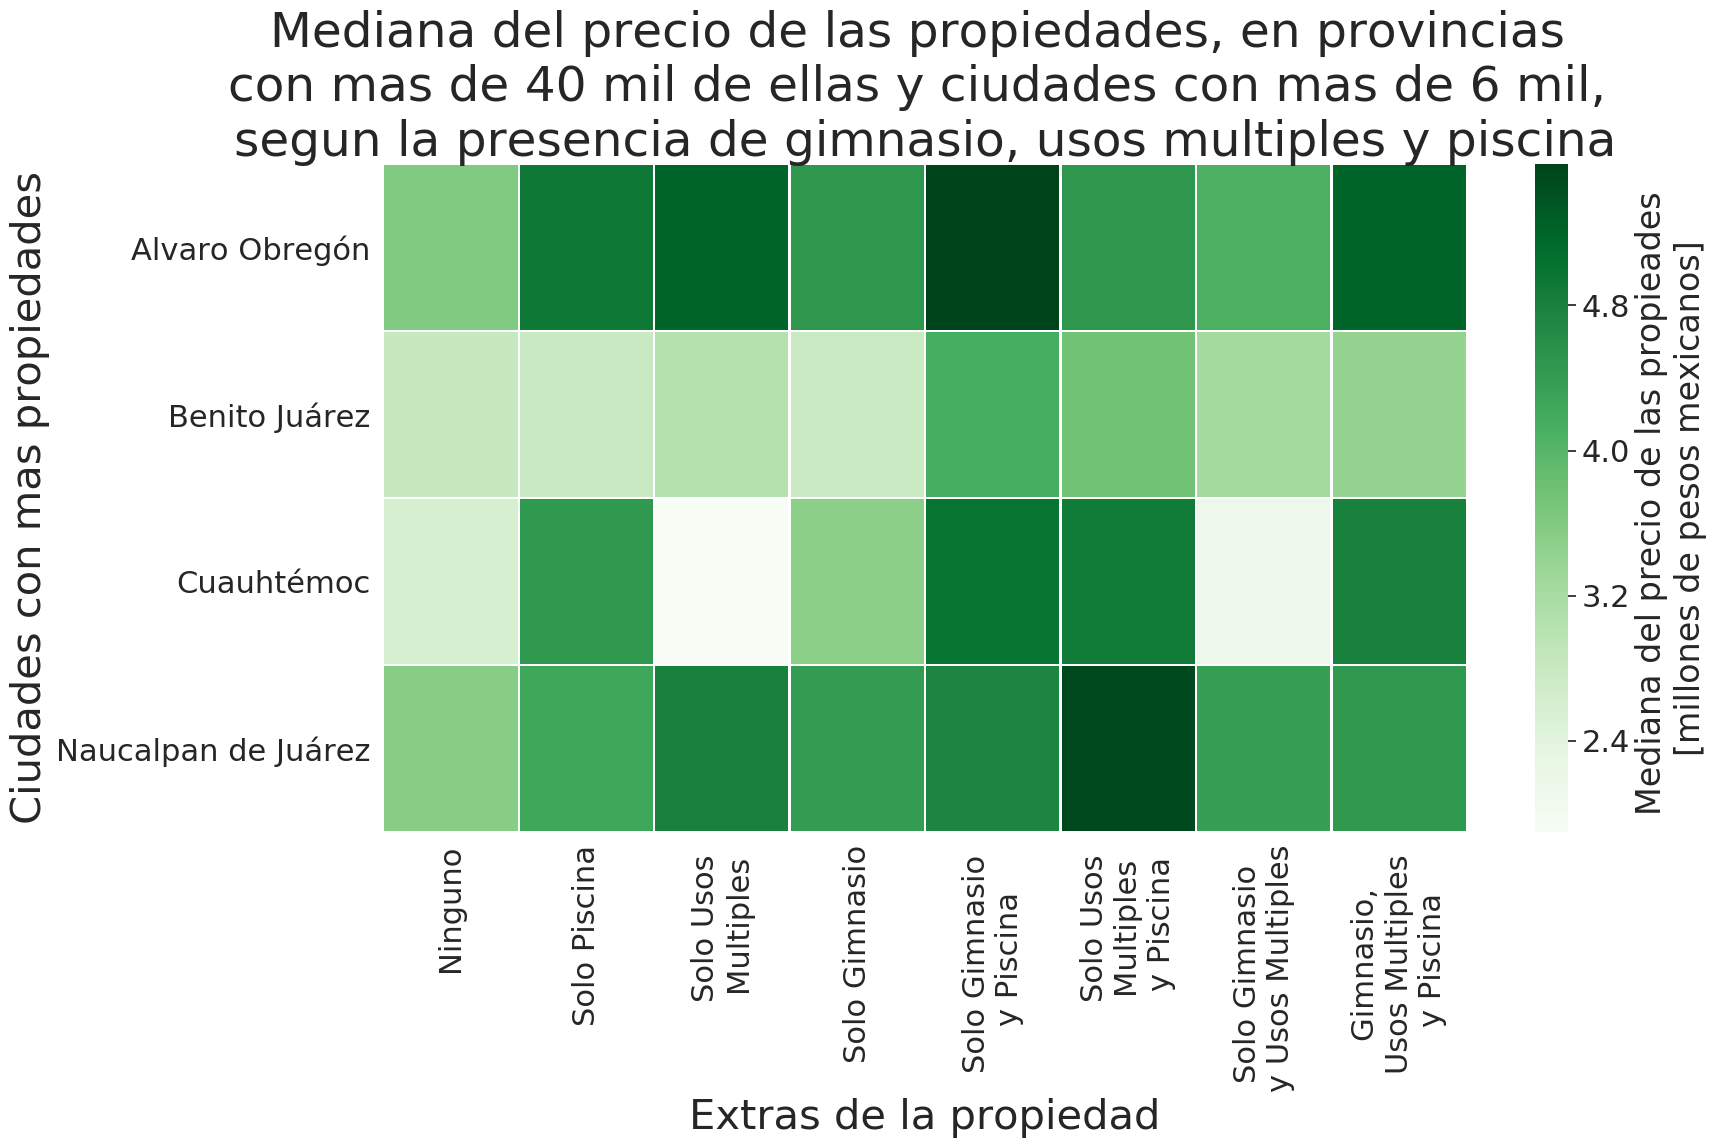

In [164]:
heatmap_top_2_prov_ciudad_precio_extras = sns.heatmap(
                                                data = top_2_prov_ciudad_extras_pivot_millones,
                                                cmap = 'Greens',
                                                linewidth = 1,
                                                cbar_kws = {'label' : 'Mediana del precio de las propieades \n[millones de pesos mexicanos]'}
                                            )

common.setear_titulos_plot(
    heatmap_top_2_prov_ciudad_precio_extras,
    'Mediana del precio de las propiedades, en provincias \n'+\
    'con mas de 40 mil de ellas y ciudades con mas de 6 mil, \n'+\
    'segun la presencia de gimnasio, usos multiples y piscina',
    'Extras de la propiedad',
    'Ciudades con mas propiedades'
)

fig_heatmap_top_2_prov_ciudad_precio_extras =\
    heatmap_top_2_prov_ciudad_precio_extras.get_figure()

plt.tight_layout()
#fig_heatmap_top_2_prov_ciudad_precio_extras.savefig('./figs/heatmap_provinca_MAS_40_mil_ciudad_top_precio_extras.png')
plt.show()

In [83]:
top_2_prov_ciudad_metroscubiertos = top_2_prov_ciudad.dropna(subset = ['metroscubiertos']).copy()
top_2_prov_ciudad_metroscubiertos['metroscubiertos'].isnull().sum()

0

### En provincias con mas de 40 mil propieades y ciudades con mas de 6 mil, ¿Como varia la mediana del precio segun la antiguedad ? 

In [84]:
top_2_prov_ciudad_antiguedad = top_2_prov_ciudad.dropna(subset = ['antiguedad']).copy()
top_2_prov_ciudad_antiguedad['antiguedad'] = top_2_prov_ciudad_antiguedad['antiguedad'].astype(np.int8)
top_2_prov_ciudad_antiguedad['antiguedad'].dtype

dtype('int8')

In [85]:
def etiquetar_bucket_antiguedad(anio):
    i = anio // 5
    return '{}-{}'.format(5*i, 5*(i+1))
top_2_prov_ciudad_antiguedad['bucket_antiguedad'] = top_2_prov_ciudad_antiguedad['antiguedad'].transform(lambda x: etiquetar_bucket_antiguedad(x)) 
top_2_prov_ciudad_antiguedad['bucket_antiguedad']

0          0-5
1        20-25
2        10-15
3          0-5
4        30-35
5        25-30
6          0-5
8         5-10
9        30-35
10         0-5
11       40-45
12       25-30
13       20-25
14       20-25
15         0-5
16        5-10
17       25-30
18         0-5
19       20-25
20       10-15
21         0-5
22       20-25
23       10-15
24        5-10
25       10-15
26         0-5
27        5-10
28       20-25
29         0-5
30        5-10
         ...  
30704     5-10
30706    20-25
30707      0-5
30708    25-30
30709    30-35
30710    15-20
30712    10-15
30713     5-10
30714    25-30
30715    20-25
30716    20-25
30717      0-5
30718      0-5
30719    20-25
30720    10-15
30721    20-25
30723    10-15
30724    20-25
30725    20-25
30726    15-20
30727      0-5
30728    20-25
30730    35-40
30731    15-20
30732      0-5
30733    10-15
30734    20-25
30735      0-5
30736    45-50
30737    20-25
Name: bucket_antiguedad, Length: 26666, dtype: object

In [86]:
top_2_prov_ciudad_antiguedad_pivot = top_2_prov_ciudad_antiguedad.pivot_table(index = 'ciudad', columns = 'bucket_antiguedad', values = 'precio', aggfunc = 'median')
top_2_prov_ciudad_antiguedad_pivot_millones = top_2_prov_ciudad_antiguedad_pivot.transform(lambda x: x*1e-6)
top_2_prov_ciudad_antiguedad_pivot_millones.fillna(-2.5, inplace = True)
top_2_prov_ciudad_antiguedad_pivot_millones

bucket_antiguedad                    0-5                10-15  \
ciudad                                                          
Alvaro Obregón                4.19999981           3.00000000   
Benito Juárez                 3.09599996           2.04999995   
Cuauhtémoc                    3.20000005           1.46000004   
Naucalpan de Juárez           4.69999981           3.15000010   

bucket_antiguedad                  15-20                20-25  \
ciudad                                                          
Alvaro Obregón                3.00000000           4.09999990   
Benito Juárez                 2.17849994           2.70000005   
Cuauhtémoc                    0.98500001           2.28999996   
Naucalpan de Juárez           2.78999996           3.66249990   

bucket_antiguedad                  25-30                30-35  \
ciudad                                                          
Alvaro Obregón                3.87500000           3.40000010   
Benito Juárez                 2.37500000           2.34999990   
Cuauhtémoc                    1.45000005           1.72666597   
Naucalpan de Juárez           3.09999990           3.45000005   

bucket_antiguedad                  35-40                40-45  \
ciudad                                                          
Alvaro Obregón                3.99000001           4.80000019   
Benito Juárez                 2.40000010           2.82249999   
Cuauhtémoc                    1.99500000           2.33750010   
Naucalpan de Juárez           3.50000000           3.64000010   

bucket_antiguedad                  45-50                 5-10  \
ciudad                                                          
Alvaro Obregón                4.05000019           3.95000005   
Benito Juárez                 2.33500004           2.50000000   
Cuauhtémoc                    2.24000001           2.34999990   
Naucalpan de Juárez           3.40000010           3.50000000   

bucket_antiguedad                  50-55                55-60  \
ciudad                                                          
Alvaro Obregón                8.00000000          -2.50000000   
Benito Juárez                 3.92000008           3.69499993   
Cuauhtémoc                    3.84999990           2.37500000   
Naucalpan de Juárez           4.00000000          -2.50000000   

bucket_antiguedad                  60-65                65-70  \
ciudad                                                          
Alvaro Obregón                6.44999981           6.80000019   
Benito Juárez                 4.37500000           2.78999996   
Cuauhtémoc                    3.15000010           3.02500010   
Naucalpan de Juárez           7.80000019          -2.50000000   

bucket_antiguedad                  70-75                75-80  \
ciudad                                                          
Alvaro Obregón                5.40000010           1.35000002   
Benito Juárez                 5.90000010          -2.50000000   
Cuauhtémoc                    3.50000000           6.90000010   
Naucalpan de Juárez          -2.50000000          -2.50000000   

bucket_antiguedad                  80-85  
ciudad                                    
Alvaro Obregón                7.90000010  
Benito Juárez                 7.19999981  
Cuauhtémoc                    5.90000010  
Naucalpan de Juárez          -2.50000000

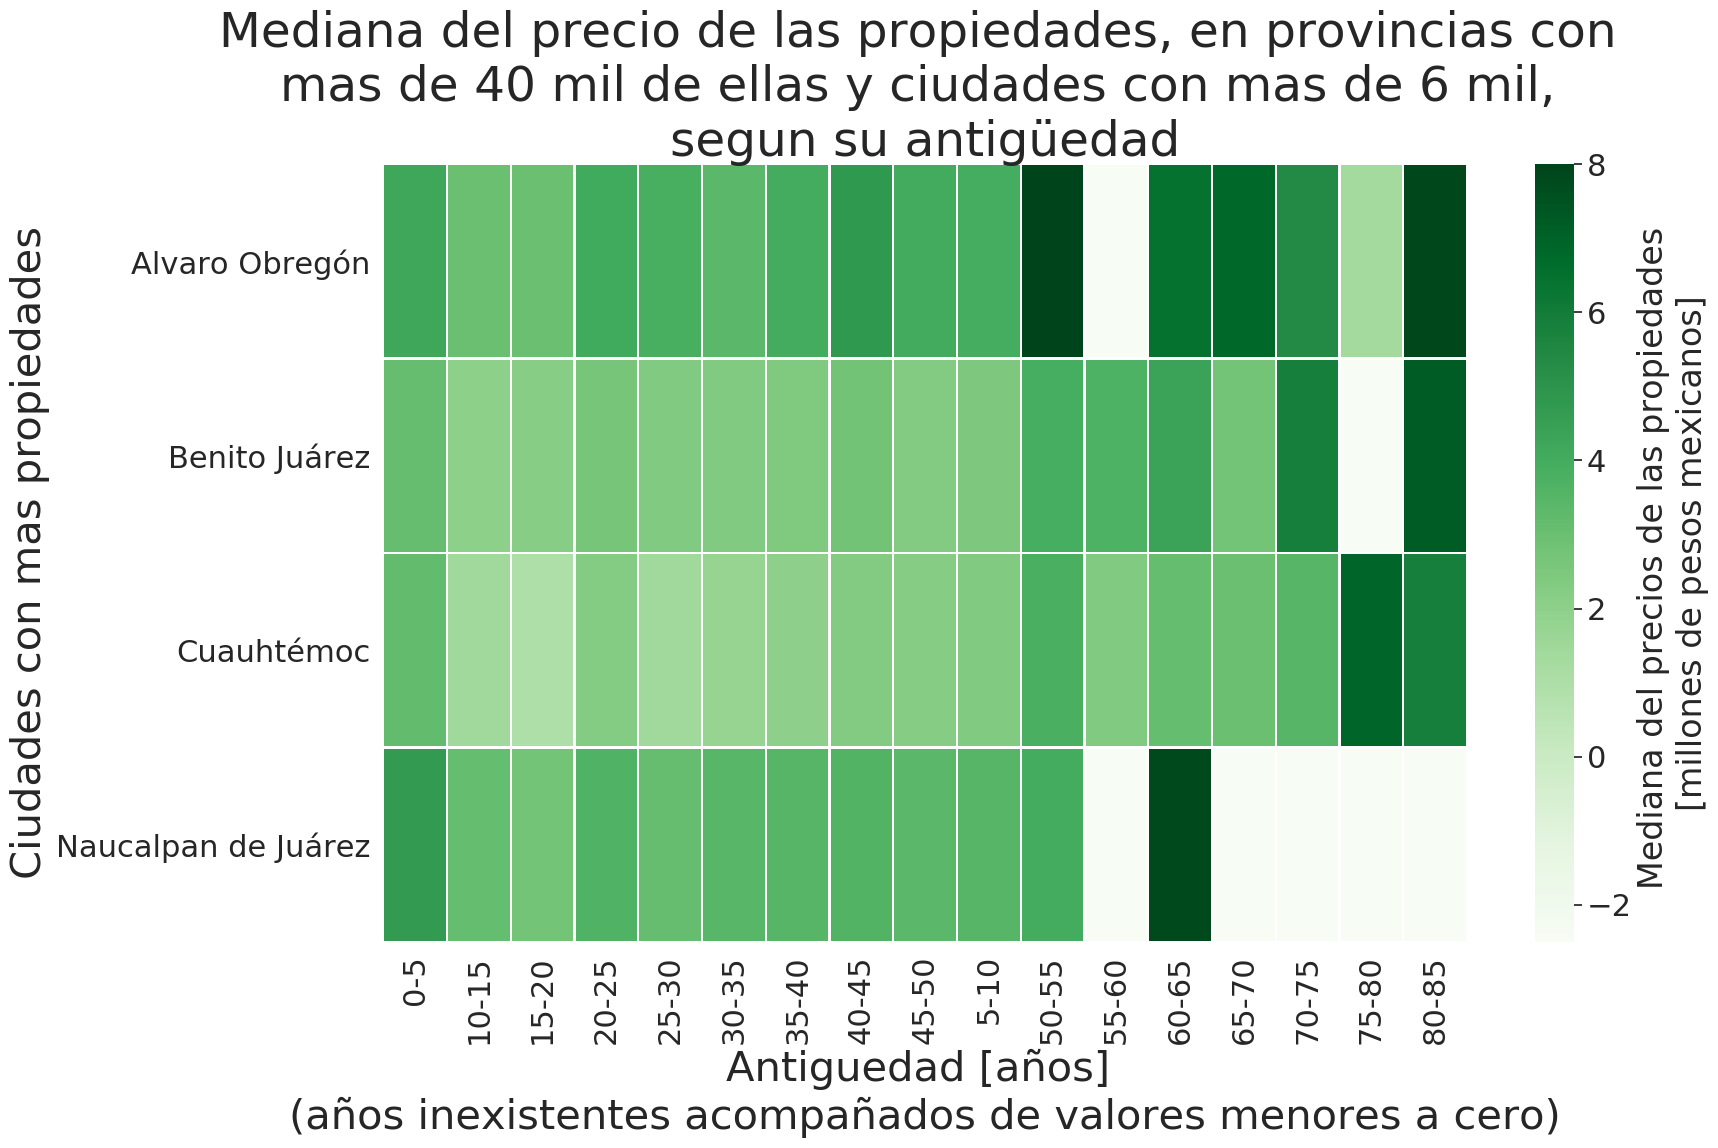

In [165]:
heatmap_top_2_prov_ciudad_precio_antiguedad = sns.heatmap(
                                                    data = top_2_prov_ciudad_antiguedad_pivot_millones,
                                                    cmap = 'Greens',
                                                    linewidth = 1,
                                                    cbar_kws = {'label' : 'Mediana del precios de las propiedades \n[millones de pesos mexicanos]'}
                                                )

common.setear_titulos_plot(
    heatmap_top_2_prov_ciudad_precio_antiguedad,
    'Mediana del precio de las propiedades, en provincias con \n'+\
    'mas de 40 mil de ellas y ciudades con mas de 6 mil, \n'+\
    'segun su antigüedad',
    'Antiguedad [años] \n(años inexistentes acompañados de valores menores a cero)',
    'Ciudades con mas propiedades'
)

fig_heatmap_top_2_prov_ciudad_precio_antiguedad =\
    heatmap_top_2_prov_ciudad_precio_antiguedad.get_figure()

plt.tight_layout()
#fig_heatmap_top_2_prov_ciudad_precio_antiguedad.savefig('./figs/heatmap_provincias_MAS_40_mil_ciudad_top_precio_antiguedad.png')
plt.show()

### tipodepropiedad 

In [88]:
top_2_prov_ciudad_tipodepropiedad = top_2_prov_ciudad.dropna(subset = ['tipodepropiedad']).copy()
top_2_prov_ciudad_tipodepropiedad['tipodepropiedad'].isnull().sum()

0

In [89]:
top_2_prov_ciudad_tipodepropiedad_pivot = top_2_prov_ciudad_tipodepropiedad.pivot_table(index = 'ciudad', columns = 'tipodepropiedad', values = 'precio', aggfunc = 'median')
top_2_prov_ciudad_tipodepropiedad_pivot_millones = top_2_prov_ciudad_tipodepropiedad_pivot.transform(lambda x: x*1e-6)
top_2_prov_ciudad_tipodepropiedad_pivot_millones.fillna(-2.5, inplace = True)
top_2_prov_ciudad_tipodepropiedad_pivot_millones

tipodepropiedad              Apartamento     Bodega comercial  \
ciudad                                                          
Alvaro Obregón                3.15000010           3.70000005   
Benito Juárez                 2.55250001           6.00000000   
Cuauhtémoc                    2.37999988           3.72499990   
Naucalpan de Juárez           2.70000005           2.79999995   

tipodepropiedad                     Casa   Casa en condominio  \
ciudad                                                          
Alvaro Obregón                4.65000010           5.82499981   
Benito Juárez                 4.40000010           5.00000000   
Cuauhtémoc                    4.00000000           2.84999990   
Naucalpan de Juárez           3.90000010           3.15000010   

tipodepropiedad        Casa uso de suelo  Departamento Compartido  \
ciudad                                                              
Alvaro Obregón                4.58793306               1.45000005   
Benito Juárez                 5.69999981               2.52500010   
Cuauhtémoc                    5.55000019               2.65000010   
Naucalpan de Juárez           6.00000000               2.37999988   

tipodepropiedad                   Duplex             Edificio  \
ciudad                                                          
Alvaro Obregón                3.59999990           4.09999990   
Benito Juárez                 6.09999990           7.40000010   
Cuauhtémoc                    7.02500010           6.50000000   
Naucalpan de Juárez           2.45000005           5.59999990   

tipodepropiedad      Inmuebles productivos urbanos      Local Comercial  \
ciudad                                                                    
Alvaro Obregón                          8.00000000           3.09999990   
Benito Juárez                           7.50000000           1.73000002   
Cuauhtémoc                              8.08749962           2.00000000   
Naucalpan de Juárez                     3.95000005           2.81599998   

tipodepropiedad      Local en centro comercial                 Lote  \
ciudad                                                                
Alvaro Obregón                      3.50999999          -2.50000000   
Benito Juárez                       1.58000004          -2.50000000   
Cuauhtémoc                          0.92500001           2.45000005   
Naucalpan de Juárez                 1.20000005          -2.50000000   

tipodepropiedad          Nave industrial    Oficina comercial  \
ciudad                                                          
Alvaro Obregón                5.50000000           4.09999990   
Benito Juárez                 6.19999981           3.40098453   
Cuauhtémoc                   -2.50000000           1.89999998   
Naucalpan de Juárez          -2.50000000           2.65000010   

tipodepropiedad                    Otros    Quinta Vacacional  \
ciudad                                                          
Alvaro Obregón                5.09999990          -2.50000000   
Benito Juárez                 3.34999990           2.01445198   
Cuauhtémoc                    1.99000001          -2.50000000   
Naucalpan de Juárez          11.00000000          -2.50000000   

tipodepropiedad                  Terreno    Terreno comercial  \
ciudad                                                          
Alvaro Obregón                3.00000000           4.40000010   
Benito Juárez                 6.90000010           6.55000019   
Cuauhtémoc                    4.05000019           6.47499990   
Naucalpan de Juárez           2.22499990           4.00000000   

tipodepropiedad       Terreno industrial                Villa  
ciudad                                                         
Alvaro Obregón                6.06113291          -2.50000000  
Benito Juárez                -2.50000000           2.22499990  
Cuauhtémoc                   -2.50000000          -2.50000000  
Naucalpan de Juárez           3.29999995 

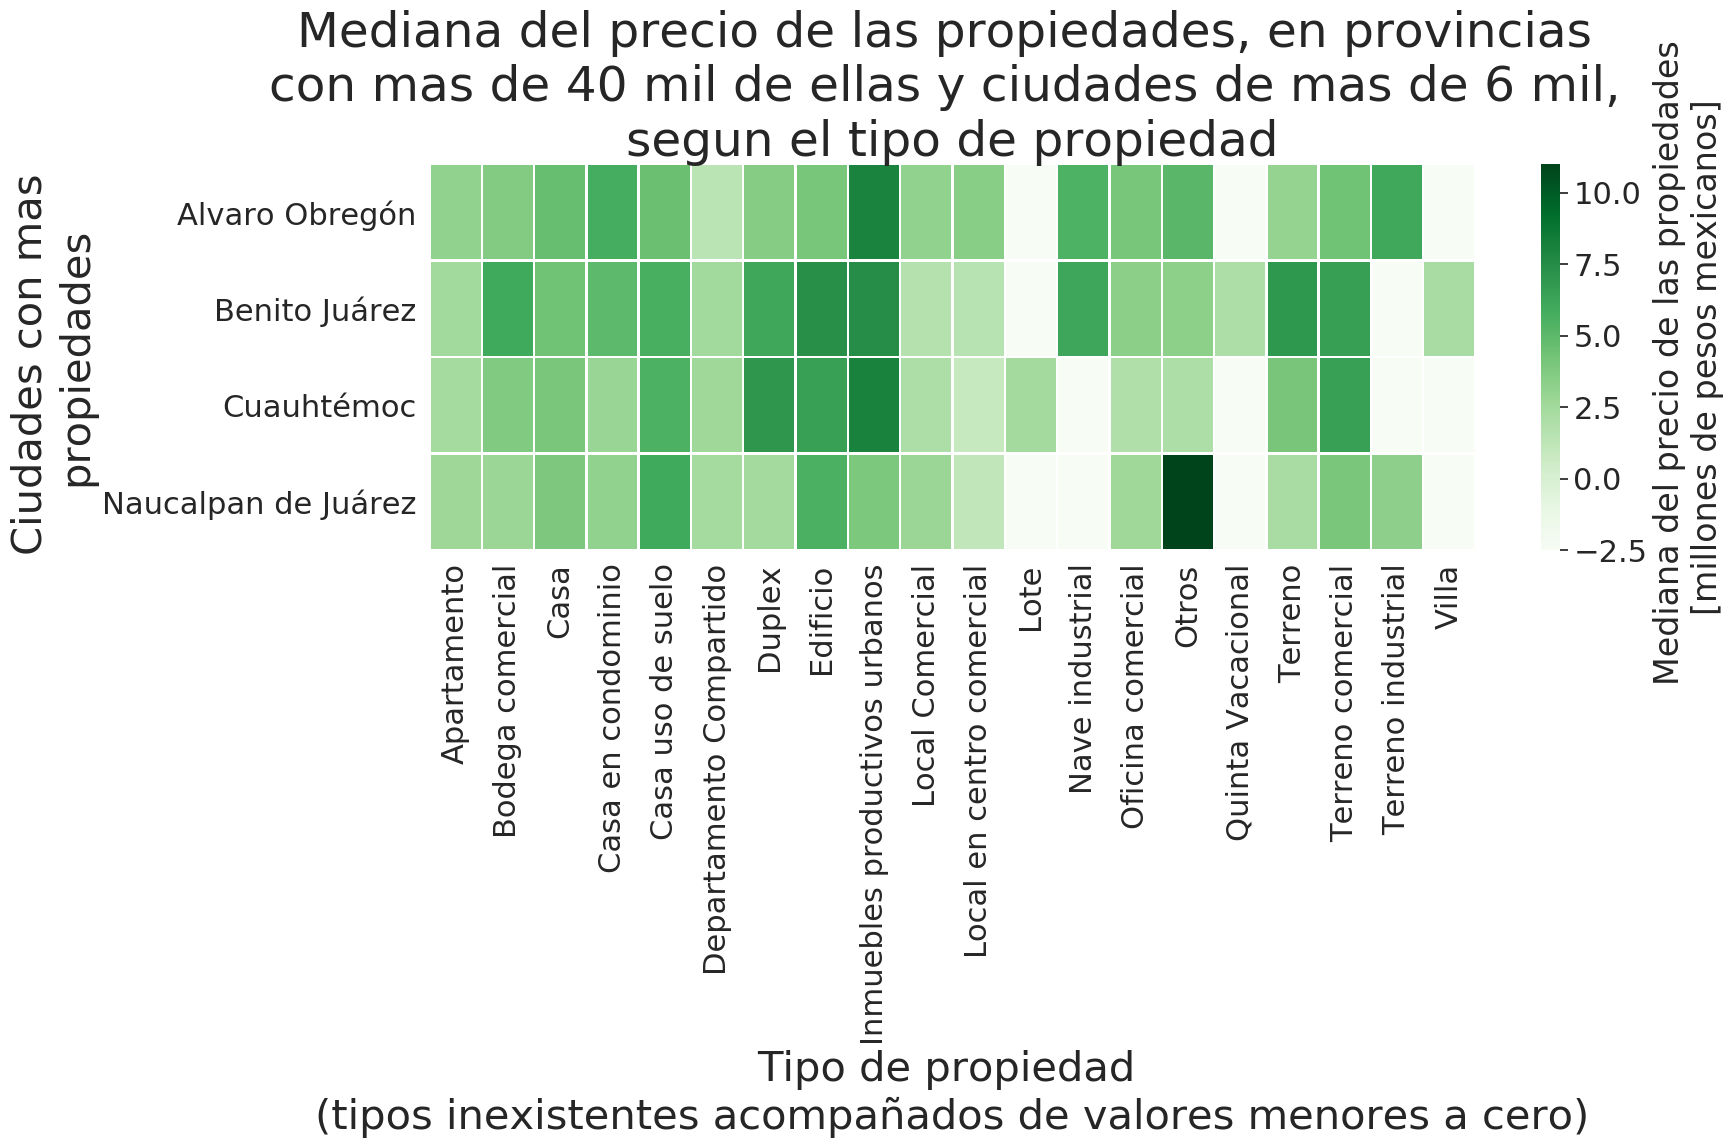

In [166]:
heatm_top_2_prov_ciudad_precio_tipodepropiedad = sns.heatmap(
                                                    data = top_2_prov_ciudad_tipodepropiedad_pivot_millones,
                                                    cmap = 'Greens',
                                                    linewidth = 1,
                                                    cbar_kws = {'label' : 'Mediana del precio de las propiedades \n[millones de pesos mexicanos]'}
                                                )

common.setear_titulos_plot(
    heatm_top_2_prov_ciudad_precio_tipodepropiedad,
    'Mediana del precio de las propiedades, en provincias \n'+\
    'con mas de 40 mil de ellas y ciudades de mas de 6 mil, \n'+\
    'segun el tipo de propiedad',
    'Tipo de propiedad \n(tipos inexistentes acompañados de valores menores a cero)',
    'Ciudades con mas \npropiedades'
)

fig_heatm_top_2_prov_ciudad_precio_tipodepropiedad =\
    heatm_top_2_prov_ciudad_precio_tipodepropiedad.get_figure()

plt.tight_layout()
#fig_heatm_top_2_prov_ciudad_precio_tipodepropiedad.savefig('./figs/heatmap_provincia_MAS_40_mil_ciudad_top_precio_tipodepropiedad.png')
plt.show()